# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The model aim to predict a players rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Importing the following libraries

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools

# Reading and collecting a brief overview of the dataset

In [233]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [234]:
df.head()

name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties  \
0          94          48            22           94      94         75   
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking standing_tackle  sliding_tackle  
0        96       33              28              26  
1        88       59              57              22  
2        87       63              67              67  
3        83       51              24              22  
4        80       91              88              87  

[5 rows x 51 columns]

In [235]:
len(df)

17954

In [236]:
df.describe()

age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.131339   
min       17.000000    152.400000     49.900000       47.000000     48.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       71.000000     75.000000   
max       46.000000    205.740000    110.200000       94.000000     95.000000   

         value_euro      wage_euro  international_reputation(1-5)  \
count  1.769900e+04   17708.000000                   17954.000000   
mean   2.479280e+06    9902.134628                       1.111674   
std    5.687014e+06   21995.593750                       0.392168   
min    1.000000e+04    1000.000000                       1.000000   
25%    3.250000e+05    1000.000000                       1.000000   
50%    7.000000e+05    3000.000000                       1.000000   
75%    2.100000e+06    9000.000000                       1.000000   
max    1.105000e+08  565000.000000                       5.000000   

       weak_foot(1-5)  skill_moves(1-5)  ...    long_shots    aggression  \
count    17954.000000      17954.000000  ...  17954.000000  17954.000000   
mean         2.945695          2.361034  ...     46.852456     55.816531   
std          0.663691          0.763223  ...     19.429337     17.394047   
min          1.000000          1.000000  ...      3.000000     11.000000   
25%          3.000000          2.000000  ...     32.000000     44.000000   
50%          3.000000          2.000000  ...     51.000000     59.000000   
75%          3.000000          3.000000  ...     62.000000     69.000000   
max          5.000000          5.000000  ...     94.000000     95.000000   

       interceptions   positioning        vision     penalties     composure  \
count   17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean       46.657959     49.857302     53.406260     48.357302     58.680183   
std        20.754649     19.694311     14.156038     15.810844     11.625541   
min         3.000000      2.000000     10.000000      5.000000     12.000000   
25%        26.000000     38.000000     44.000000     38.000000     51.000000   
50%        52.000000     55.000000     55.000000     49.000000     60.000000   
75%        64.000000     64.000000     64.000000     60.000000     67.000000   
max        92.000000     95.000000     94.000000     92.000000     96.000000   

            marking  standing_tackle  sliding_tackle  
count  17954.000000     17954.000000    17954.000000  
mean      47.162861        47.733040       45.705915  
std       20.037346        21.674973       21.285812  
min        3.000000         2.000000        3.000000  
25%       30.000000        27.000000       24.000000  
50%       52.500000        55.000000       52.000000  
75%       64.000000        66.000000       64.000000  
max       94.000000        93.000000       90.000000  

[8 rows x 42 columns]

## Dropping the `potential` column

In [237]:
df= df.drop('potential', axis=1)

In [238]:
datatypes = df.dtypes
datatypes

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy                   int64
short_passing   

# Cleaning the dataset

In [239]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                  

In [240]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep='first', inplace=False)

# Drop rows with null 'value_euro' or 'wage_euro'
df = df.dropna(subset=["value_euro", "wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position", "national_jersey_number"])

# Reset index to adjust the row indices
df = df.reset_index(drop=True)

new_length = len(df)

# Show how many rows were dropped
str(old_length - new_length) + " rows were dropped"


'255 rows were dropped'

### Look through dataset for multiple representations and to understand the values better

In [241]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


name column is being written
name has been written
full_name column is being written
full_name has been written
birth_date column is being written
birth_date has been written
age column is being written
age has been written
height_cm column is being written
height_cm has been written
weight_kgs column is being written
weight_kgs has been written
positions column is being written
positions has been written
nationality column is being written
nationality has been written
overall_rating column is being written
overall_rating has been written
value_euro column is being written
value_euro has been written
wage_euro column is being written
wage_euro has been written
preferred_foot column is being written
preferred_foot has been written
international_reputation(1-5) column is being written
international_reputation(1-5) has been written
weak_foot(1-5) column is being written
weak_foot(1-5) has been written
skill_moves(1-5) column is being written
skill_moves(1-5) has been written
body_type col

## Binning the data with respect to the continent they are from

In [242]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 
    'Angola': 'Africa', 'Antigua & Barbuda': 'North America', 'Argentina': 'South America', 
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa', 
    'Bermuda': 'North America', 'Bolivia': 'South America', 'Bosnia Herzegovina': 'Europe', 
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa', 'Central African Rep.': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'China PR': 'Asia', 'Colombia': 'South America', 
    'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 
    'Cuba': 'North America', 'Curacao': 'North America', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 
    'DR Congo': 'Africa', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 
    'Egypt': 'Africa', 'El Salvador': 'North America', 'England': 'Europe', 'Equatorial Guinea': 'Africa', 
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'FYR Macedonia': 'Europe', 'Faroe Islands': 'Europe', 
    'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 
    'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 
    'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea Bissau': 'Africa', 
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia', 
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia', 
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Korea DPR': 'Asia', 'Korea Republic': 'Asia', 
    'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Latvia': 'Europe', 'Liberia': 'Africa', 'Libya': 'Africa', 
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa', 
    'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe', 
    'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa', 'Mozambique': 'Africa', 
    'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 
    'Nicaragua': 'North America', 'Nigeria': 'Africa', 'Northern Ireland': 'Europe', 'Norway': 'Europe', 
    'Oman': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 
    'Portugal': 'Europe', 'Republic of Ireland': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 
    'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Scotland': 'Europe', 'Senegal': 'Africa', 
    'Serbia': 'Europe', 'Sierra Leone': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe', 'St Kitts Nevis': 'North America', 
    'St Lucia': 'North America', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 
    'Switzerland': 'Europe', 'Syria': 'Asia', 'São Tomé & Príncipe': 'Africa', 'Tanzania': 'Africa', 
    'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad & Tobago': 'North America', 'Tunisia': 'Africa', 
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Venezuela': 'South America', 
    'Vietnam': 'Asia', 'Wales': 'Europe', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Map each nationality to its continent
df['continent'] = df['nationality'].map(country_to_continent)

# Check the result
df

name                         full_name birth_date  age  \
0            L. Messi    Lionel Andrés Messi Cuccittini  6/24/1987   31   
1          C. Eriksen      Christian  Dannemann Eriksen  2/14/1992   27   
2            P. Pogba                        Paul Pogba  3/15/1993   25   
3          L. Insigne                   Lorenzo Insigne   6/4/1991   27   
4        K. Koulibaly                 Kalidou Koulibaly  6/20/1991   27   
...               ...                               ...        ...  ...   
17694     R. McKenzie                    Rory  McKenzie  10/7/1993   25   
17695       M. Sipľak                     Michal Sipľak   2/2/1996   23   
17696      J. Bekkema                       Jan Bekkema   4/9/1996   22   
17697      A. Al Yami               Abdulrahman Al Yami  6/19/1997   21   
17698  Júnior Brumado  José Francisco dos Santos Júnior  5/15/1999   19   

       height_cm  weight_kgs  positions   nationality  overall_rating  \
0         170.18        72.1   CF,RW,ST     Argentina              94   
1         154.94        76.2  CAM,RM,CM       Denmark              88   
2         190.50        83.9     CM,CAM        France              88   
3         162.56        59.0      LW,ST         Italy              88   
4         187.96        88.9         CB       Senegal              88   
...          ...         ...        ...           ...             ...   
17694     175.26        74.8  RM,CAM,CM      Scotland              67   
17695     182.88        79.8         LB      Slovakia              59   
17696     185.42        89.8         GK   Netherlands              59   
17697     175.26        64.9      ST,LM  Saudi Arabia              59   
17698     190.50        79.8         ST        Brazil              59   

        value_euro  ...  aggression interceptions  positioning  vision  \
0      110500000.0  ...          48            22           94      94   
1       69500000.0  ...          46            56           84      91   
2       73000000.0  ...          78            64           82      88   
3       62000000.0  ...          34            26           83      87   
4       60000000.0  ...          87            88           24      49   
...            ...  ...         ...           ...          ...     ...   
17694     975000.0  ...          69            41           60      64   
17695     190000.0  ...          62            55           42      39   
17696     170000.0  ...          27            10            5      25   
17697     280000.0  ...          38            15           54      52   
17698     325000.0  ...          67            20           53      49   

       penalties composure  marking  standing_tackle  sliding_tackle  \
0             75        96       33               28              26   
1             67        88       59               57              22   
2             82        87       63               67              67   
3             61        83       51               24              22   
4             33        80       91               88              87   
...          ...       ...      ...              ...             ...   
17694         63        56       40               20              18   
17695         32        52       53               64              60   
17696         16        47        9               12              13   
17697         50        53       16               18              17   
17698         52        45       23               31              21   

           continent  
0      South America  
1             Europe  
2             Europe  
3             Europe  
4             Africa  
...              ...  
17694         Europe  
17695         Europe  
17696         Europe  
17697           Asia  
17698  South America  

[17699 rows x 46 columns]

## Look for outliers within the dataset

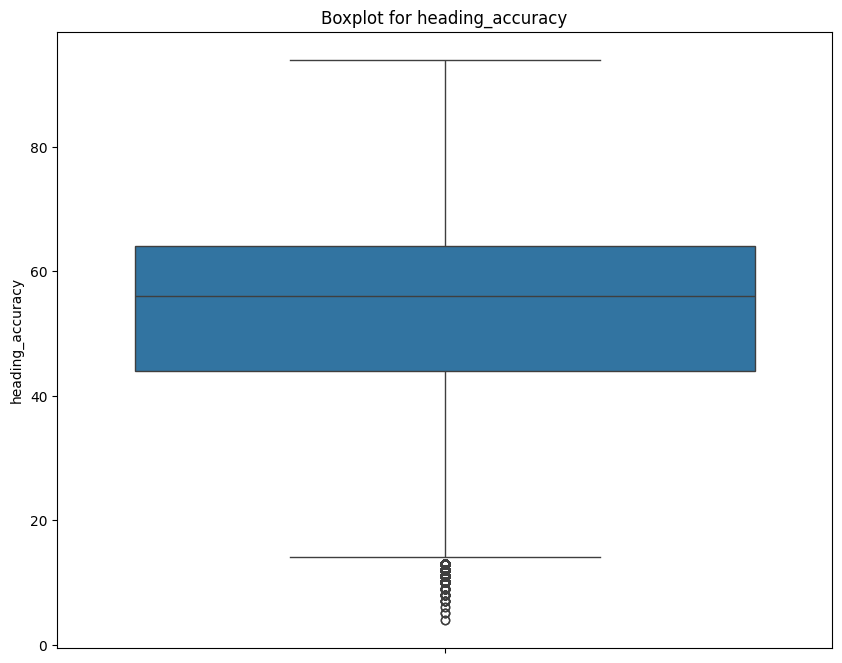

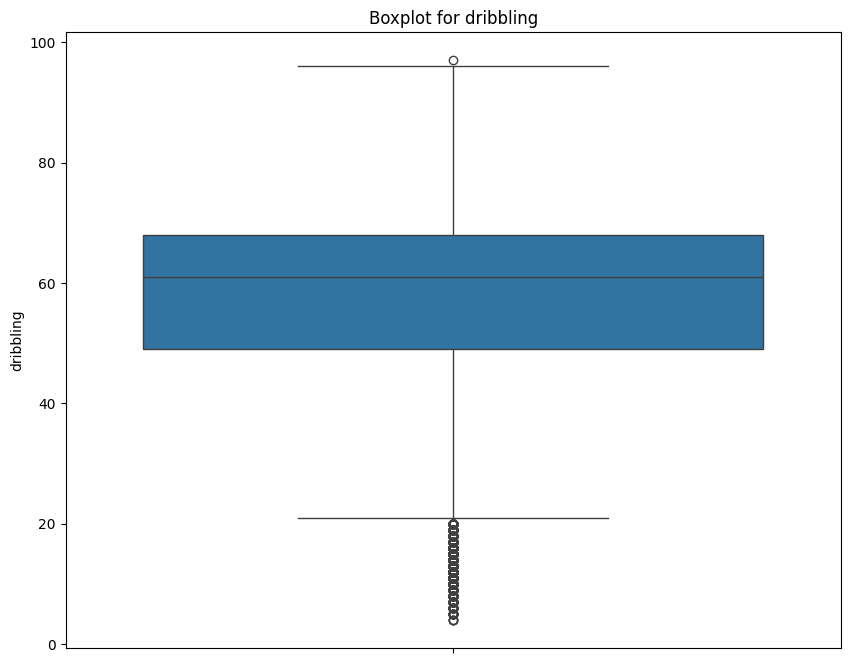

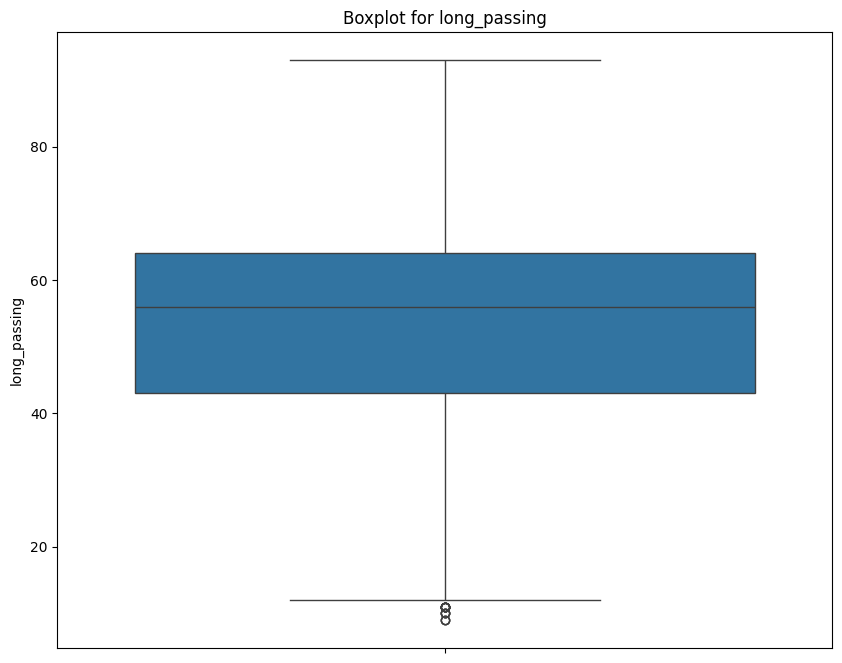

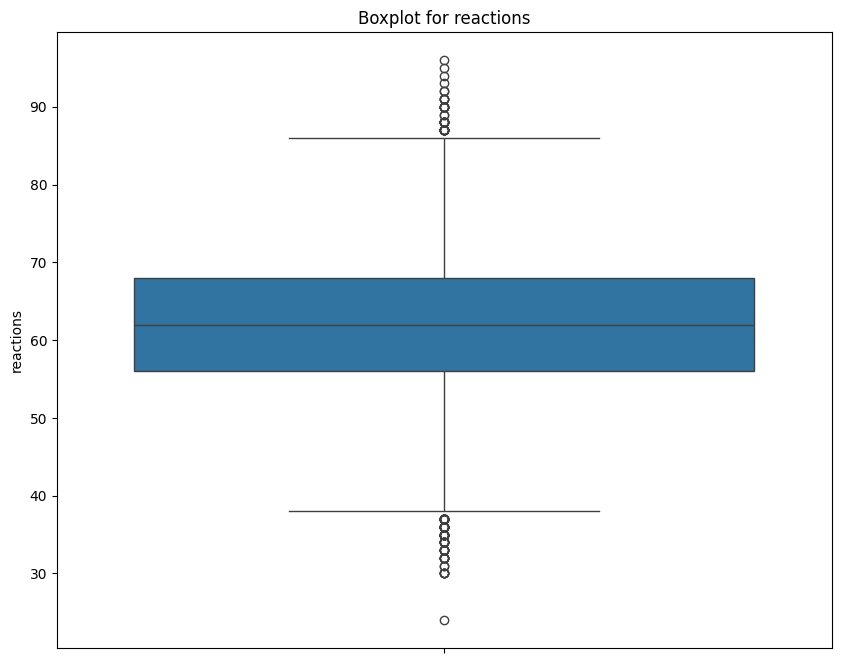

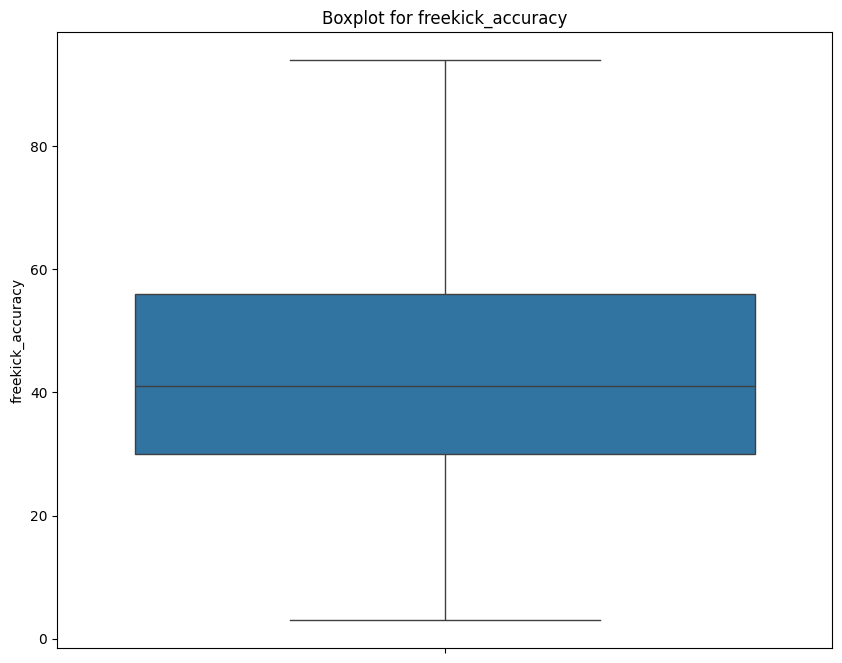

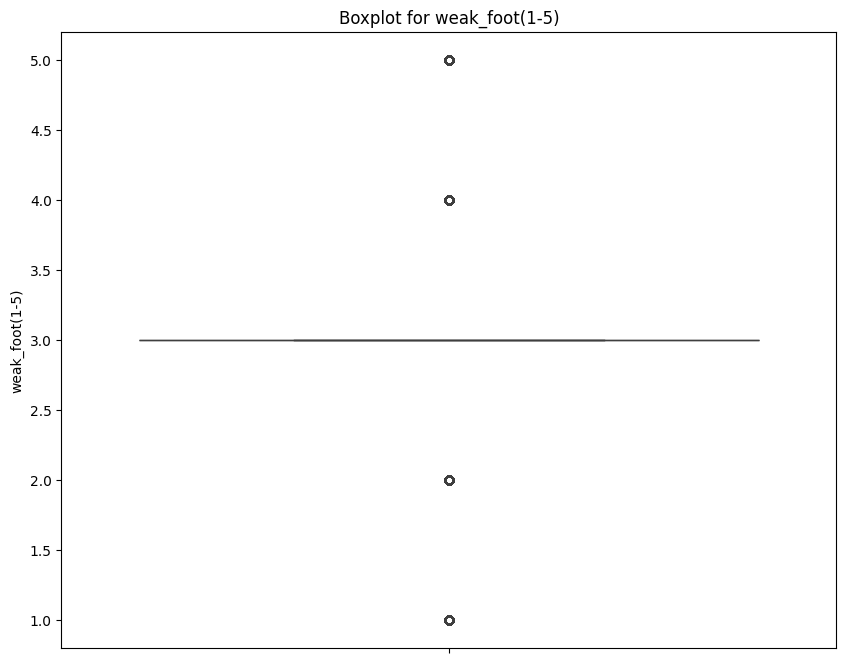

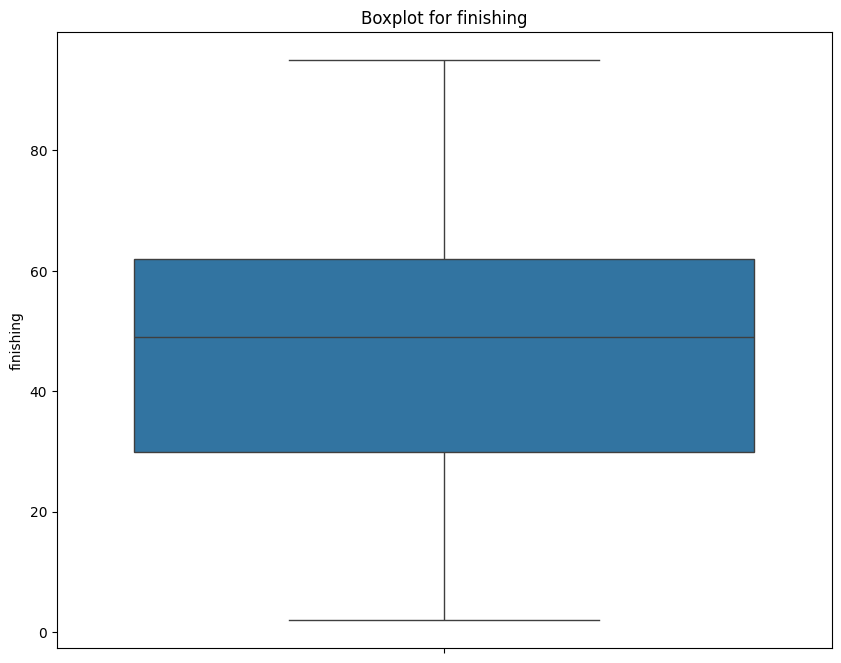

KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

In [243]:
columns_notype = set(df.columns) - set(['name','full_name','age','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'value_euro','wage_euro','international_reputation(1-5)'
                                        ,'birth_date','class'])
columns_notype = list(columns_notype)


for col in columns_notype:
    plt.figure(figsize=(10, 8))
    sns.boxplot(df, y = col)
    plt.title("Boxplot for " + col)
    plt.show()
    plt.close()



In [ ]:
outlier_info = {}

for cls in range(10):
    try:
        outlier_info[cls] = {}
        
        
        class_data = df[df['overall_rating'] == cls]
        
        
        for column in columns_notype:
            if column == 'overall_rating':
                continue  # Skip the class column

            
            Q1 = class_data[column].quantile(0.25)
            Q3 = class_data[column].quantile(0.75)
            IQR = Q3 - Q1
            
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
            
            
            outlier_info[cls][column] = {
                'count': len(outliers),
                'values': outliers[column].tolist()
            }
    except Exception as e:
        print(e)

print("outlier_info is saved")

outlier_info is saved


In [ ]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

Outlier information exported to 'dumps/outliers_info.txt'


# Data Precrocessing


#### Variable delcaration

In [ ]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle', 'continent'],
      dtype='object')


#### MinMax Scaling

In [ ]:
numeric_features = list(set(df.columns) - set(['name','full_name','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'international_reputation(1-5)'
                                        ,'birth_date','height_cm','weight_kgs',
                                        'height_cm', 'weight_kg', 'continent', 'value_bin'
                                        ,'Category', "skill_moves(1-5)", "weak_foot(1-5)",
                                        'overall_rating']))

numeric_features

['age',
 'heading_accuracy',
 'dribbling',
 'long_passing',
 'reactions',
 'freekick_accuracy',
 'finishing',
 'marking',
 'stamina',
 'wage_euro',
 'curve',
 'positioning',
 'sprint_speed',
 'strength',
 'standing_tackle',
 'short_passing',
 'acceleration',
 'volleys',
 'long_shots',
 'balance',
 'agility',
 'penalties',
 'shot_power',
 'ball_control',
 'crossing',
 'sliding_tackle',
 'vision',
 'interceptions',
 'value_euro',
 'jumping',
 'aggression',
 'composure']

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in numeric and categorical columns
print("Missing values in numeric features:")
print(df[numeric_features].isna().sum())


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numeric_features])
new_df = pd.DataFrame(scaled_features, columns=numeric_features)


Missing values in numeric features:
age                  0
heading_accuracy     0
dribbling            0
long_passing         0
reactions            0
freekick_accuracy    0
finishing            0
marking              0
stamina              0
wage_euro            0
curve                0
positioning          0
sprint_speed         0
strength             0
standing_tackle      0
short_passing        0
acceleration         0
volleys              0
long_shots           0
balance              0
agility              0
penalties            0
shot_power           0
ball_control         0
crossing             0
sliding_tackle       0
vision               0
interceptions        0
value_euro           0
jumping              0
aggression           0
composure            0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
X = pd.DataFrame(new_df)


In [ ]:
y = df[['overall_rating']].copy()

In [ ]:
new_df = pd.concat([new_df, y], axis=1)

In [ ]:
new_df.head()

age  heading_accuracy  dribbling  long_passing  reactions  \
0  0.482759          0.733333   1.000000      0.952381   0.986111   
1  0.344828          0.533333   0.860215      0.952381   0.888889   
2  0.275862          0.788889   0.892473      0.964286   0.805556   
3  0.344828          0.577778   0.924731      0.821429   0.819444   
4  0.344828          0.877778   0.698925      0.607143   0.805556   

   freekick_accuracy  finishing   marking   stamina  wage_euro  ...  \
0           1.000000   1.000000  0.329670  0.705882   1.000000  ...   
1           0.923077   0.849462  0.615385  0.941176   0.361702  ...   
2           0.868132   0.784946  0.659341  0.894118   0.450355  ...   
3           0.813187   0.806452  0.527473  0.741176   0.290780  ...   
4           0.274725   0.215054  0.967033  0.741176   0.237589  ...   

   ball_control  crossing  sliding_tackle    vision  interceptions  \
0      1.000000  0.920455        0.264368  1.000000       0.213483   
1      0.945055  0.943182        0.218391  0.964286       0.595506   
2      0.934066  0.852273        0.735632  0.928571       0.685393   
3      0.967033  0.920455        0.218391  0.916667       0.258427   
4      0.637363  0.284091        0.965517  0.464286       0.955056   

   value_euro  jumping  aggression  composure  overall_rating  
0    1.000000   0.6625    0.440476   1.000000              94  
1    0.628926   0.4375    0.416667   0.904762              88  
2    0.660603   0.8500    0.797619   0.892857              88  
3    0.561046   0.4750    0.273810   0.845238              88  
4    0.542945   0.8250    0.904762   0.809524              88  

[5 rows x 33 columns]

In [ ]:
y

overall_rating
0                  94
1                  88
2                  88
3                  88
4                  88
...               ...
17694              67
17695              59
17696              59
17697              59
17698              59

[17699 rows x 1 columns]

# Exploratory Data Analysis

In [ ]:
new_df.isnull().sum()

age                  0
heading_accuracy     0
dribbling            0
long_passing         0
reactions            0
freekick_accuracy    0
finishing            0
marking              0
stamina              0
wage_euro            0
curve                0
positioning          0
sprint_speed         0
strength             0
standing_tackle      0
short_passing        0
acceleration         0
volleys              0
long_shots           0
balance              0
agility              0
penalties            0
shot_power           0
ball_control         0
crossing             0
sliding_tackle       0
vision               0
interceptions        0
value_euro           0
jumping              0
aggression           0
composure            0
overall_rating       0
dtype: int64

## 1. Are there any correlations within our X values in the dataset

1a. Overall correlation within the dataset

In [ ]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = new_df[numeric_columns].corr()

formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")

print(formatted_matrix)

                      age heading_accuracy dribbling long_passing reactions  \
age                 1.000            0.155     0.020        0.188     0.466   
heading_accuracy    0.155            1.000     0.564        0.527     0.340   
dribbling           0.020            0.564     1.000        0.730     0.381   
long_passing        0.188            0.527     0.730        1.000     0.472   
reactions           0.466            0.340     0.381        0.472     1.000   
freekick_accuracy   0.198            0.420     0.757        0.708     0.403   
finishing           0.077            0.482     0.828        0.525     0.343   
marking             0.149            0.593     0.354        0.598     0.297   
stamina             0.109            0.649     0.702        0.649     0.382   
wage_euro           0.153            0.193     0.242        0.286     0.505   
curve               0.151            0.452     0.846        0.717     0.421   
positioning         0.089            0.544     0.902

C:\Users\lumag\AppData\Local\Temp\ipykernel_26912\985753856.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


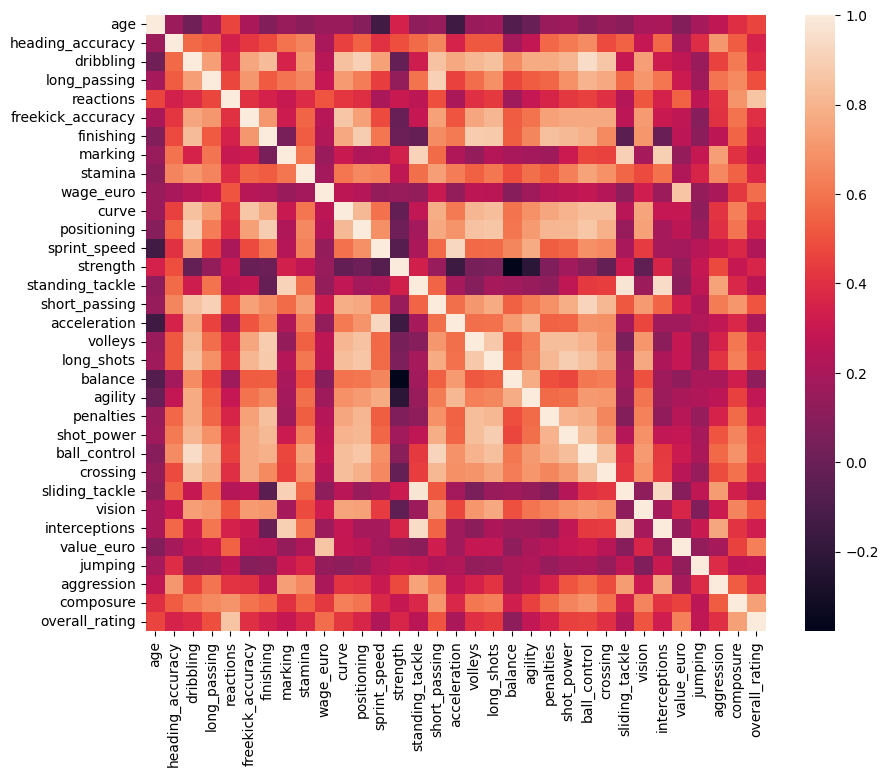

In [ ]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, fmt=".3f")

In [ ]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[::-1]
so[1:20]

standing_tackle  sliding_tackle       0.975102
interceptions    standing_tackle      0.943123
ball_control     dribbling            0.941555
sliding_tackle   interceptions        0.930480
acceleration     sprint_speed         0.925894
short_passing    ball_control         0.915211
marking          standing_tackle      0.911605
dribbling        positioning          0.901588
marking          sliding_tackle       0.901557
short_passing    long_passing         0.898308
marking          interceptions        0.895978
long_shots       shot_power           0.892222
positioning      finishing            0.890102
finishing        volleys              0.886443
long_shots       finishing            0.879896
volleys          long_shots           0.871016
positioning      ball_control         0.869346
                 long_shots           0.863768
curve            freekick_accuracy    0.861877
dtype: float64

In [ ]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[:20] 
so


balance          strength            -0.378113
strength         agility             -0.221415
                 acceleration        -0.154648
acceleration     age                 -0.147862
sprint_speed     age                 -0.140077
balance          age                 -0.081761
strength         sprint_speed        -0.071041
sliding_tackle   finishing           -0.052022
strength         vision              -0.034732
                 curve               -0.025854
dribbling        strength            -0.021199
crossing         strength            -0.020014
standing_tackle  finishing           -0.013521
agility          age                 -0.009579
strength         freekick_accuracy   -0.007446
finishing        interceptions       -0.003940
strength         finishing           -0.000497
                 positioning          0.014600
age              dribbling            0.019795
volleys          strength             0.039944
dtype: float64

In [ ]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = new_df[numeric_columns].corr()

# Get correlations with the target variable 'overall_rating'
target_correlations = correlation_matrix['overall_rating'].sort_values(ascending=False)

# Format and print correlations
formatted_correlations = target_correlations.apply(lambda x: f"{x:.3f}")

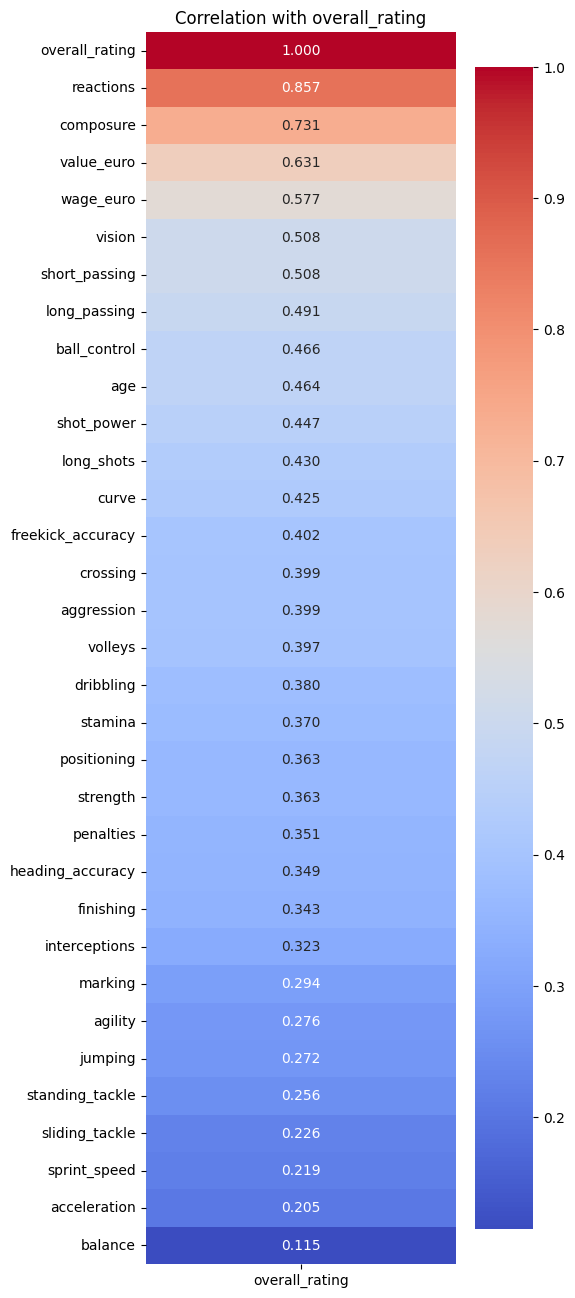

In [ ]:
correlations_with_target = correlation_matrix[['overall_rating']].sort_values(by='overall_rating', ascending=False)

plt.figure(figsize=(5, len(correlations_with_target) // 2)) 
sns.heatmap(correlations_with_target, annot=True, fmt=".3f", cmap='coolwarm', cbar=True)

plt.title("Correlation with overall_rating")
plt.show()

In [ ]:
print(correlations_with_target)

                   overall_rating
overall_rating           1.000000
reactions                0.857014
composure                0.731415
value_euro               0.630928
wage_euro                0.577478
vision                   0.508294
short_passing            0.508115
long_passing             0.490830
ball_control             0.465967
age                      0.464441
shot_power               0.446920
long_shots               0.430491
curve                    0.424808
freekick_accuracy        0.401812
crossing                 0.399181
aggression               0.398530
volleys                  0.397413
dribbling                0.379939
stamina                  0.370494
positioning              0.363150
strength                 0.362575
penalties                0.351300
heading_accuracy         0.348855
finishing                0.343103
interceptions            0.323358
marking                  0.293862
agility                  0.276214
jumping                  0.271670
standing_tackl

### 1b. PCA to remove certain correlations within the dataset

In [ ]:
X.columns

Index(['age', 'heading_accuracy', 'dribbling', 'long_passing', 'reactions',
       'freekick_accuracy', 'finishing', 'marking', 'stamina', 'wage_euro',
       'curve', 'positioning', 'sprint_speed', 'strength', 'standing_tackle',
       'short_passing', 'acceleration', 'volleys', 'long_shots', 'balance',
       'agility', 'penalties', 'shot_power', 'ball_control', 'crossing',
       'sliding_tackle', 'vision', 'interceptions', 'value_euro', 'jumping',
       'aggression', 'composure'],
      dtype='object')

In [ ]:
covariance_matrix = np.cov(X.T)

covariance_matrix


array([[0.02623249, 0.00488774, 0.00065751, ..., 0.00446847, 0.00898195,
        0.00889356],
       [0.00488774, 0.037801  , 0.02250006, ..., 0.01109745, 0.0283963 ,
        0.01415552],
       [0.00065751, 0.02250006, 0.04205844, ..., 0.00458536, 0.01955353,
        0.01743869],
       ...,
       [0.00446847, 0.01109745, 0.00458536, ..., 0.02145112, 0.01158126,
        0.00530375],
       [0.00898195, 0.0283963 , 0.01955353, ..., 0.01158126, 0.04277255,
        0.01518983],
       [0.00889356, 0.01415552, 0.01743869, ..., 0.00530375, 0.01518983,
        0.01912396]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

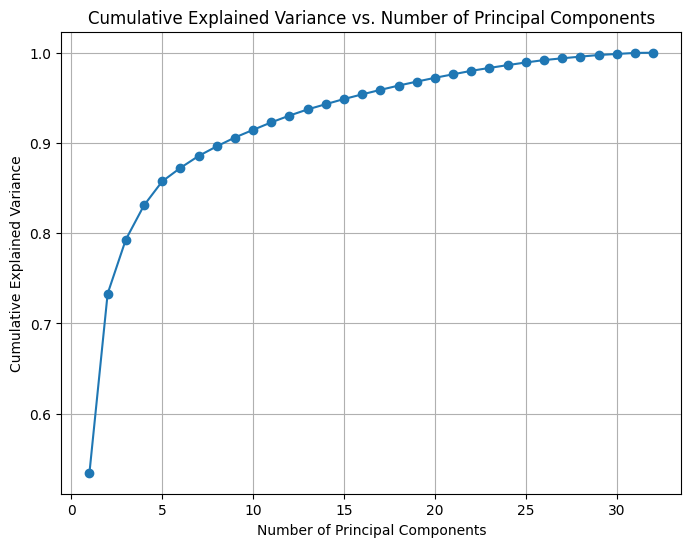

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.53451145 0.19844997 0.05996554 0.03793266 0.02652988]

Sorted Feature Loadings (Top Features Based on PC1):
                        PC1       PC2       PC3       PC4       PC5  \
dribbling          0.246103 -0.101710 -0.094026  0.024827 -0.085934   
crossing           0.241960 -0.030407 -0.129720 -0.174383  0.036494   
long_shots         0.240009 -0.150767  0.142445 -0.047225 -0.089129   
positioning        0.239510 -0.159424  0.024504  0.085460 -0.062330   
curve              0.238545 -0.112741  0.012257 -0.212393 -0.019350   
ball_control       0.229233 -0.037458 -0.008207  0.022877 -0.075739   
volleys            0.215263 -0.181733  0.155449  0.038610 -0.093070   
finishing          0.212893 -0.234112  0.125518  0.119155 -0.132947   
shot_power         0.208814 -0.084721  0.164341  0.046661 -0.131136   
short_passing      0.207399  0.026344  0.013559 -0.086737 -0.052245   
freekick_accuracy  0.205444 -0.082292  0.068960 -0.280227 -0.051935   
long_passin

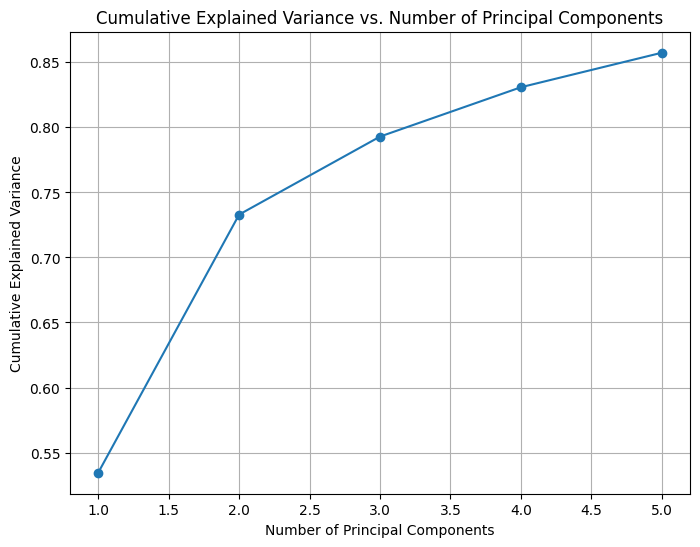

In [ ]:
from sklearn.decomposition import PCA

pca_check = new_df.drop('overall_rating', axis=1)

optimal_k =5

pca = PCA(n_components=optimal_k)  
X_pca = pca.fit_transform(pca_check)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

loadings = pca.components_

df_loadings = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=pca_check.columns)

df_loadings['abs_loading'] = df_loadings['PC1'].abs()
df_loadings = df_loadings.sort_values('abs_loading', ascending=False)

print("\nSorted Feature Loadings (Top Features Based on PC1):")
print(df_loadings)

top_features = df_loadings.head(optimal_k).index
print(f"\nTop {optimal_k} Features based on PCA loadings:", top_features)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

Keeping all the valuable columns and checking for new correlations

In [ ]:
eda_df = pd.concat([new_df], axis=1)
eda_df

age  heading_accuracy  dribbling  long_passing  reactions  \
0      0.482759          0.733333   1.000000      0.952381   0.986111   
1      0.344828          0.533333   0.860215      0.952381   0.888889   
2      0.275862          0.788889   0.892473      0.964286   0.805556   
3      0.344828          0.577778   0.924731      0.821429   0.819444   
4      0.344828          0.877778   0.698925      0.607143   0.805556   
...         ...               ...        ...           ...        ...   
17694  0.275862          0.622222   0.645161      0.619048   0.541667   
17695  0.206897          0.544444   0.516129      0.404762   0.361111   
17696  0.172414          0.100000   0.086022      0.178571   0.333333   
17697  0.137931          0.566667   0.569892      0.333333   0.402778   
17698  0.068966          0.600000   0.580645      0.333333   0.416667   

       freekick_accuracy  finishing   marking   stamina  wage_euro  ...  \
0               1.000000   1.000000  0.329670  0.705882   1.000000  ...   
1               0.923077   0.849462  0.615385  0.941176   0.361702  ...   
2               0.868132   0.784946  0.659341  0.894118   0.450355  ...   
3               0.813187   0.806452  0.527473  0.741176   0.290780  ...   
4               0.274725   0.215054  0.967033  0.741176   0.237589  ...   
...                  ...        ...       ...       ...        ...  ...   
17694           0.483516   0.634409  0.406593  0.741176   0.003546  ...   
17695           0.274725   0.182796  0.549451  0.635294   0.000000  ...   
17696           0.098901   0.075269  0.065934  0.152941   0.000000  ...   
17697           0.395604   0.623656  0.142857  0.541176   0.005319  ...   
17698           0.241758   0.602151  0.219780  0.529412   0.001773  ...   

       ball_control  crossing  sliding_tackle    vision  interceptions  \
0          1.000000  0.920455        0.264368  1.000000       0.213483   
1          0.945055  0.943182        0.218391  0.964286       0.595506   
2          0.934066  0.852273        0.735632  0.928571       0.685393   
3          0.967033  0.920455        0.218391  0.916667       0.258427   
4          0.637363  0.284091        0.965517  0.464286       0.955056   
...             ...       ...             ...       ...            ...   
17694      0.670330  0.590909        0.172414  0.642857       0.426966   
17695      0.527473  0.511364        0.655172  0.345238       0.584270   
17696      0.142857  0.068182        0.114943  0.178571       0.078652   
17697      0.560440  0.420455        0.160920  0.500000       0.134831   
17698      0.560440  0.306818        0.206897  0.464286       0.191011   

       value_euro  jumping  aggression  composure  overall_rating  
0        1.000000   0.6625    0.440476   1.000000              94  
1        0.628926   0.4375    0.416667   0.904762              88  
2        0.660603   0.8500    0.797619   0.892857              88  
3        0.561046   0.4750    0.273810   0.845238              88  
4        0.542945   0.8250    0.904762   0.809524              88  
...           ...      ...         ...        ...             ...  
17694    0.008734   0.7750    0.690476   0.523810              67  
17695    0.001629   0.7375    0.607143   0.476190              59  
17696    0.001448   0.3500    0.190476   0.416667              59  
17697    0.002444   0.5375    0.321429   0.488095              59  
17698    0.002851   0.5625    0.666667   0.392857              59  

[17699 rows x 33 columns]

In [ ]:
print(len(new_df), len(y), len(eda_df))

17699 17699 17699


#### Data correlation with respect to PCA columns

In [ ]:
pca_df = pd.DataFrame(pd.concat([eda_df[top_features], y], axis=1))



In [ ]:
print(len(new_df), len(y), len(eda_df))
pca_df

17699 17699 17699


dribbling  crossing  long_shots  positioning     curve  overall_rating
0       1.000000  0.920455    1.000000     0.989247  0.988636              94
1       0.860215  0.943182    0.945055     0.881720  0.909091              88
2       0.892473  0.852273    0.868132     0.860215  0.897727              88
3       0.924731  0.920455    0.890110     0.870968  0.920455              88
4       0.698925  0.284091    0.131868     0.236559  0.250000              88
...          ...       ...         ...          ...       ...             ...
17694   0.645161  0.590909    0.560440     0.623656  0.534091              67
17695   0.516129  0.511364    0.208791     0.430108  0.227273              59
17696   0.086022  0.068182    0.065934     0.032258  0.079545              59
17697   0.569892  0.420455    0.604396     0.559140  0.465909              59
17698   0.580645  0.306818    0.549451     0.548387  0.329545              59

[17699 rows x 6 columns]

In [ ]:
correlations = pca_df.corr()['overall_rating'].drop('overall_rating')

# Display the correlations
print(correlations)



dribbling      0.379939
crossing       0.399181
long_shots     0.430491
positioning    0.363150
curve          0.424808
Name: overall_rating, dtype: float64


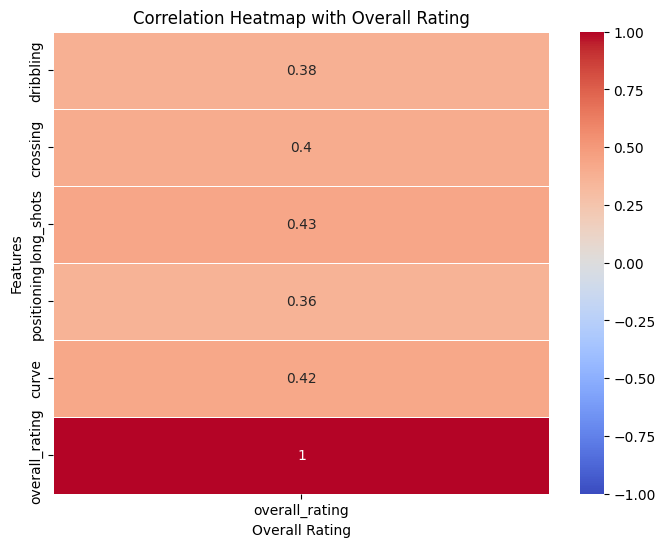

In [ ]:

correlations = pca_df.corr()

# Extract the correlation of all features with 'overall_rating' and reshape to 2D
correlations_with_overall = correlations[['overall_rating']]

# Set up the plot size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlations_with_overall, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap with Overall Rating')
plt.ylabel('Features')
plt.xlabel('Overall Rating')

# Display the plot
plt.show()


### 2. How is the data distributed?

#### 2a. How is the general distribution of data whilst respecting PCA results?

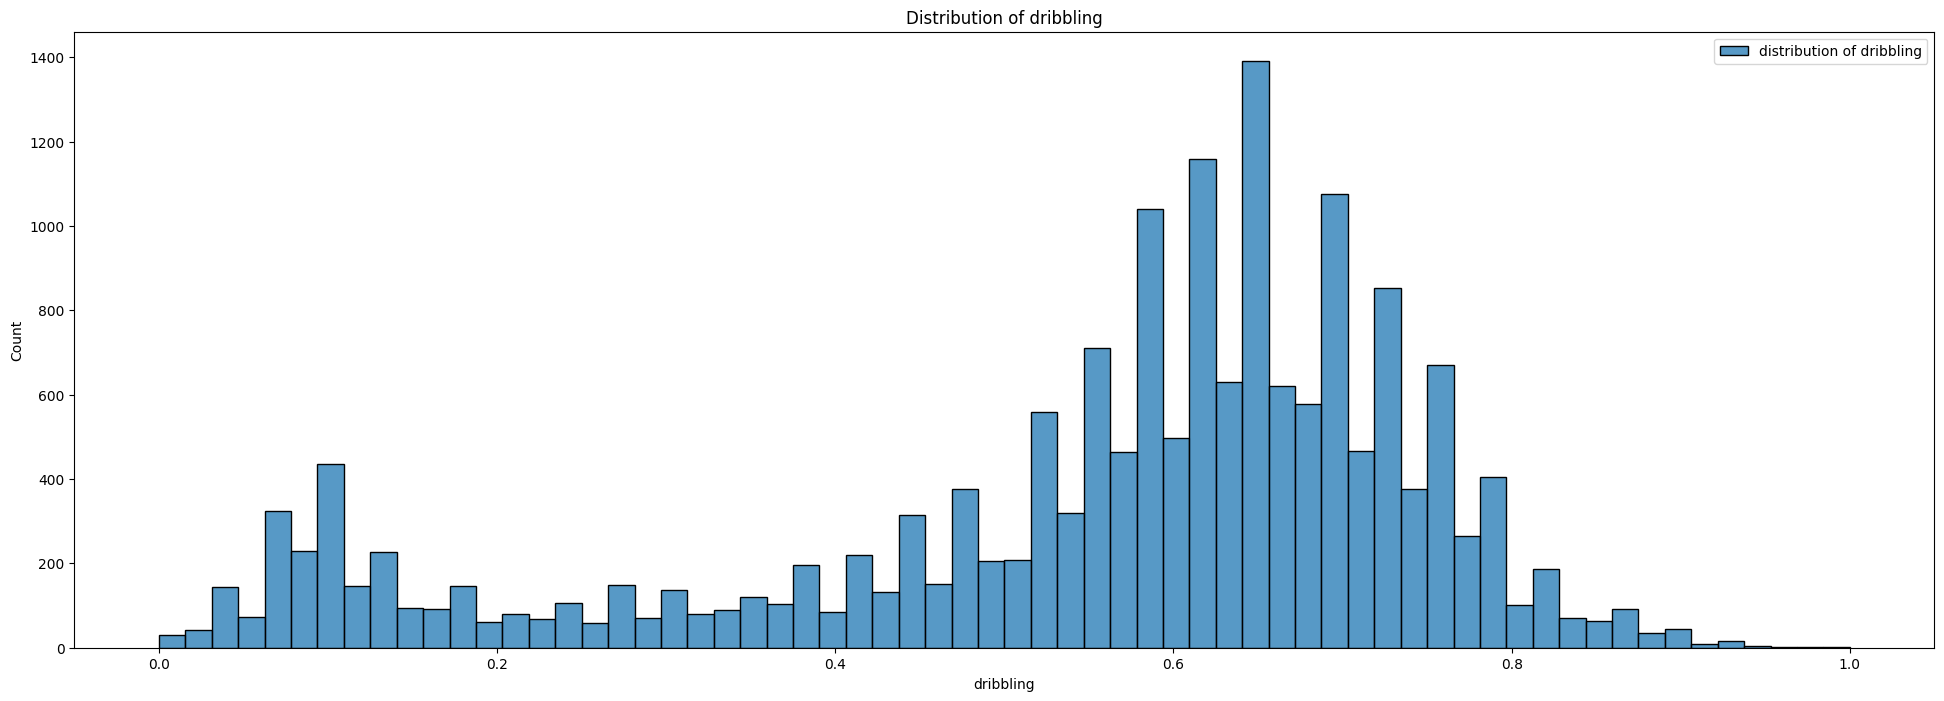

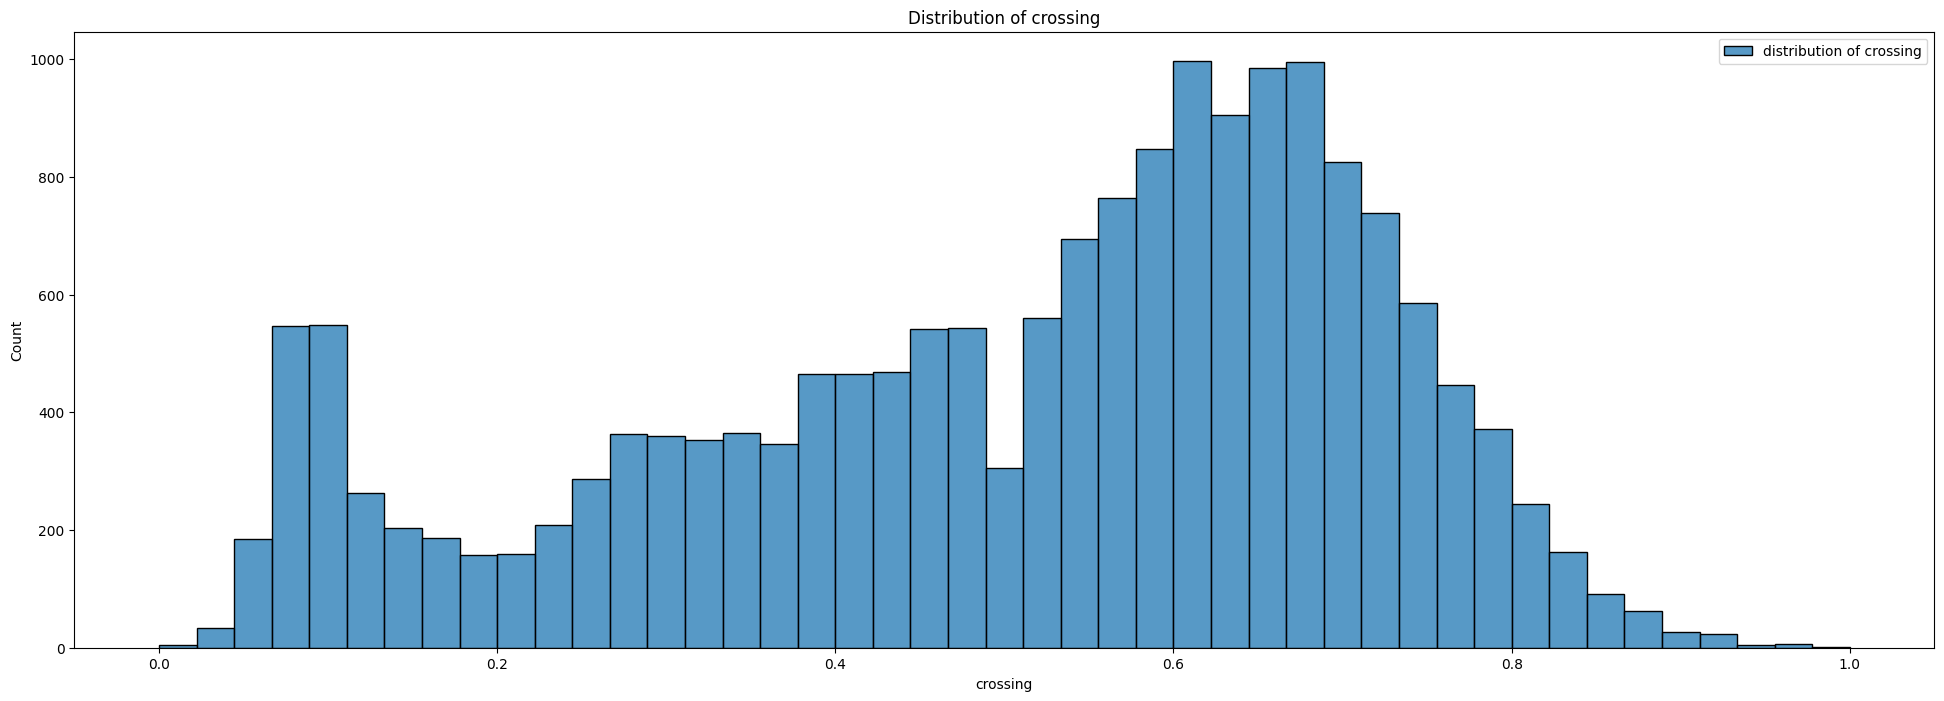

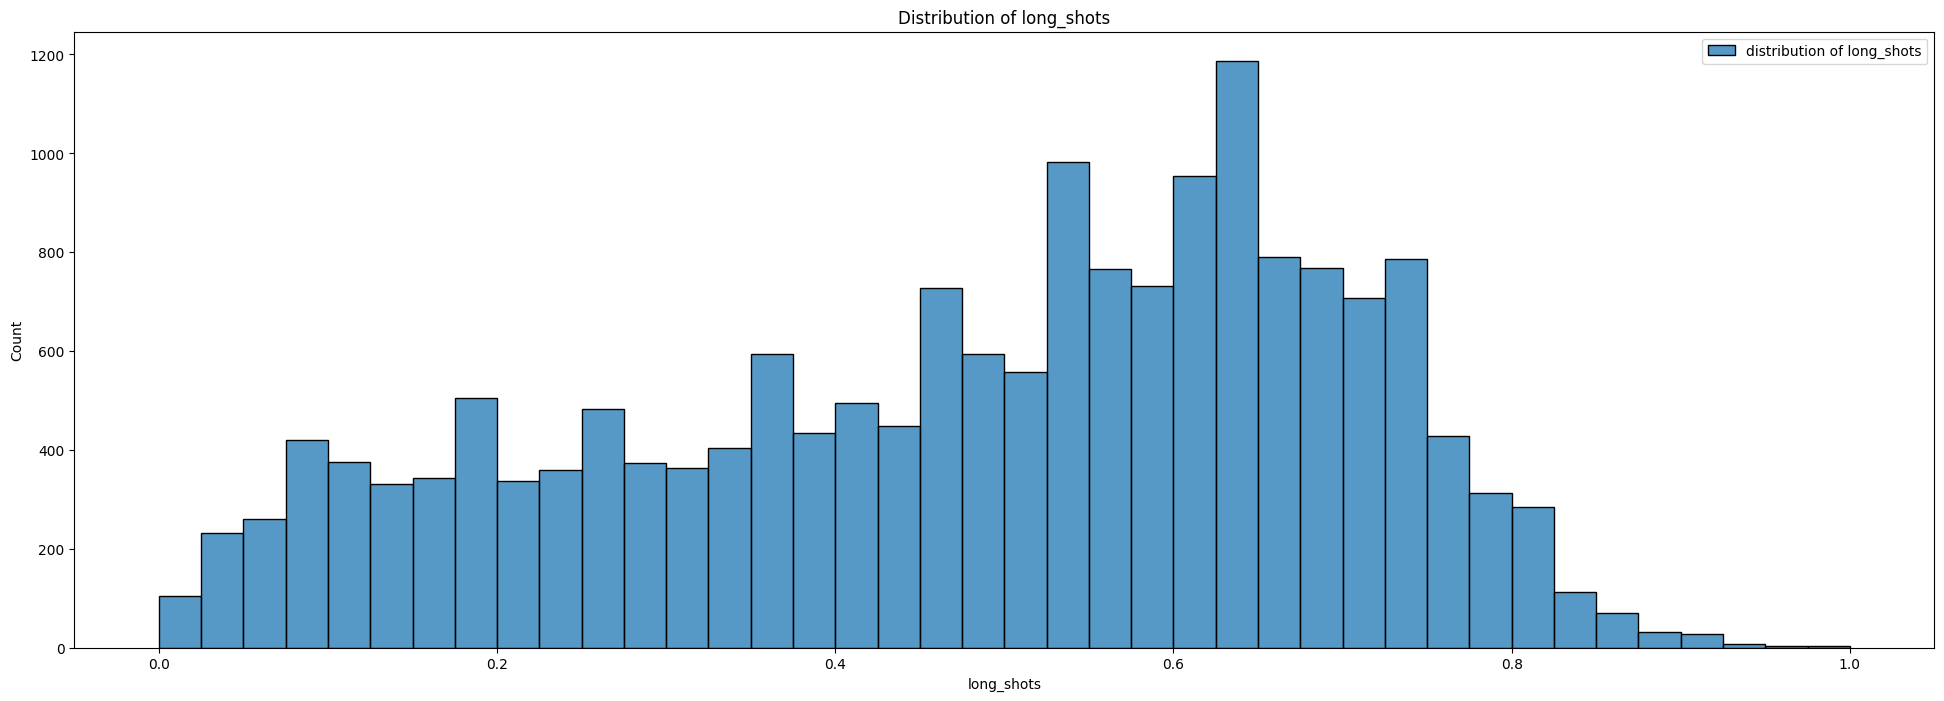

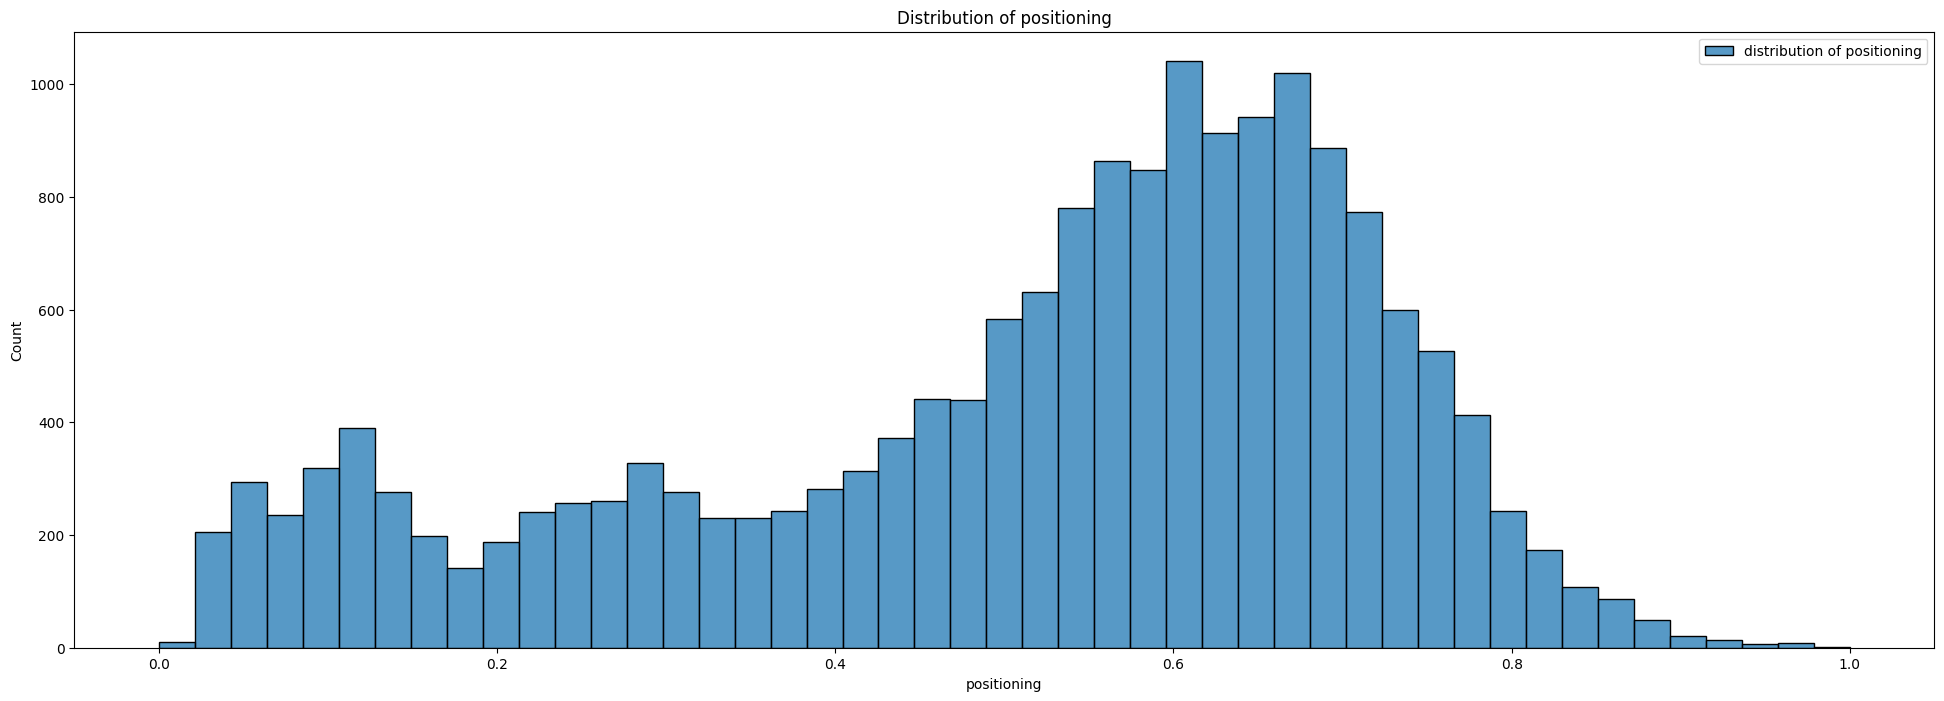

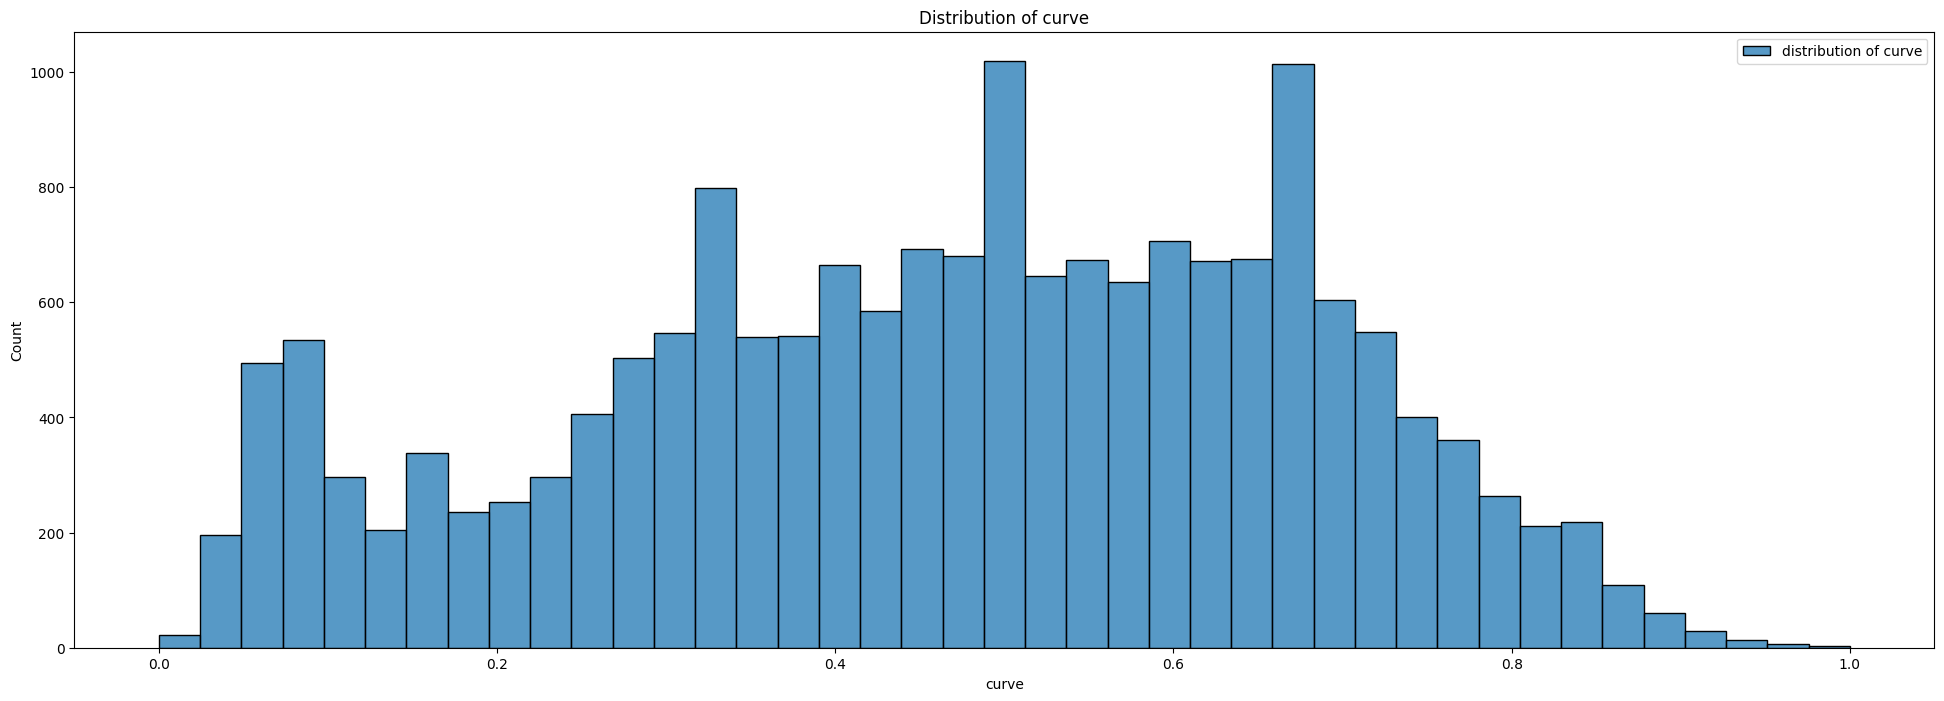

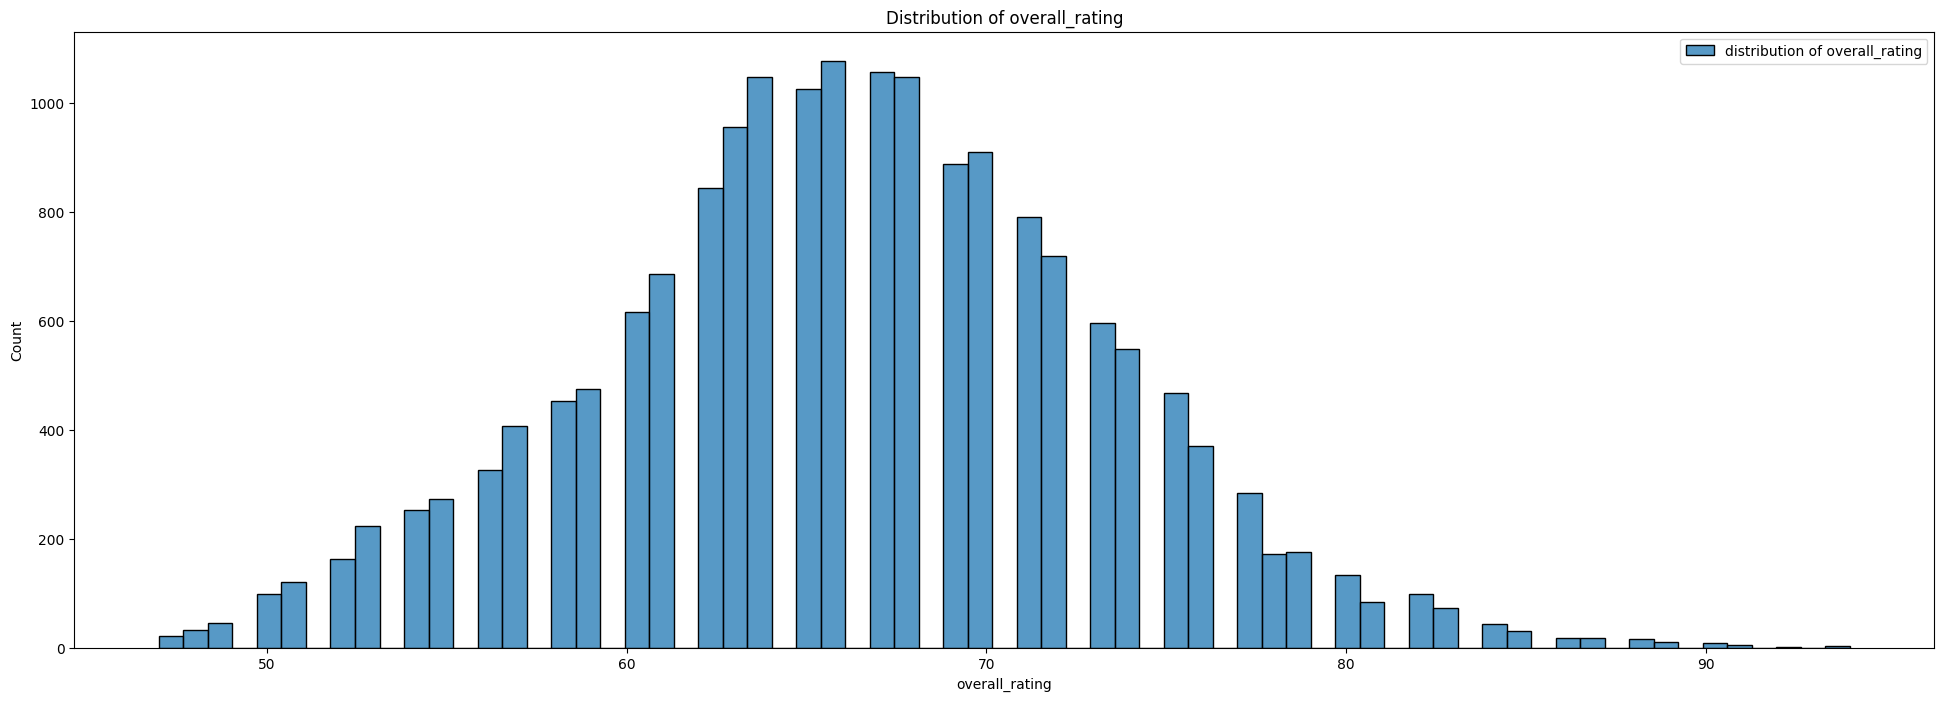

In [ ]:
for column in pca_df.columns:
    plt.figure(figsize=(24, 8))
    sns.histplot(x=pca_df[column], label=f'distribution of {column}')
    plt.xlabel(column)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()
    plt.close()



#### 2b. How is the distribution of low variance data with respect to the overall_rating


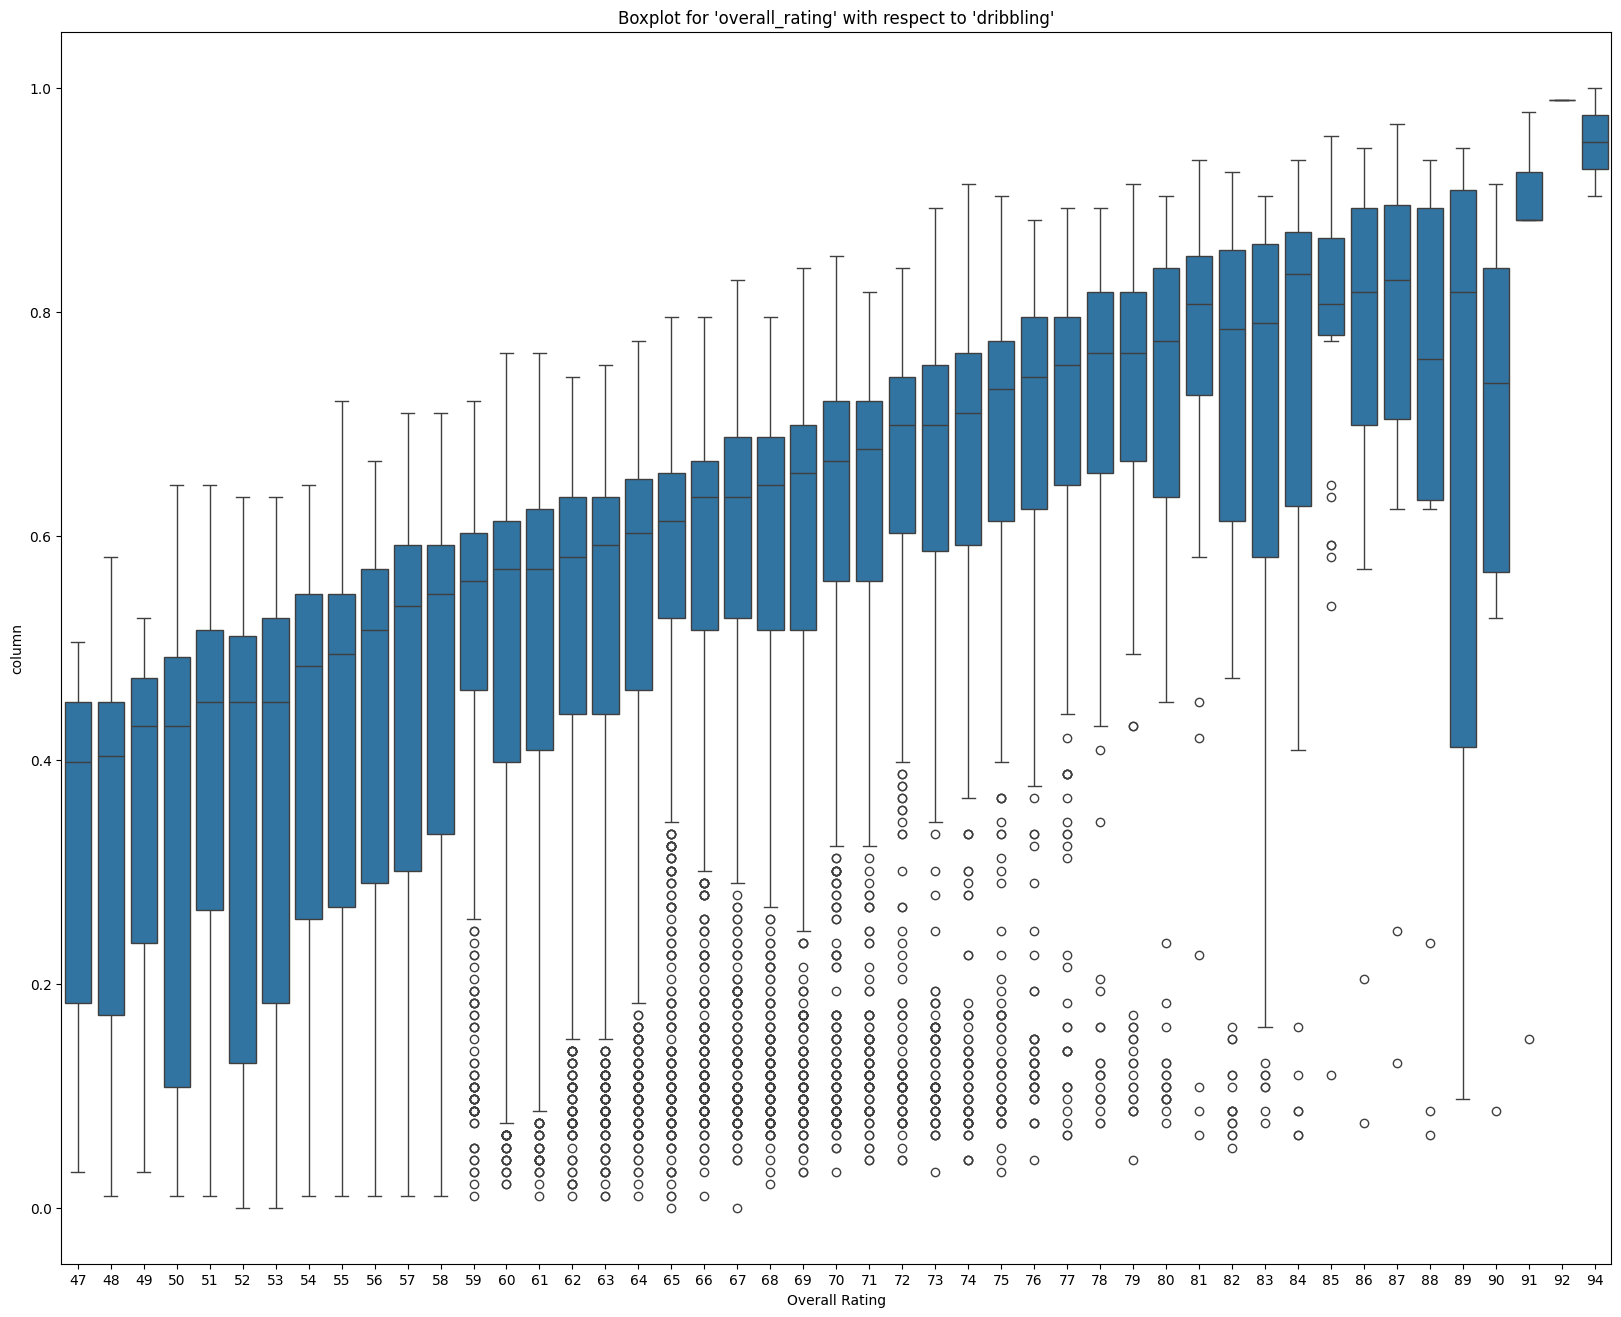

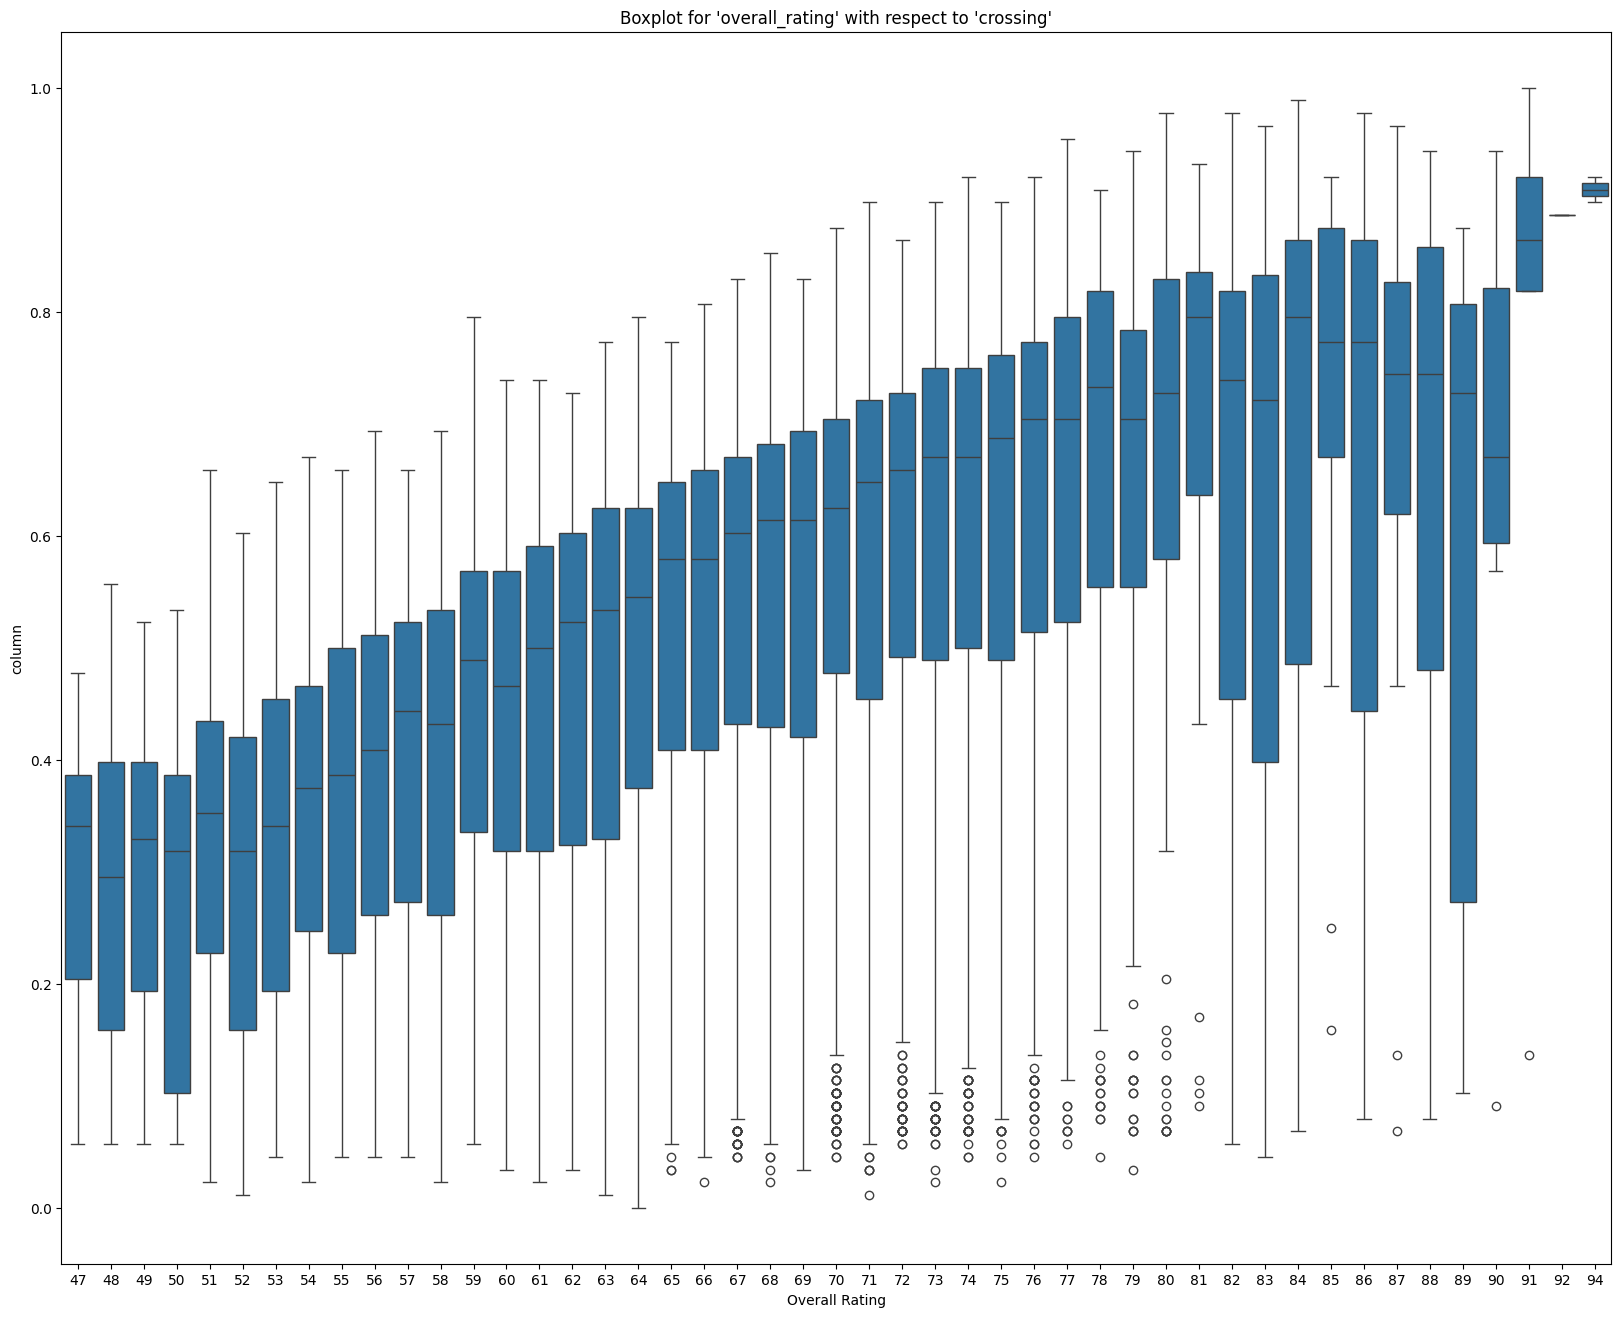

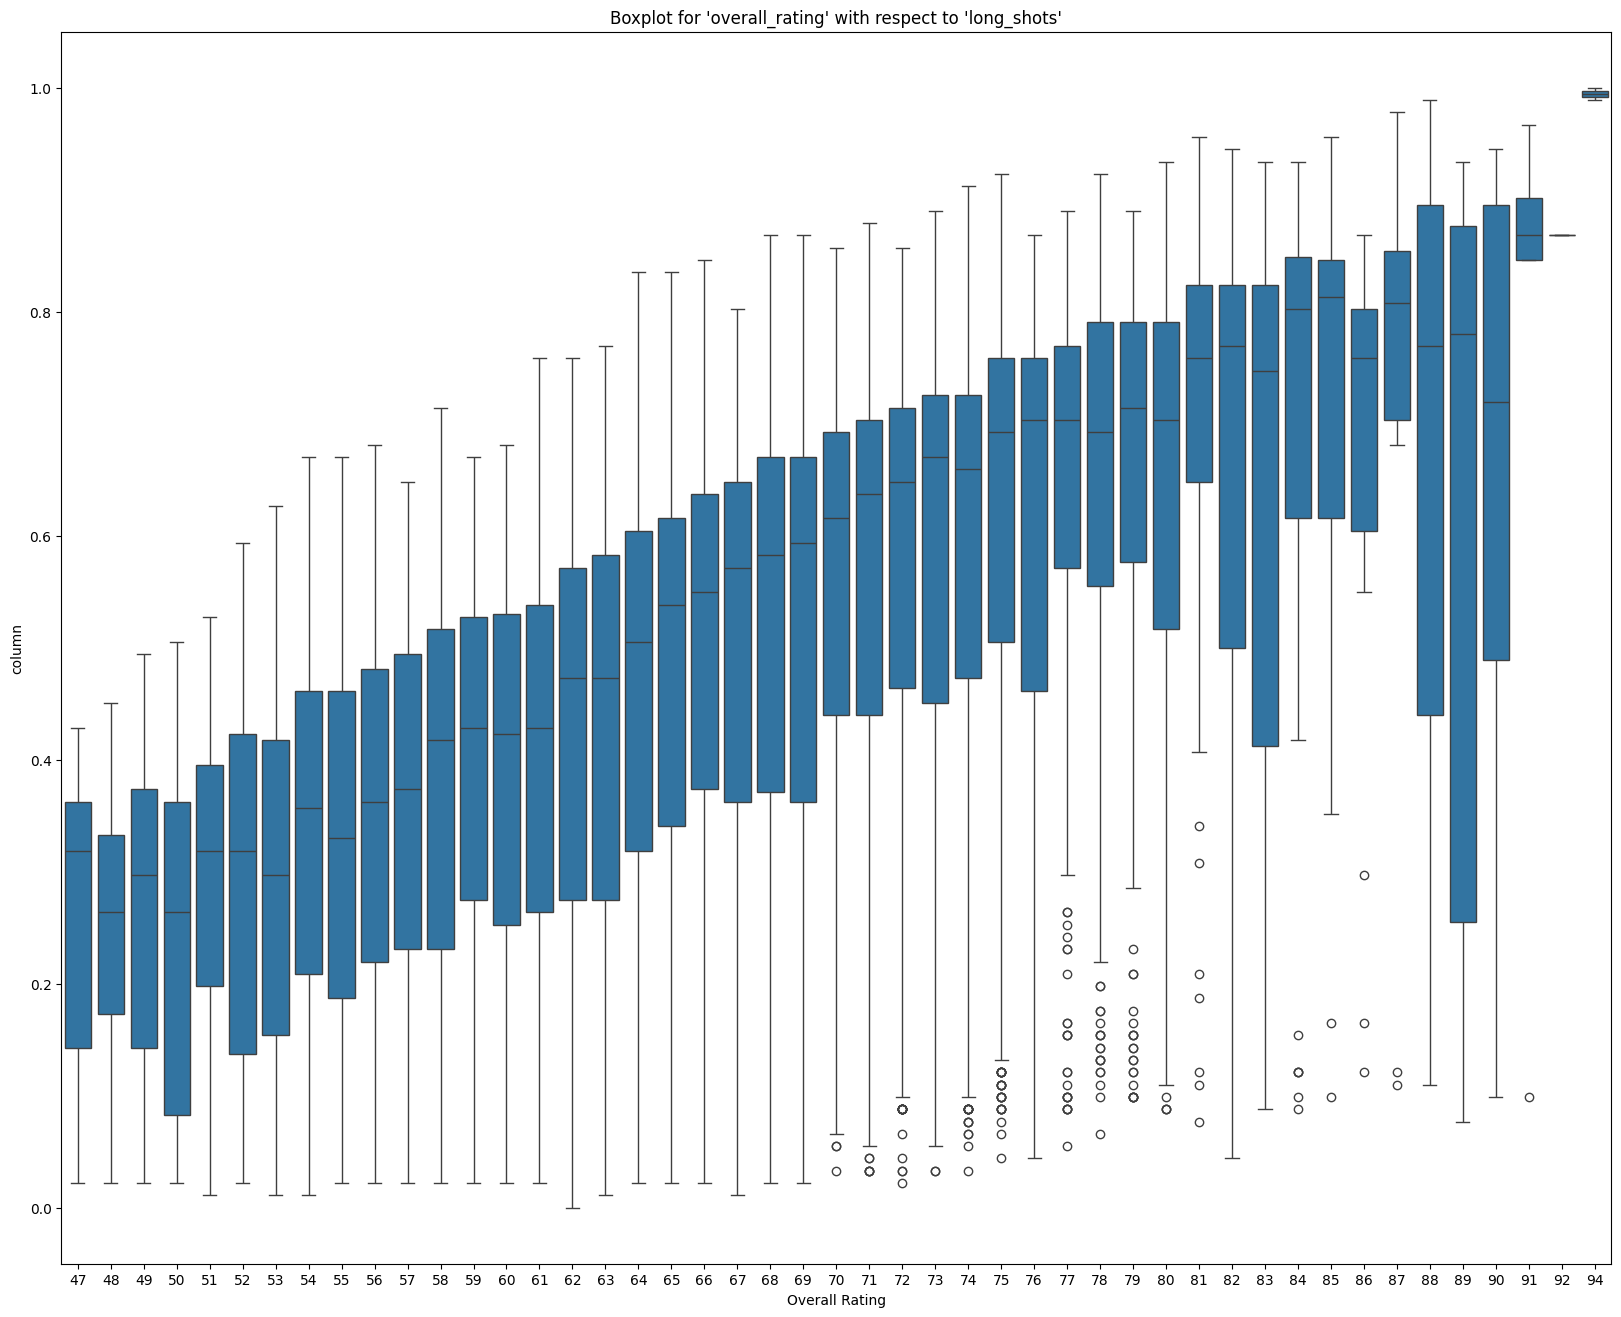

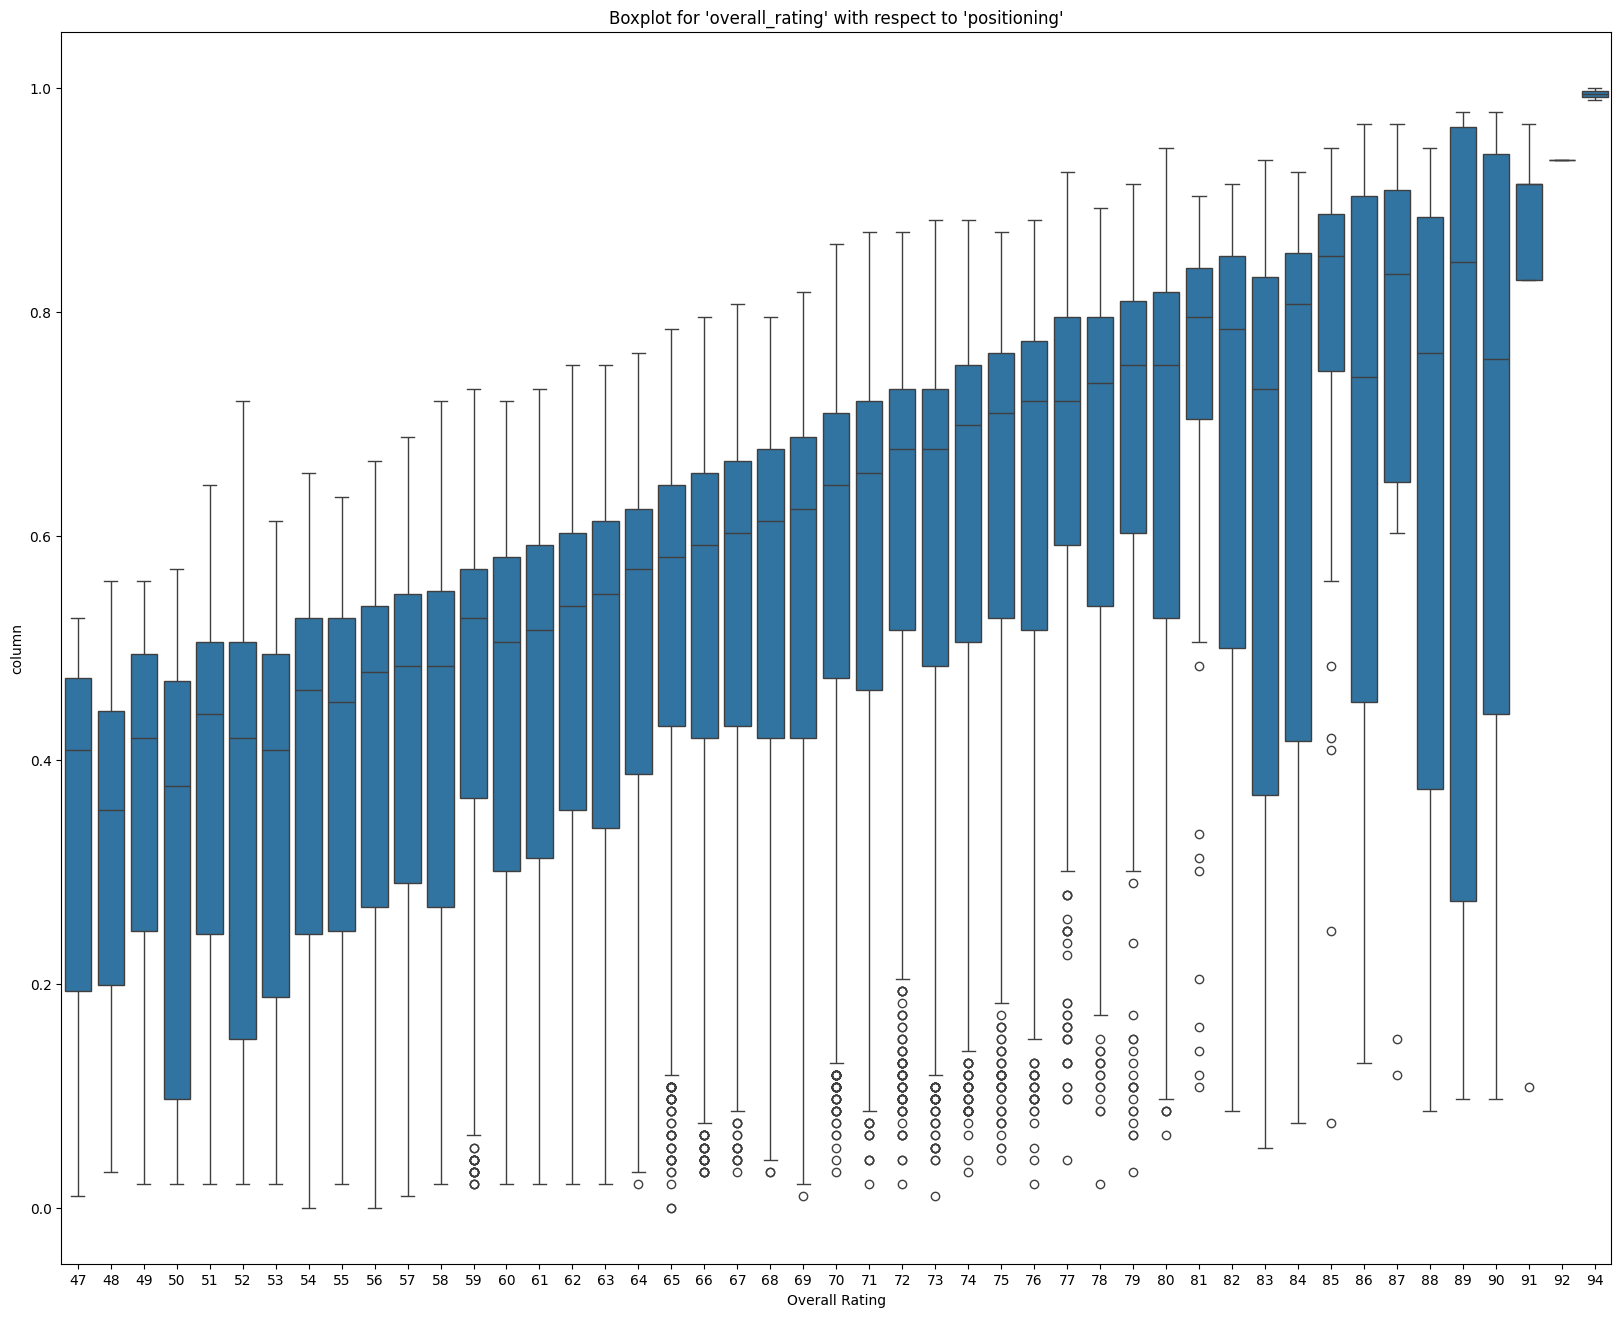

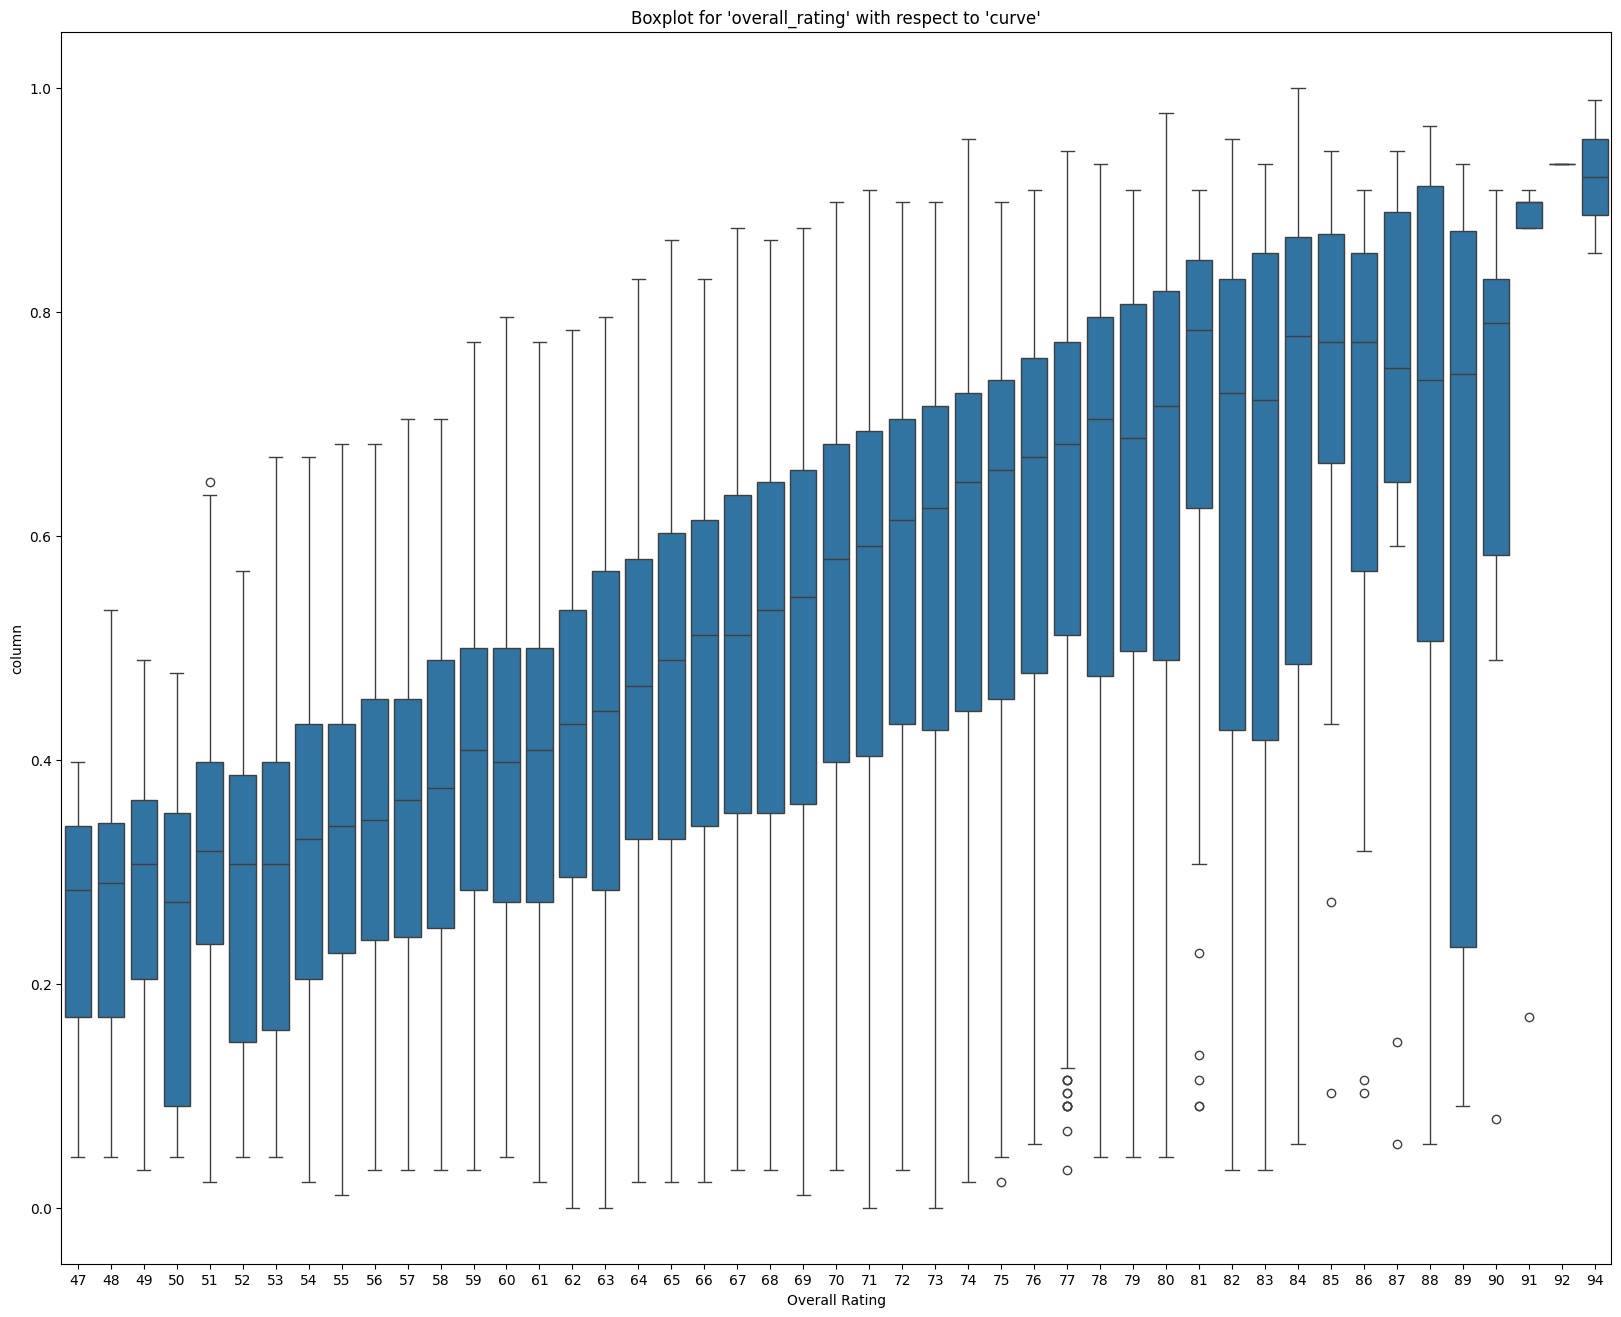

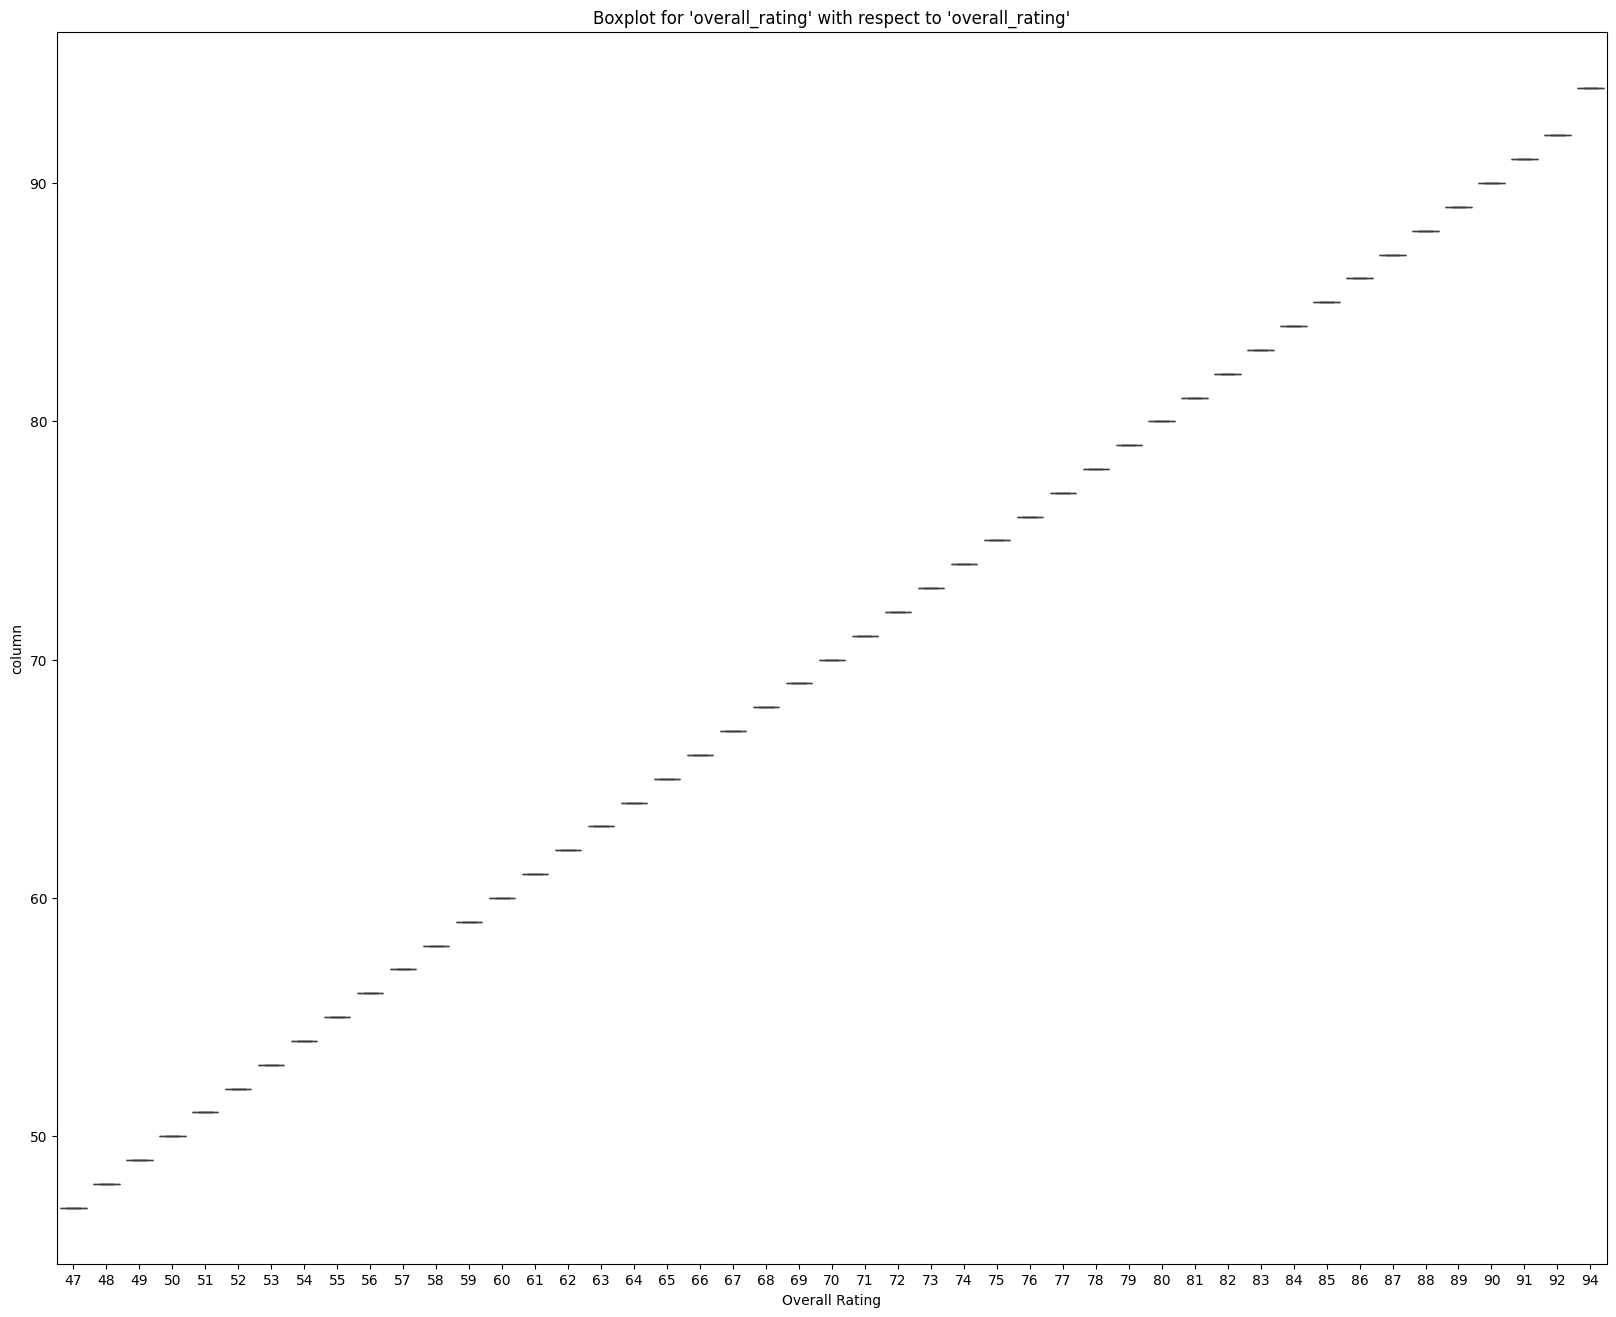

In [ ]:
for column in pca_df.columns:

    try:
        plt.figure(figsize=(20, 16))
        sns.boxplot(data=pca_df, x='overall_rating', y=column)
        plt.title(f"Boxplot for 'overall_rating' with respect to '{column}'")
        plt.xlabel('Overall Rating')
        plt.ylabel('column')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

#### 2c. How is the distribution of highly correlated data

In [ ]:
corr_df = eda_df[['reactions', 'composure', 'value_euro',  'overall_rating']]

corr_df

reactions  composure  value_euro  overall_rating
0       0.986111   1.000000    1.000000              94
1       0.888889   0.904762    0.628926              88
2       0.805556   0.892857    0.660603              88
3       0.819444   0.845238    0.561046              88
4       0.805556   0.809524    0.542945              88
...          ...        ...         ...             ...
17694   0.541667   0.523810    0.008734              67
17695   0.361111   0.476190    0.001629              59
17696   0.333333   0.416667    0.001448              59
17697   0.402778   0.488095    0.002444              59
17698   0.416667   0.392857    0.002851              59

[17699 rows x 4 columns]

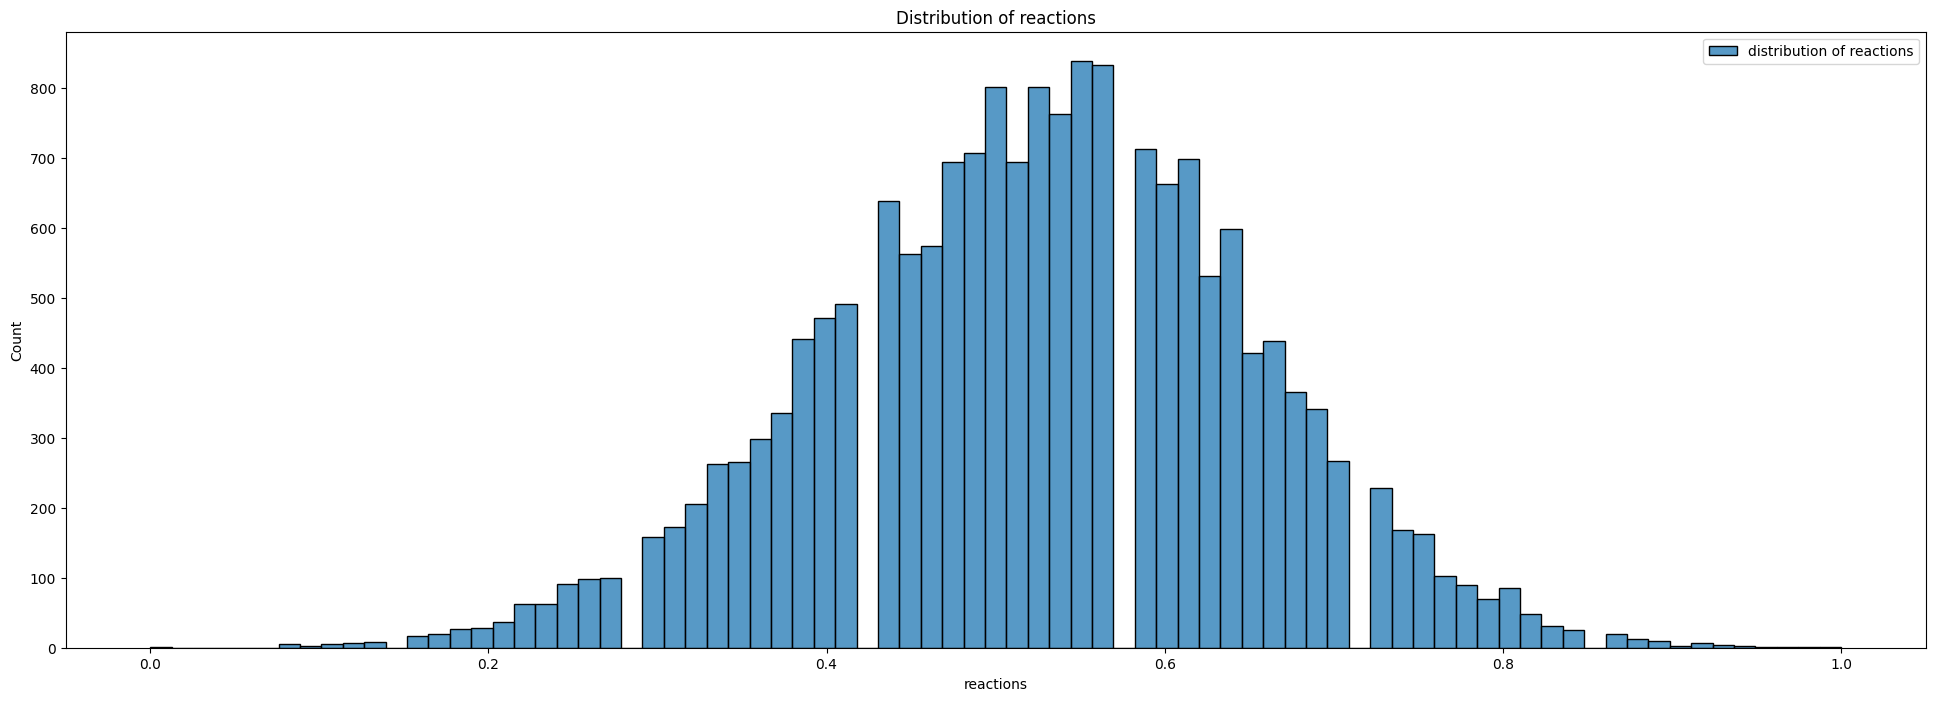

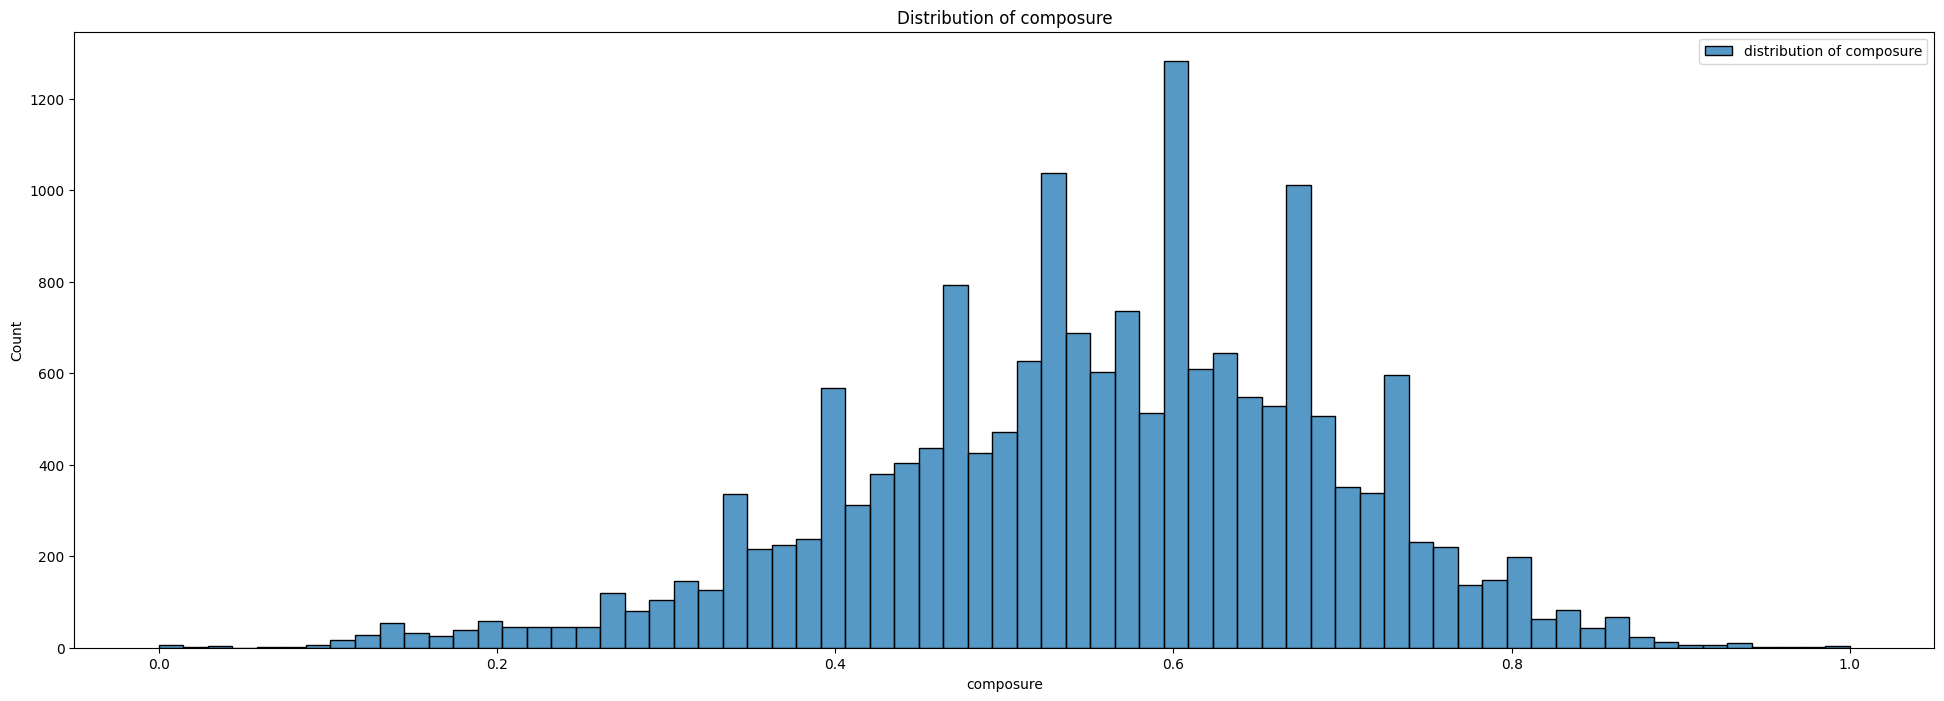

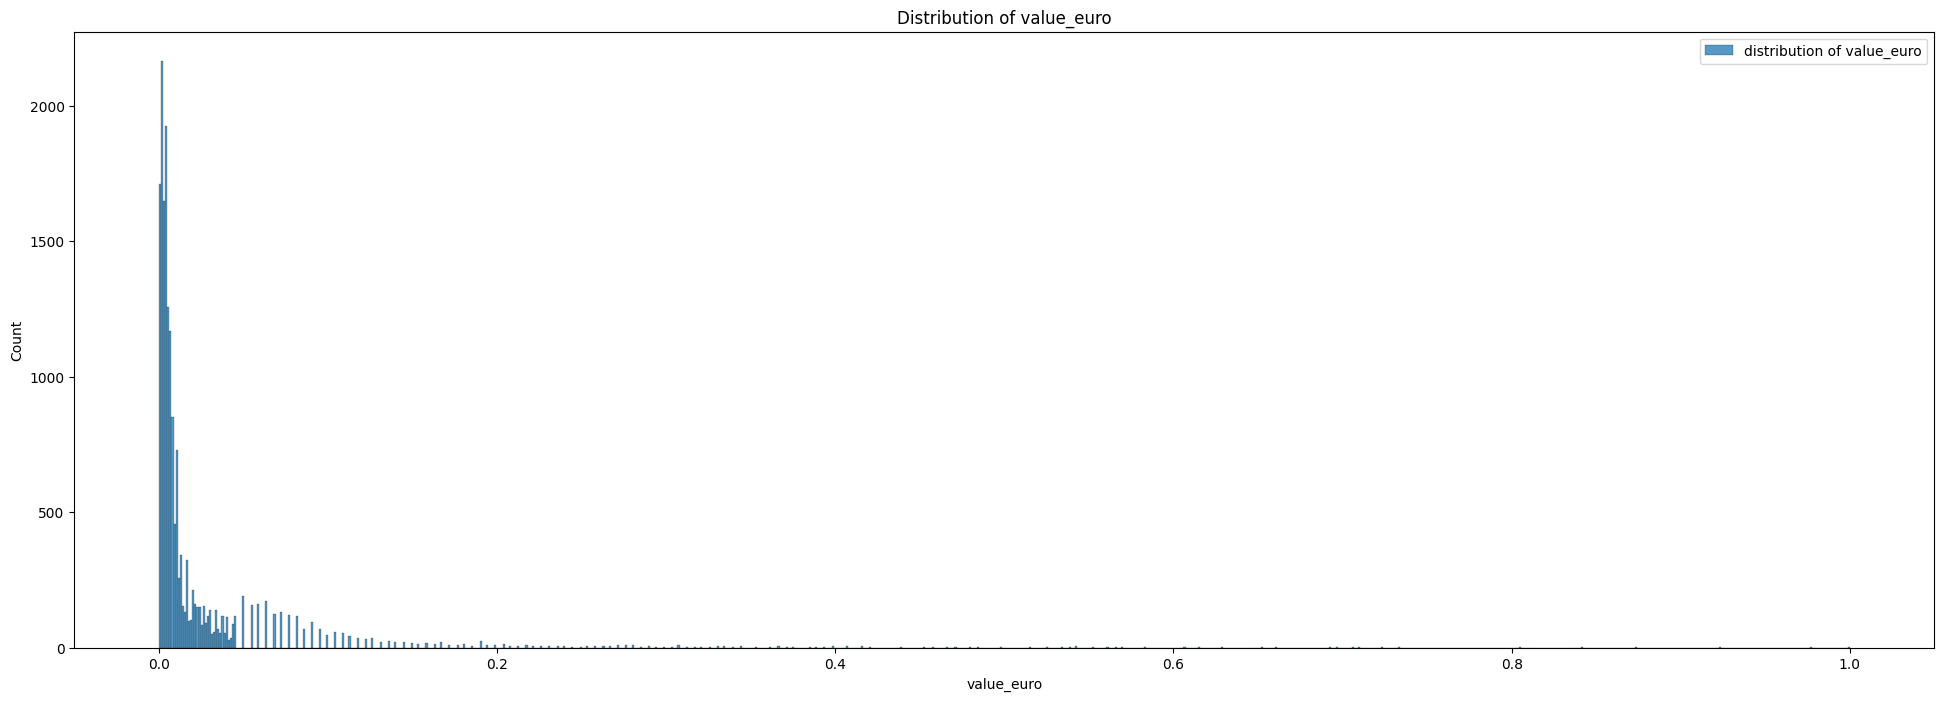

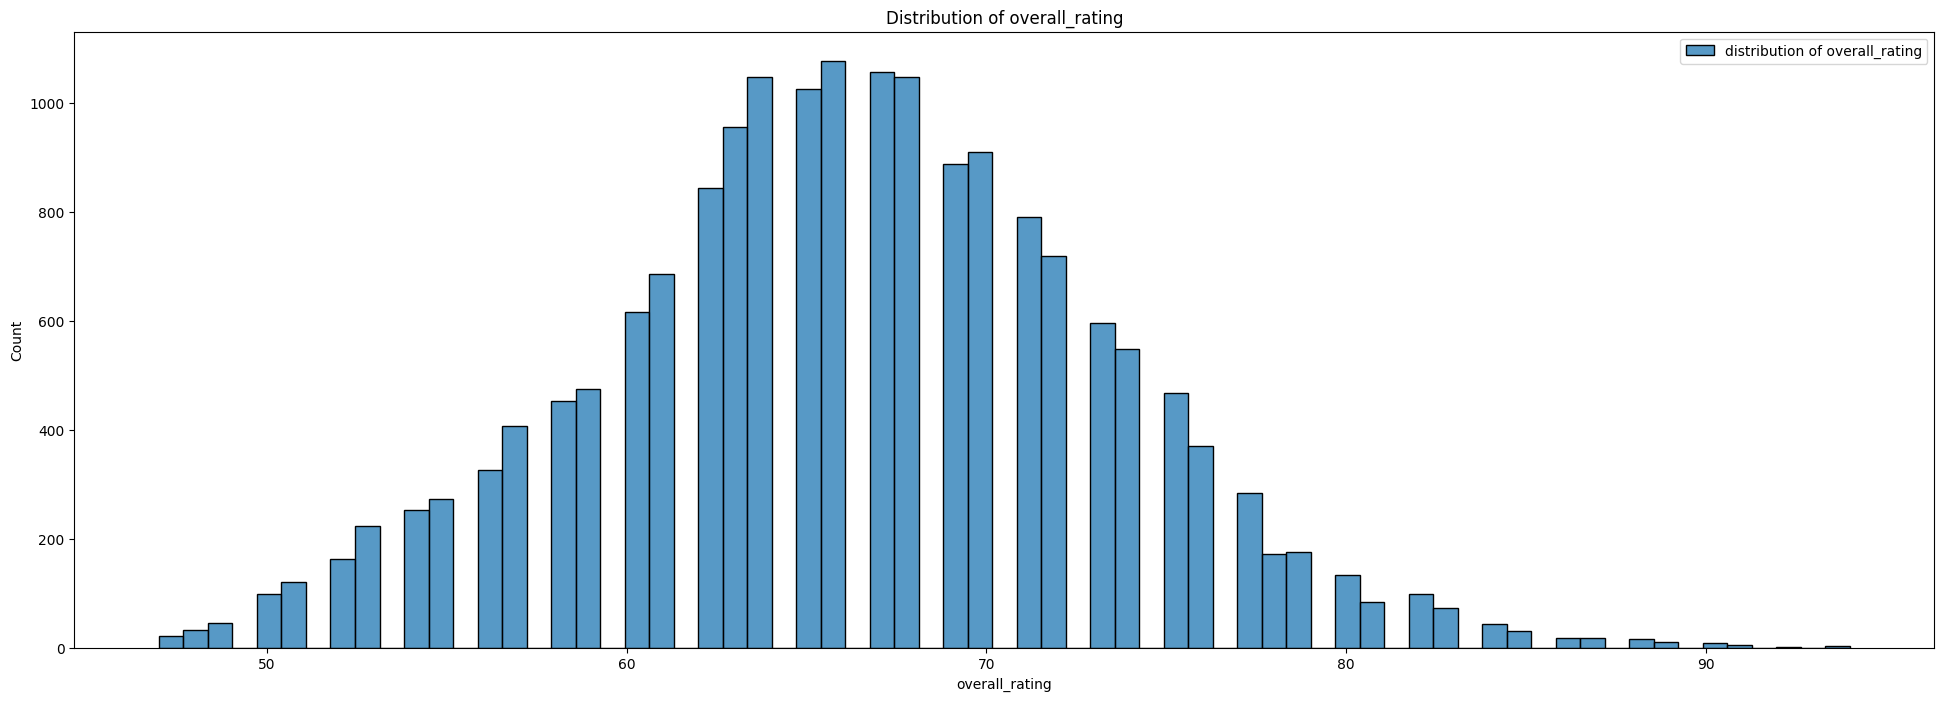

In [ ]:
for column in corr_df.columns:
    try:
        plt.figure(figsize=(24, 8))
        sns.histplot(x=corr_df[column], label=f'distribution of {column}')
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.show()
        plt.close()
    except Exception as e:
        print(e)


#### 2d. How correlated is the highley correlated data with respect to each other

In [ ]:
correlation_matrix = corr_df.corr()

print(correlation_matrix)

                reactions  composure  value_euro  overall_rating
reactions        1.000000   0.693352    0.547615        0.857014
composure        0.693352   1.000000    0.456538        0.731415
value_euro       0.547615   0.456538    1.000000        0.630928
overall_rating   0.857014   0.731415    0.630928        1.000000


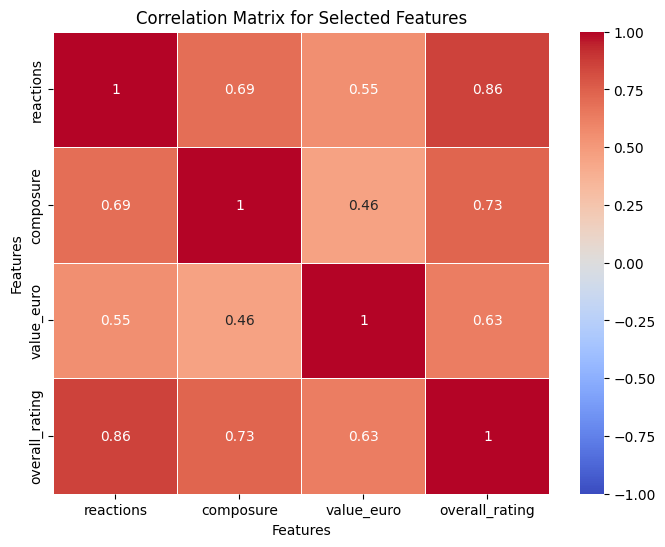

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix for Selected Features')
plt.ylabel('Features')
plt.xlabel('Features')

plt.show()

#### 2e. boxplots

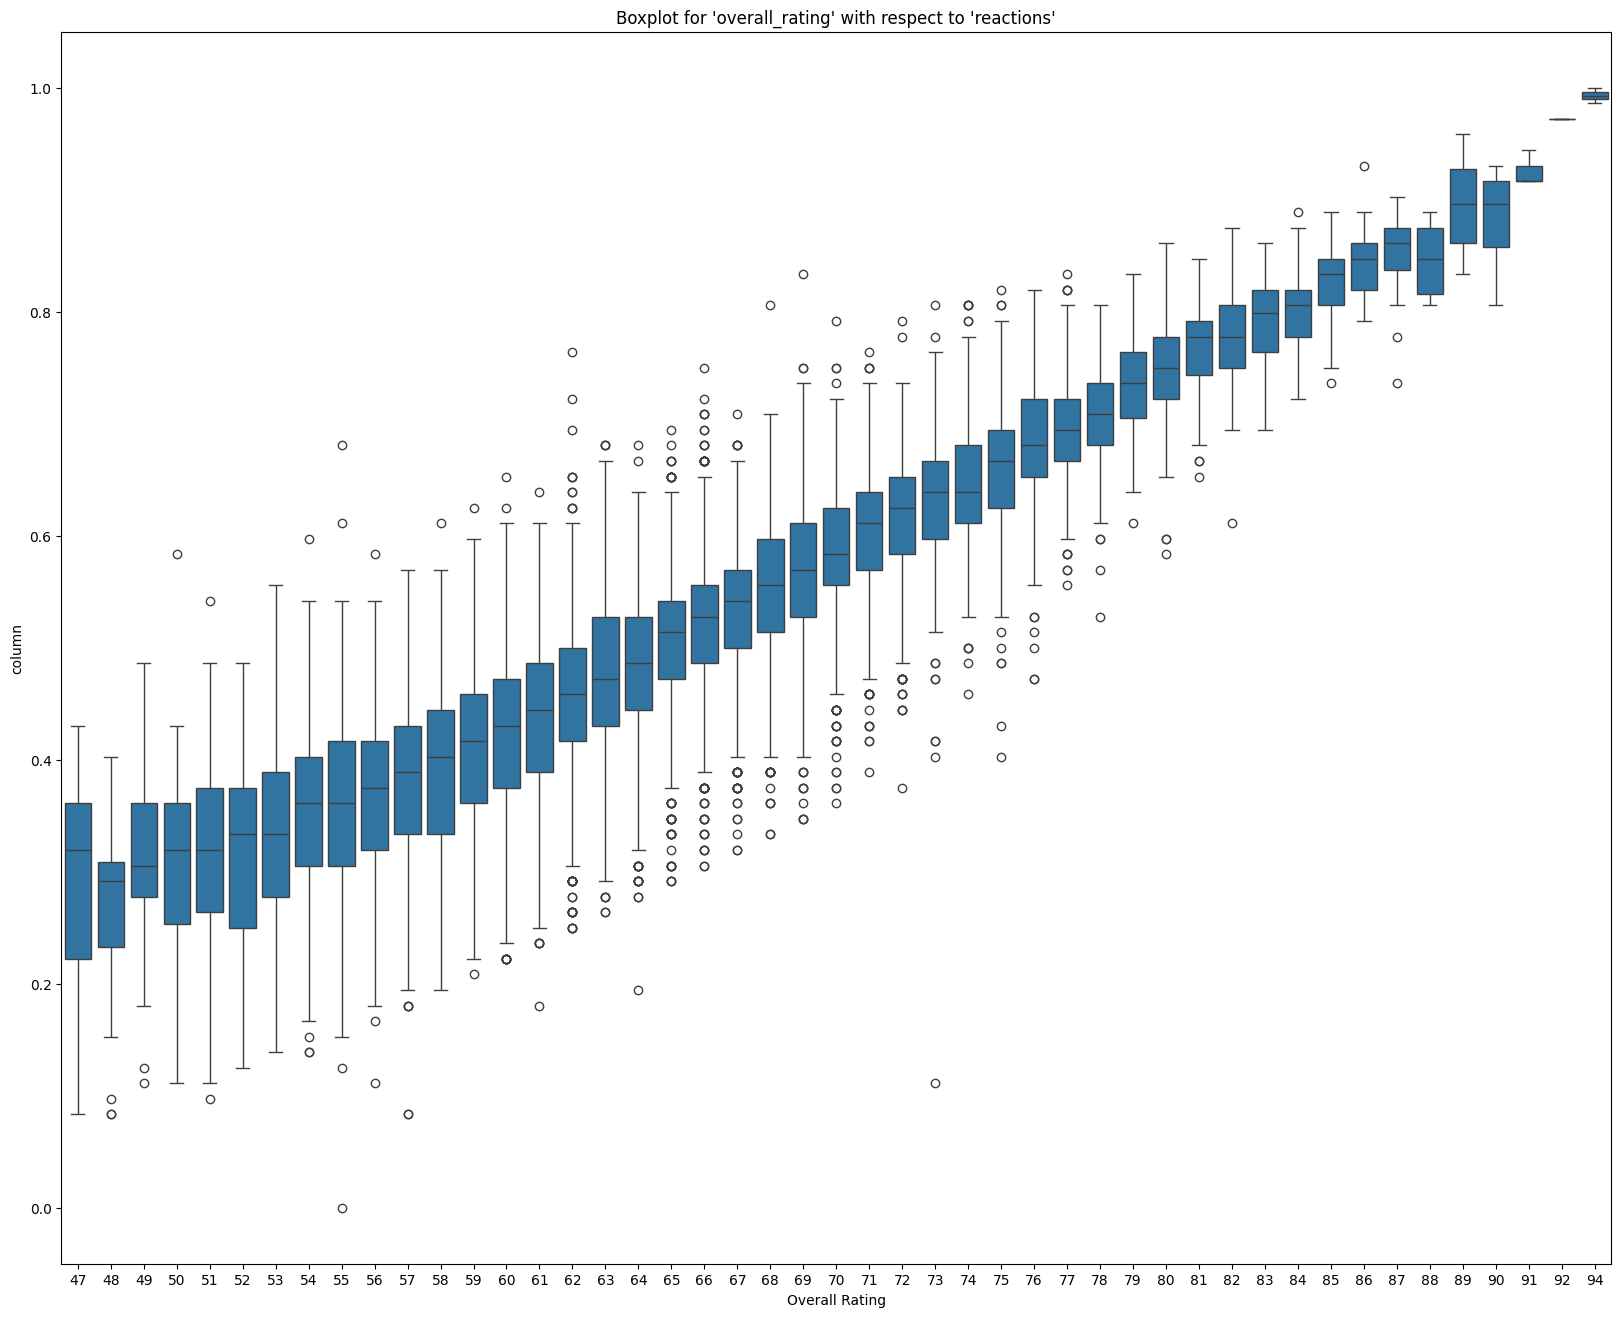

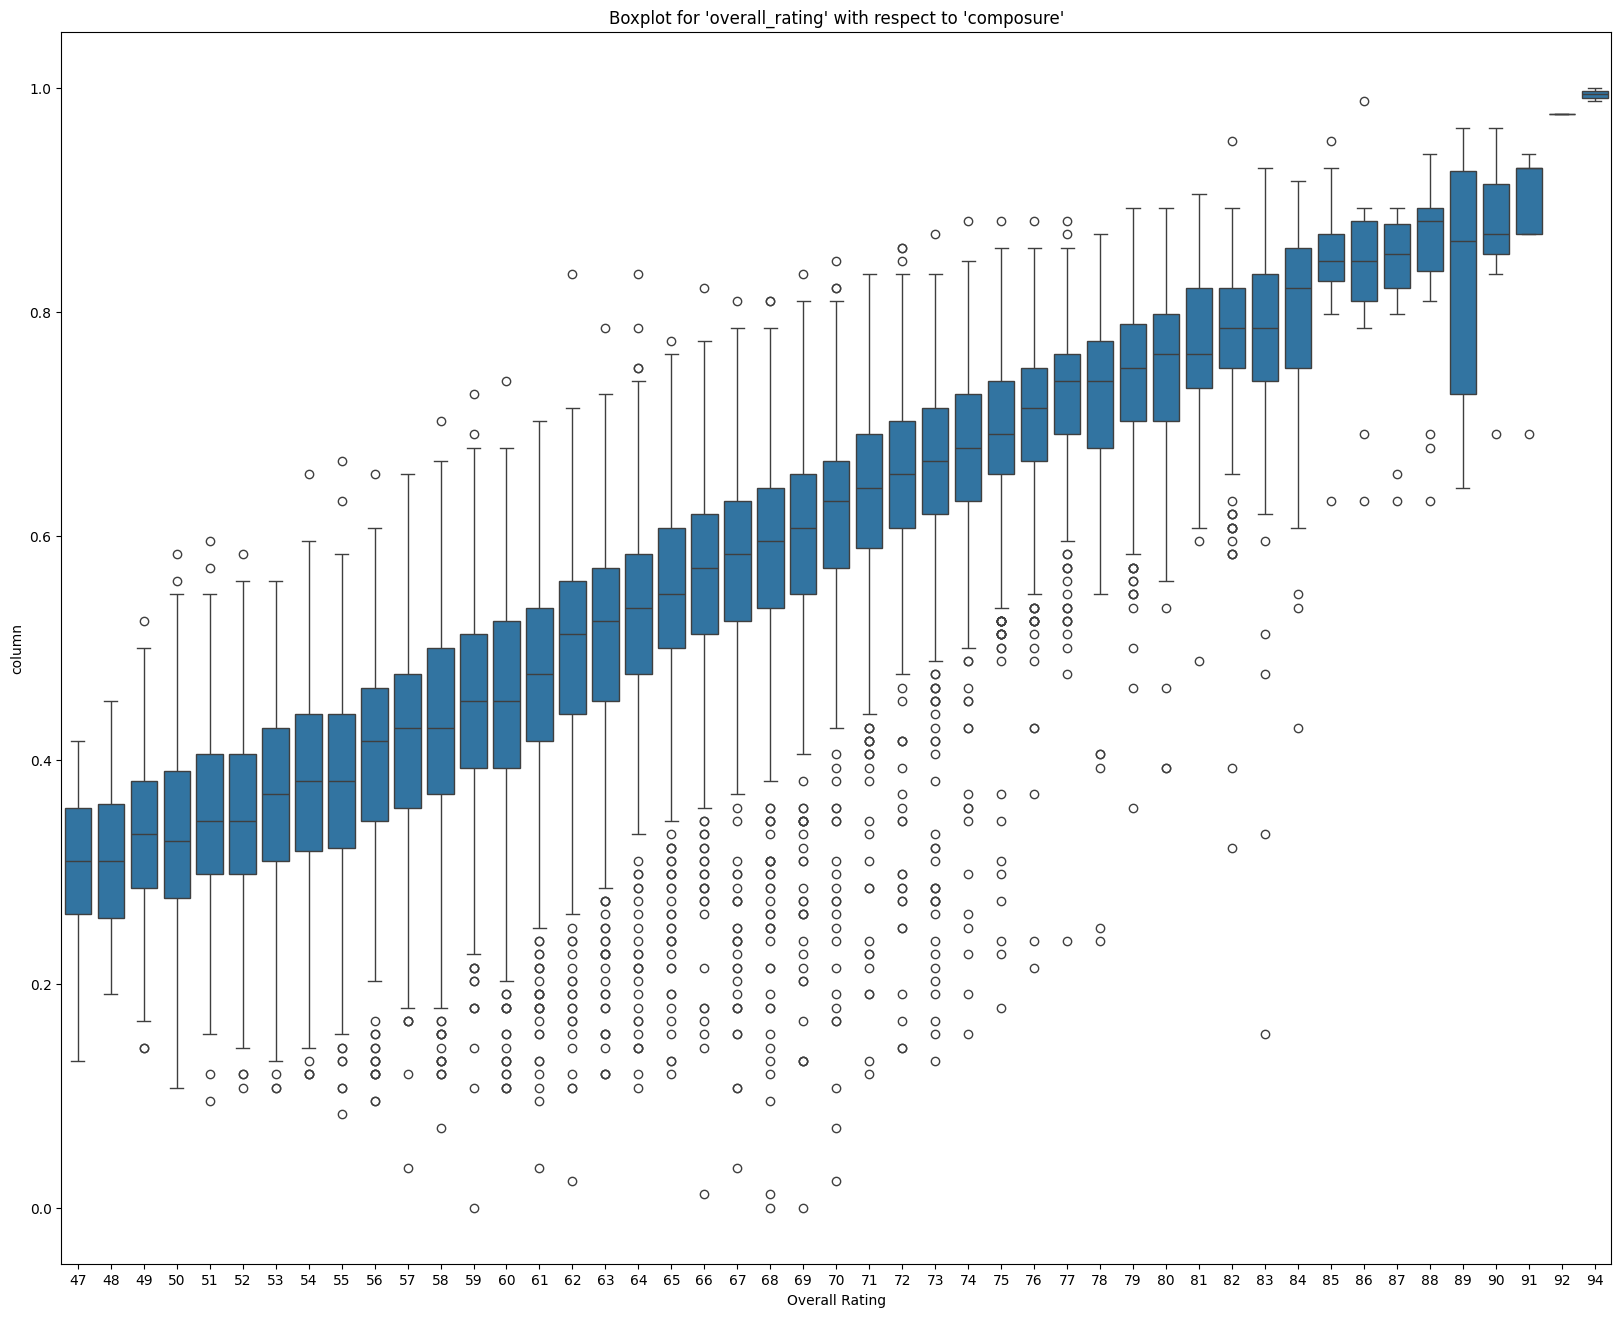

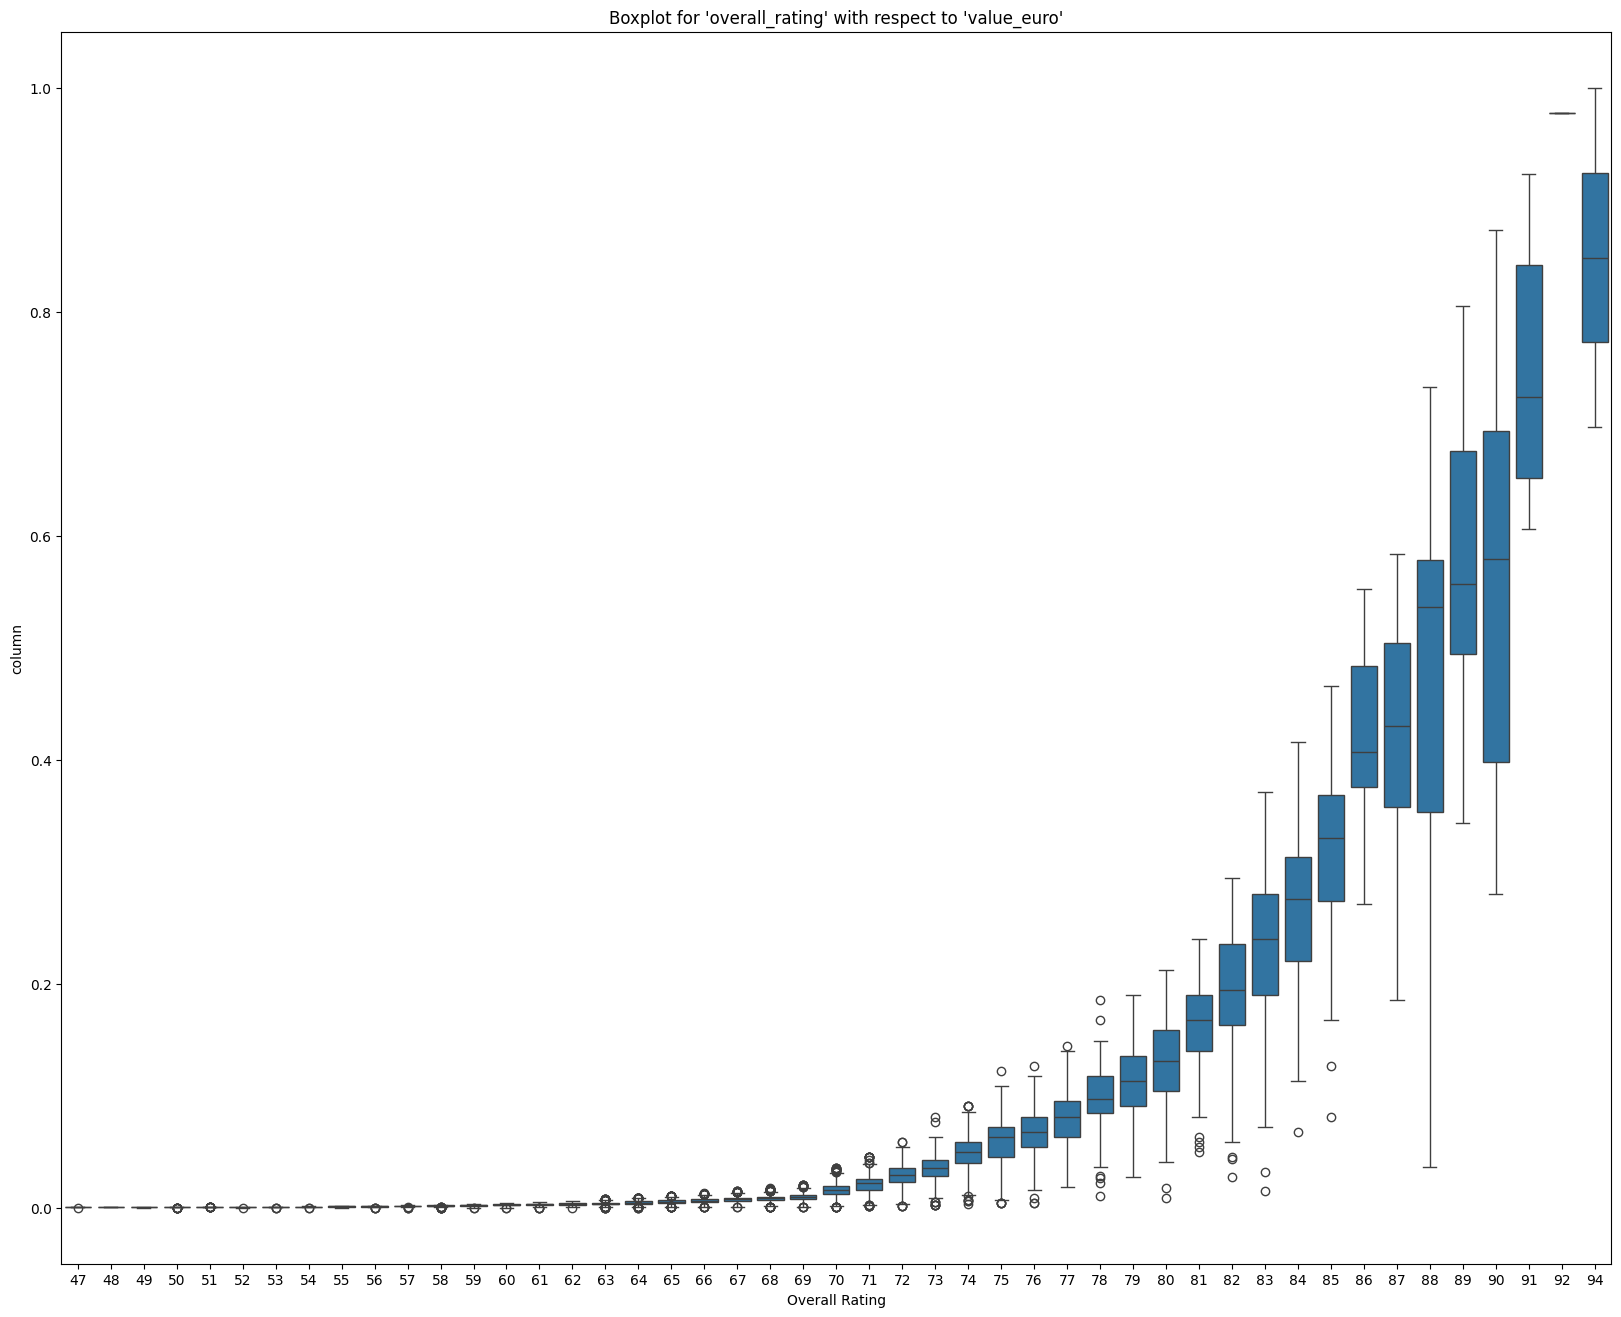

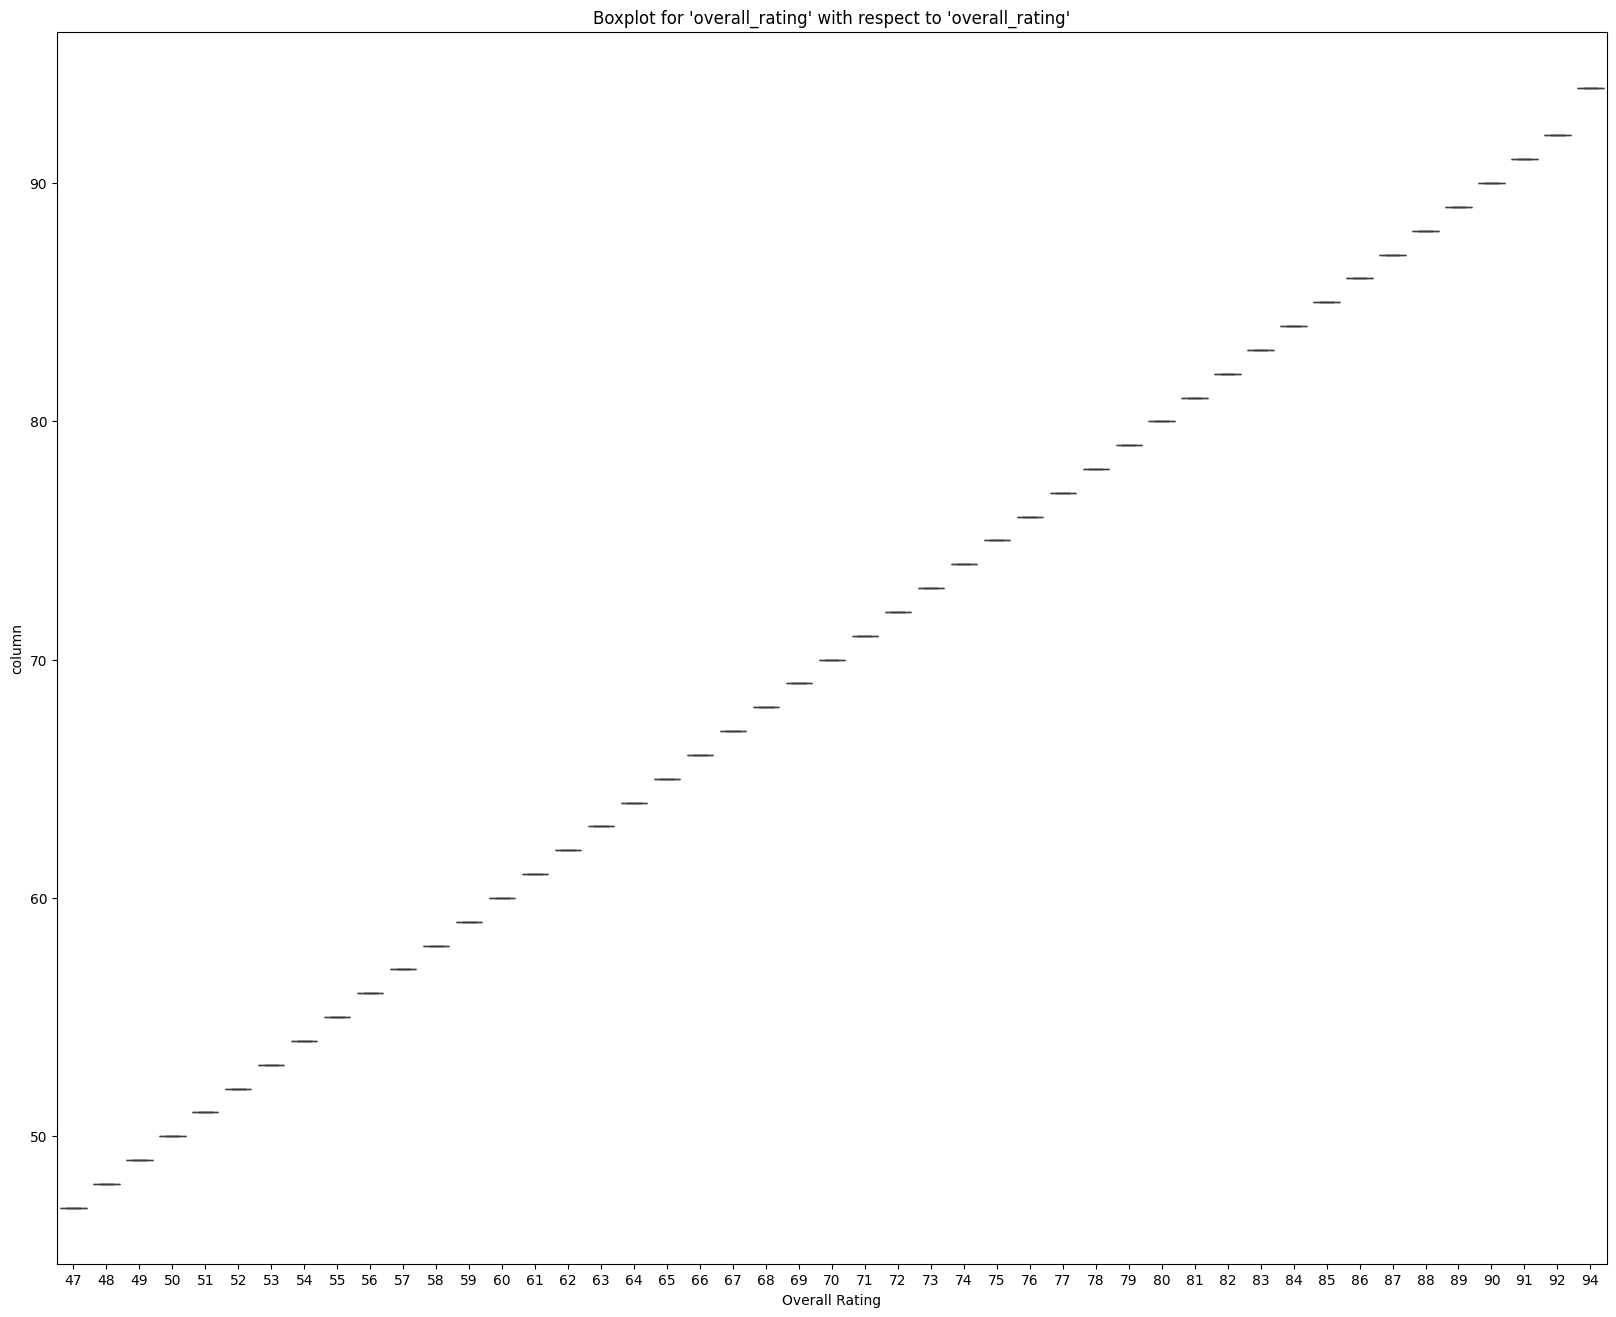

In [ ]:
for column in corr_df.columns:

    try:
        plt.figure(figsize=(20, 16))
        sns.boxplot(data=corr_df, x='overall_rating', y=column)
        plt.title(f"Boxplot for 'overall_rating' with respect to '{column}'")
        plt.xlabel('Overall Rating')
        plt.ylabel('column')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

### 3. How does the data look like with respect to the position a player plays

#### 3a. Bin general positions together

In [ ]:
def assign_based_on_first_match(positions):
    # Split the positions into a list
    position_list = positions.split(',')
    
    # Iterate through positions and assign category based on the first match
    for position in position_list:
        if position in position_to_category:
            return position_to_category[position]
    
    return 'Unknown'  # In case no position matches
# Define bins for positions
bins = {
    "Attacking": ['CF', 'ST', 'LW', 'RW'],
    "Midfield": ['CAM', 'CM', 'CDM', 'LM', 'RM'],
    "Defense": ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    "Goalkeeper": ['GK']
}

# Reverse map positions to categories
position_to_category = {}
for category, positions in bins.items():
    for position in positions:
        position_to_category[position] = category

# Apply the function to the DataFrame
new_df['Category'] = df['positions'].apply(assign_based_on_first_match)

new_df.head()

age  heading_accuracy  dribbling  long_passing  reactions  \
0  0.482759          0.733333   1.000000      0.952381   0.986111   
1  0.344828          0.533333   0.860215      0.952381   0.888889   
2  0.275862          0.788889   0.892473      0.964286   0.805556   
3  0.344828          0.577778   0.924731      0.821429   0.819444   
4  0.344828          0.877778   0.698925      0.607143   0.805556   

   freekick_accuracy  finishing   marking   stamina  wage_euro  ...  crossing  \
0           1.000000   1.000000  0.329670  0.705882   1.000000  ...  0.920455   
1           0.923077   0.849462  0.615385  0.941176   0.361702  ...  0.943182   
2           0.868132   0.784946  0.659341  0.894118   0.450355  ...  0.852273   
3           0.813187   0.806452  0.527473  0.741176   0.290780  ...  0.920455   
4           0.274725   0.215054  0.967033  0.741176   0.237589  ...  0.284091   

   sliding_tackle    vision  interceptions  value_euro  jumping  aggression  \
0        0.264368  1.000000       0.213483    1.000000   0.6625    0.440476   
1        0.218391  0.964286       0.595506    0.628926   0.4375    0.416667   
2        0.735632  0.928571       0.685393    0.660603   0.8500    0.797619   
3        0.218391  0.916667       0.258427    0.561046   0.4750    0.273810   
4        0.965517  0.464286       0.955056    0.542945   0.8250    0.904762   

   composure  overall_rating   Category  
0   1.000000              94  Attacking  
1   0.904762              88   Midfield  
2   0.892857              88   Midfield  
3   0.845238              88  Attacking  
4   0.809524              88    Defense  

[5 rows x 34 columns]

#### 3b. Visualize the data

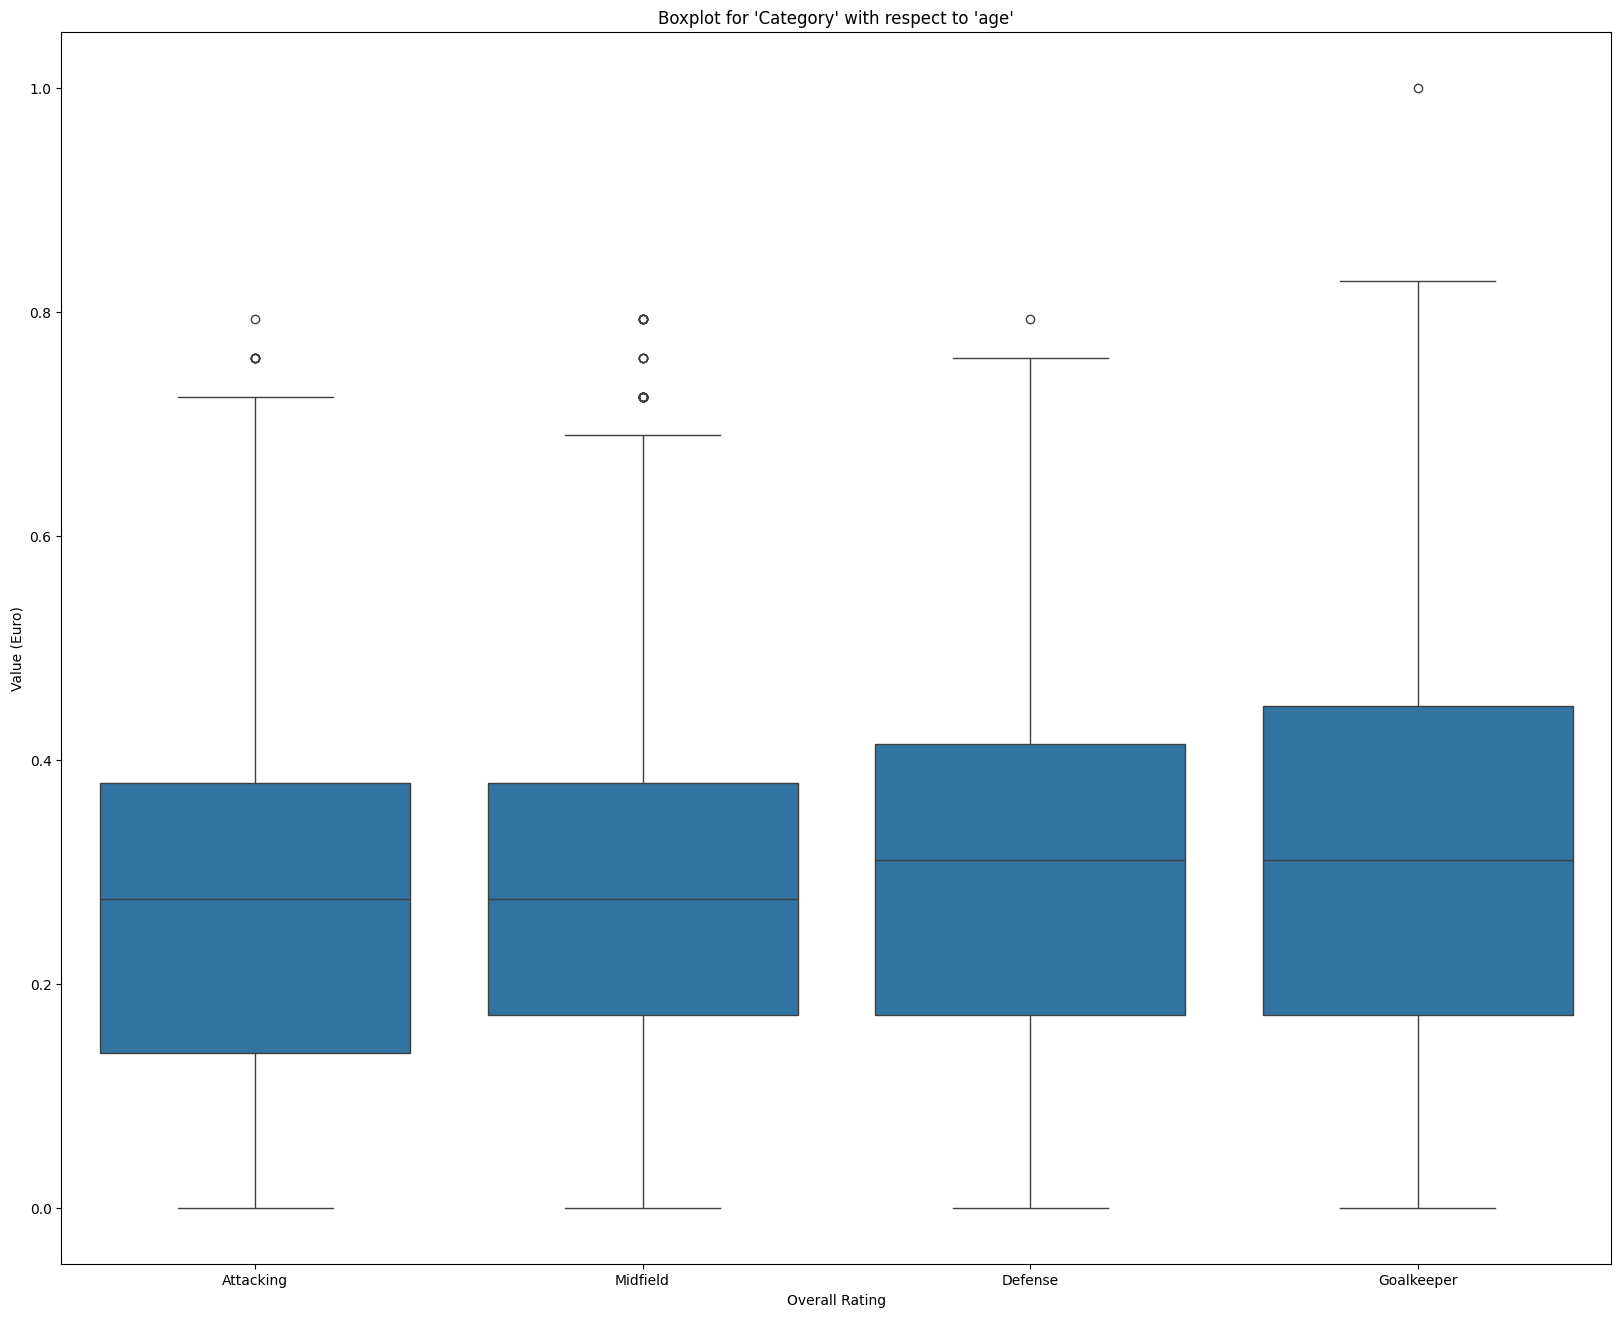

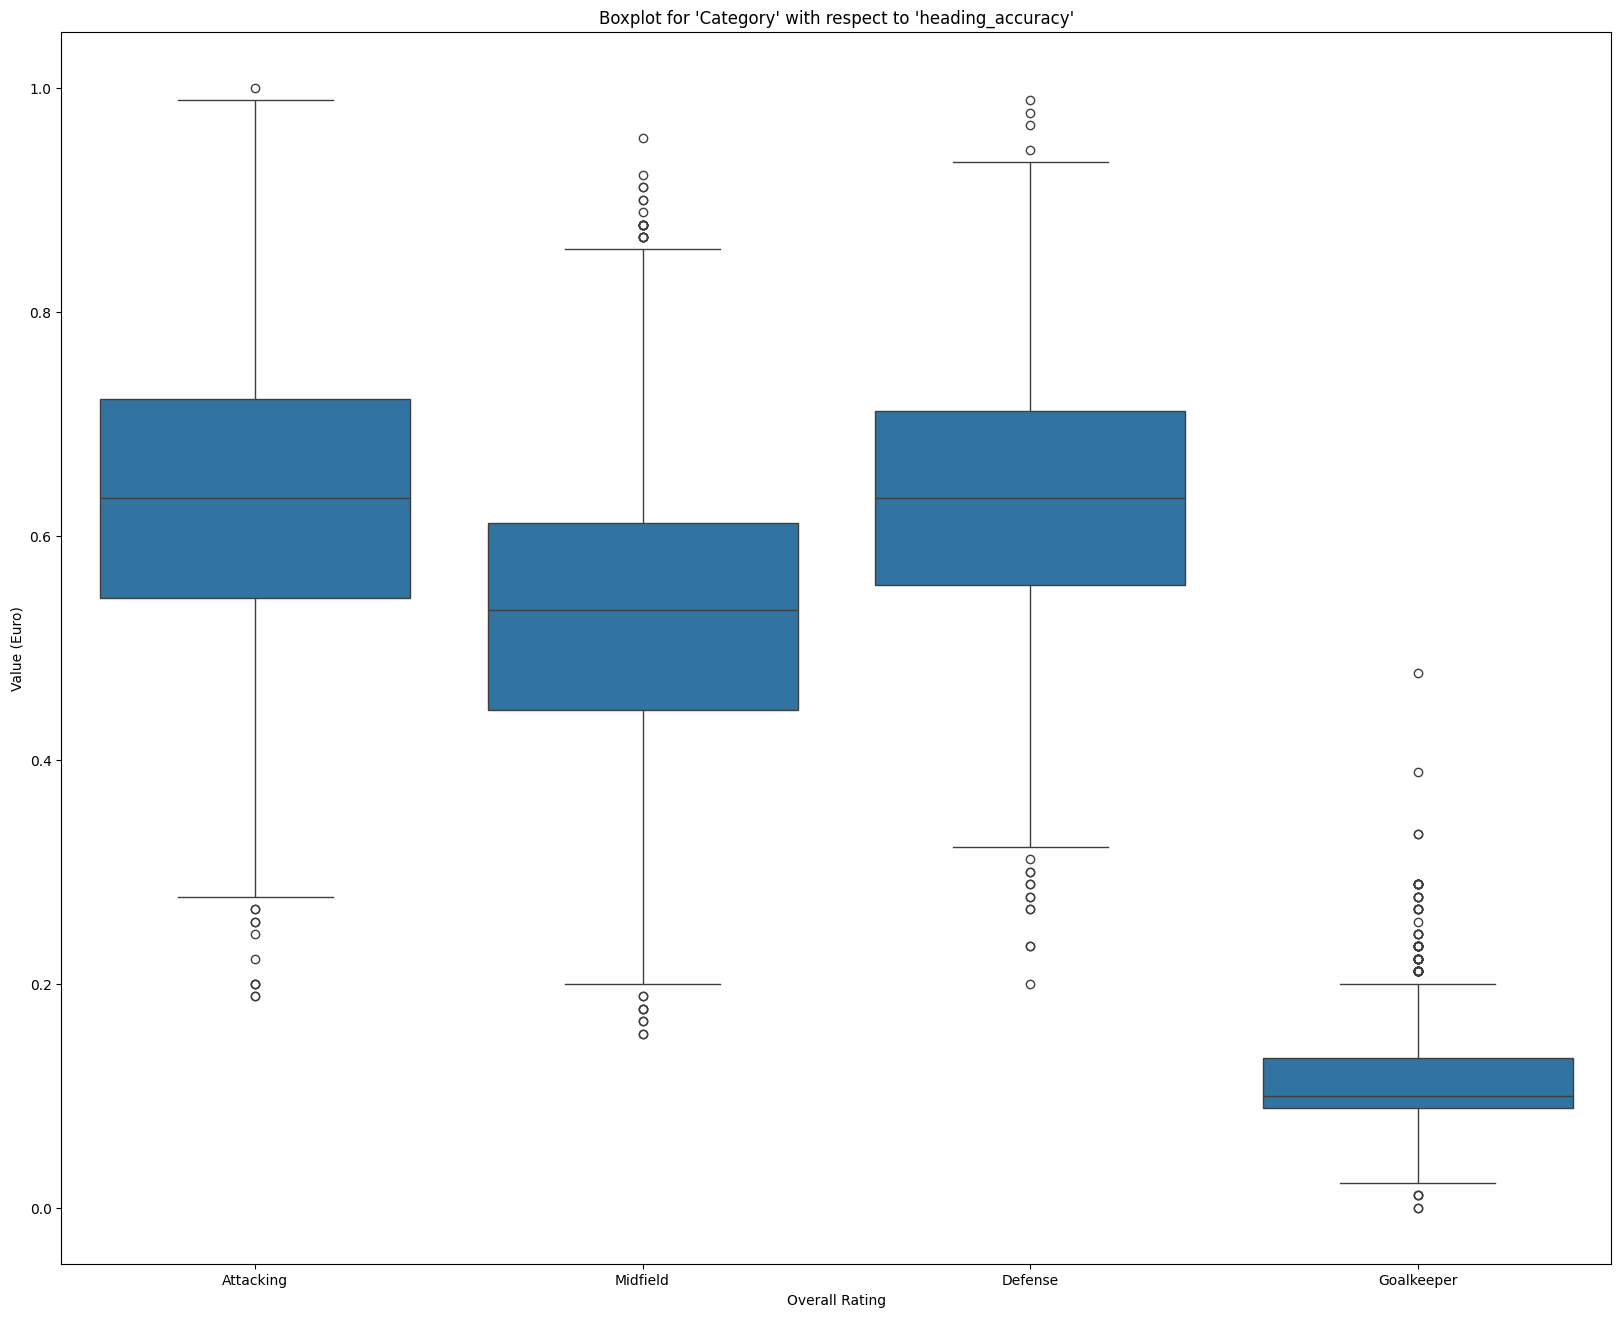

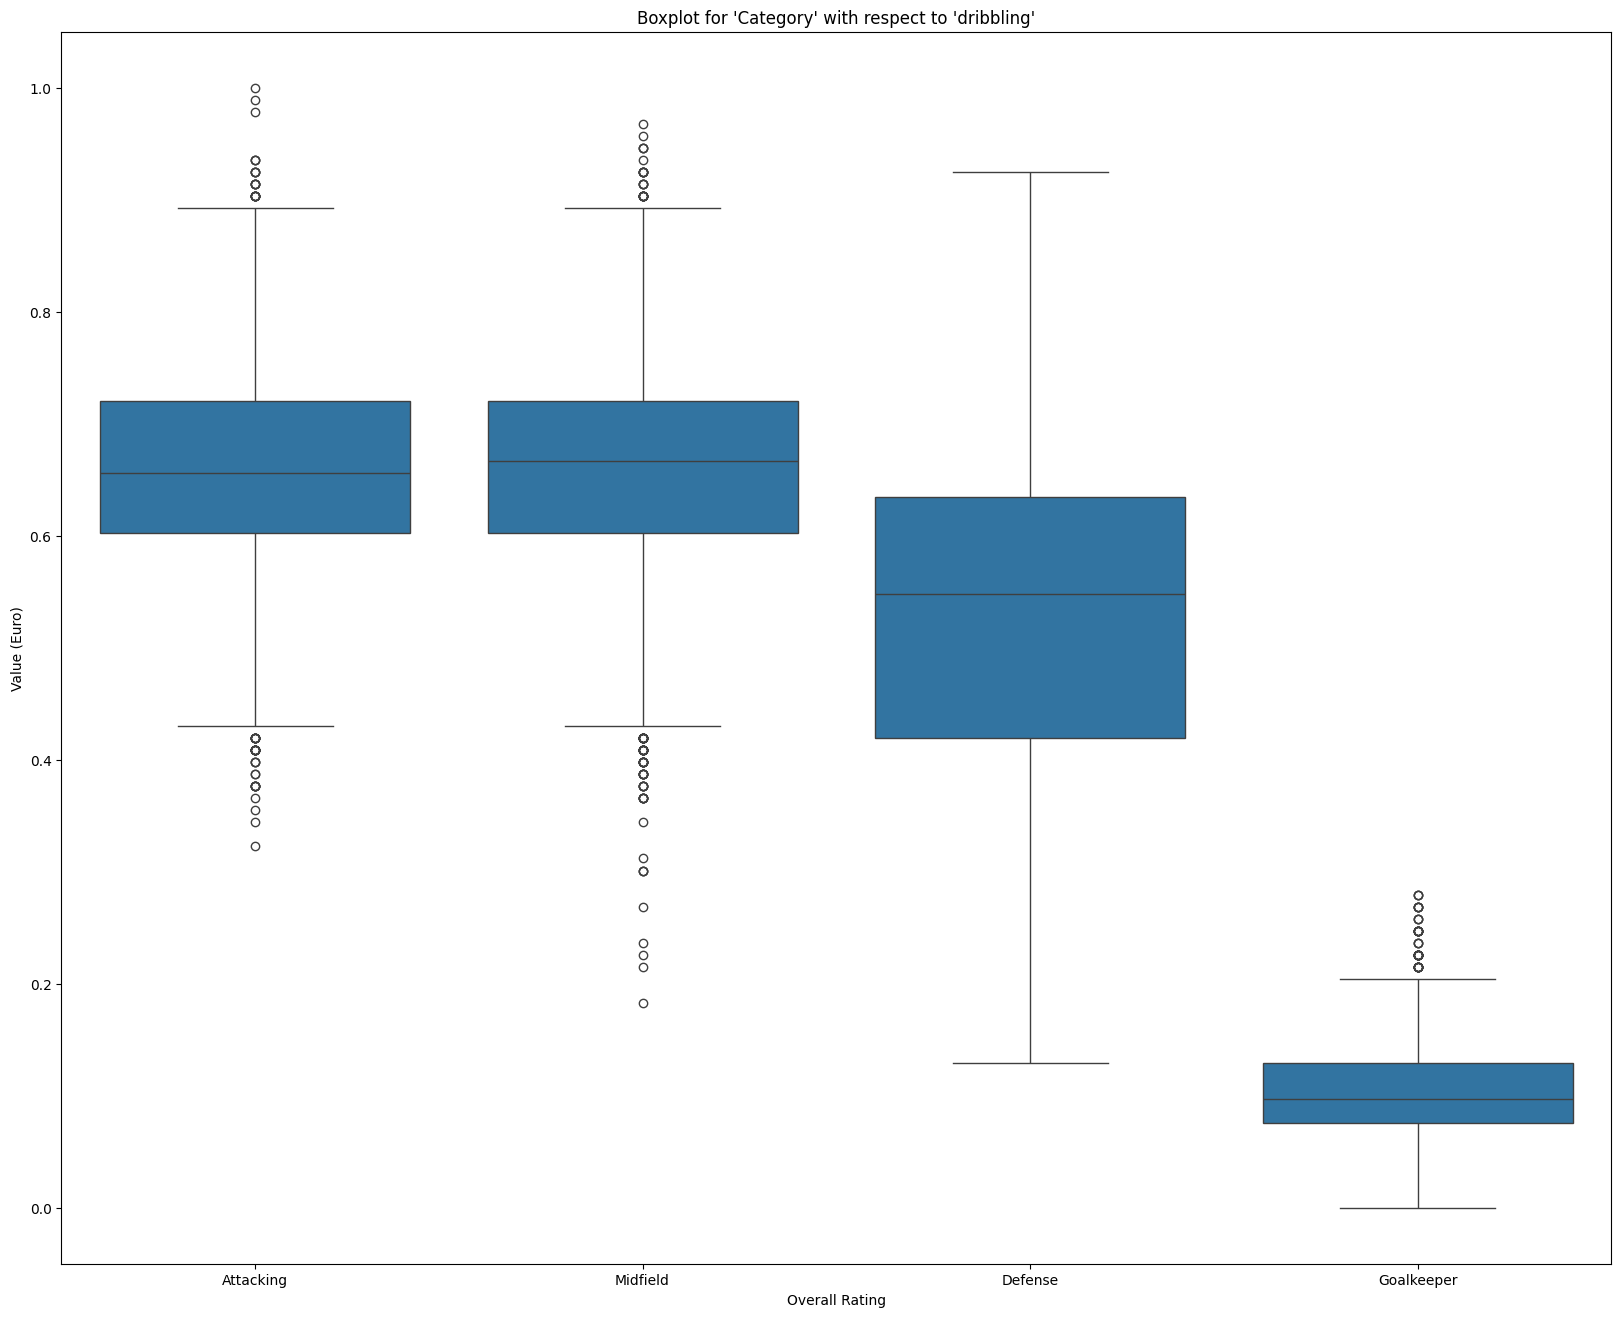

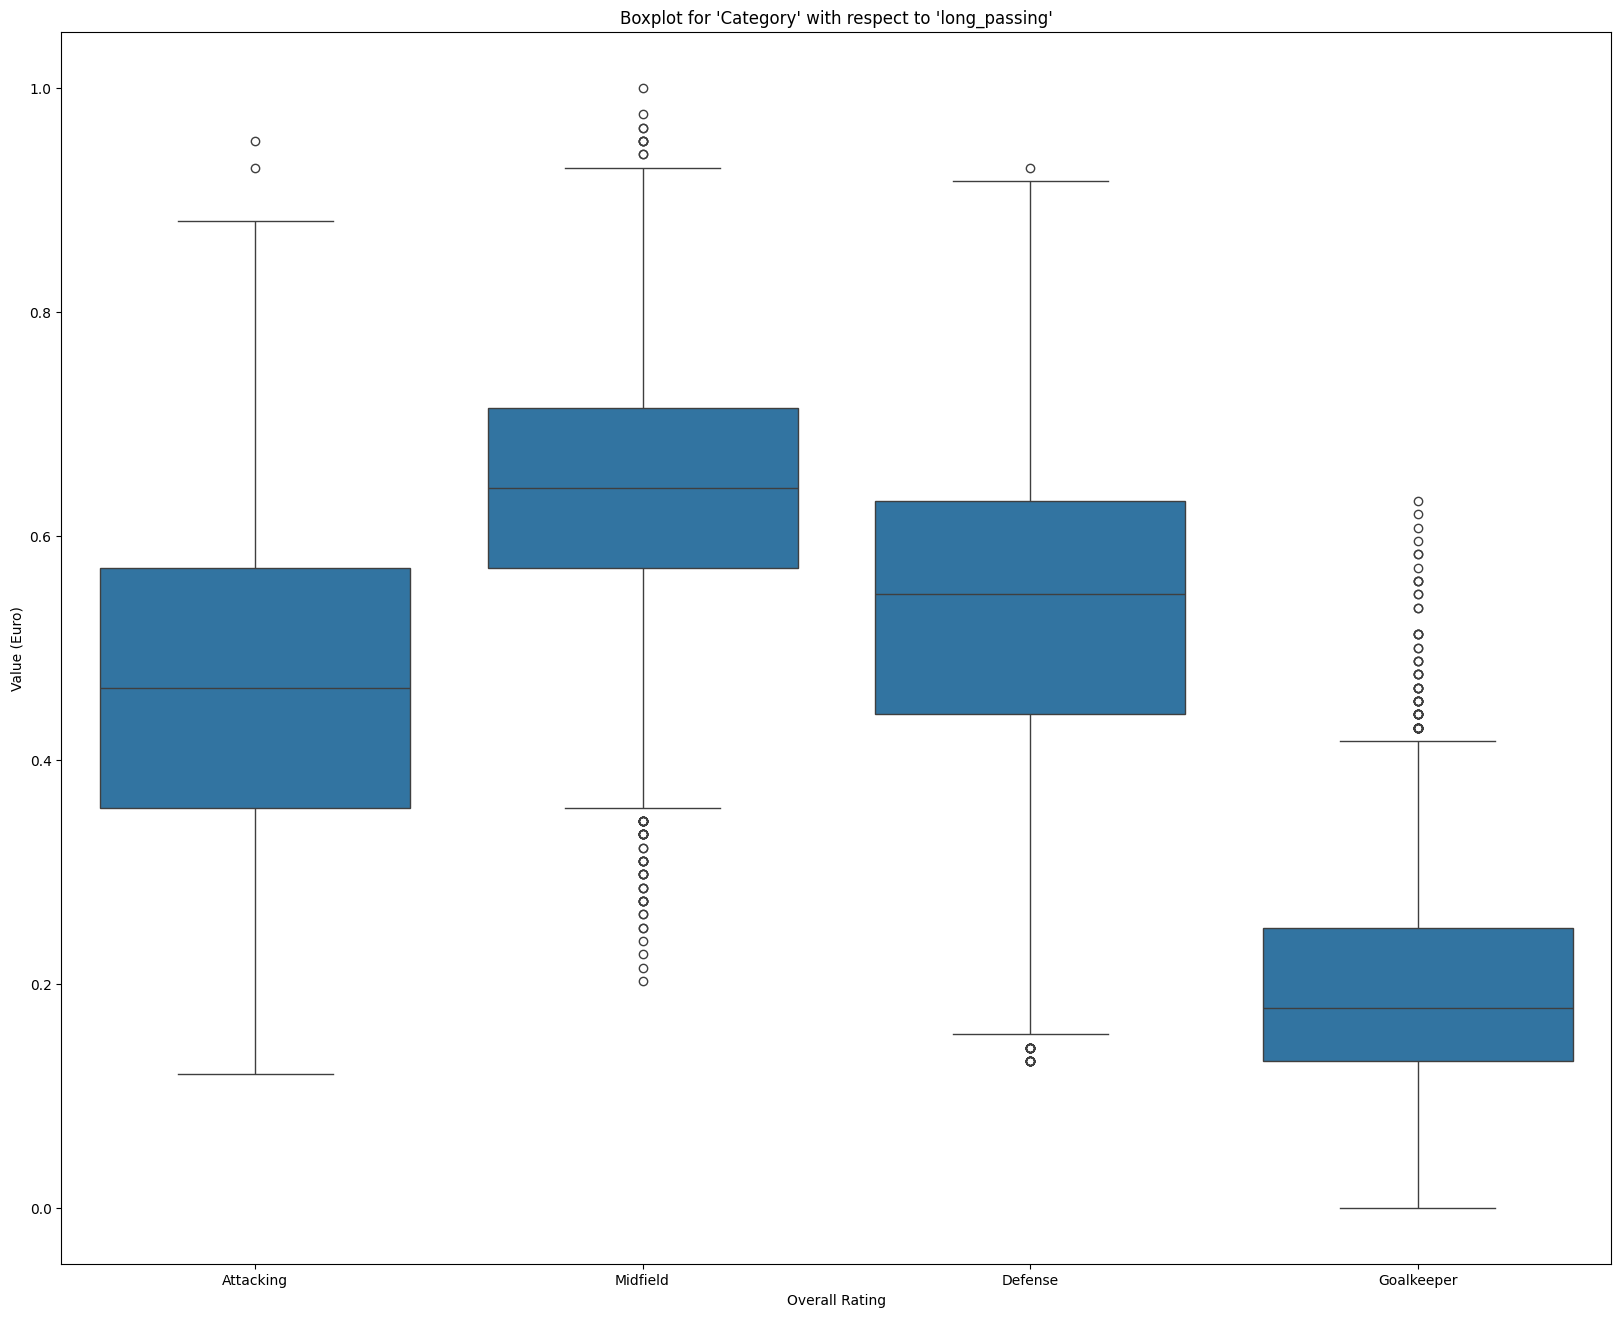

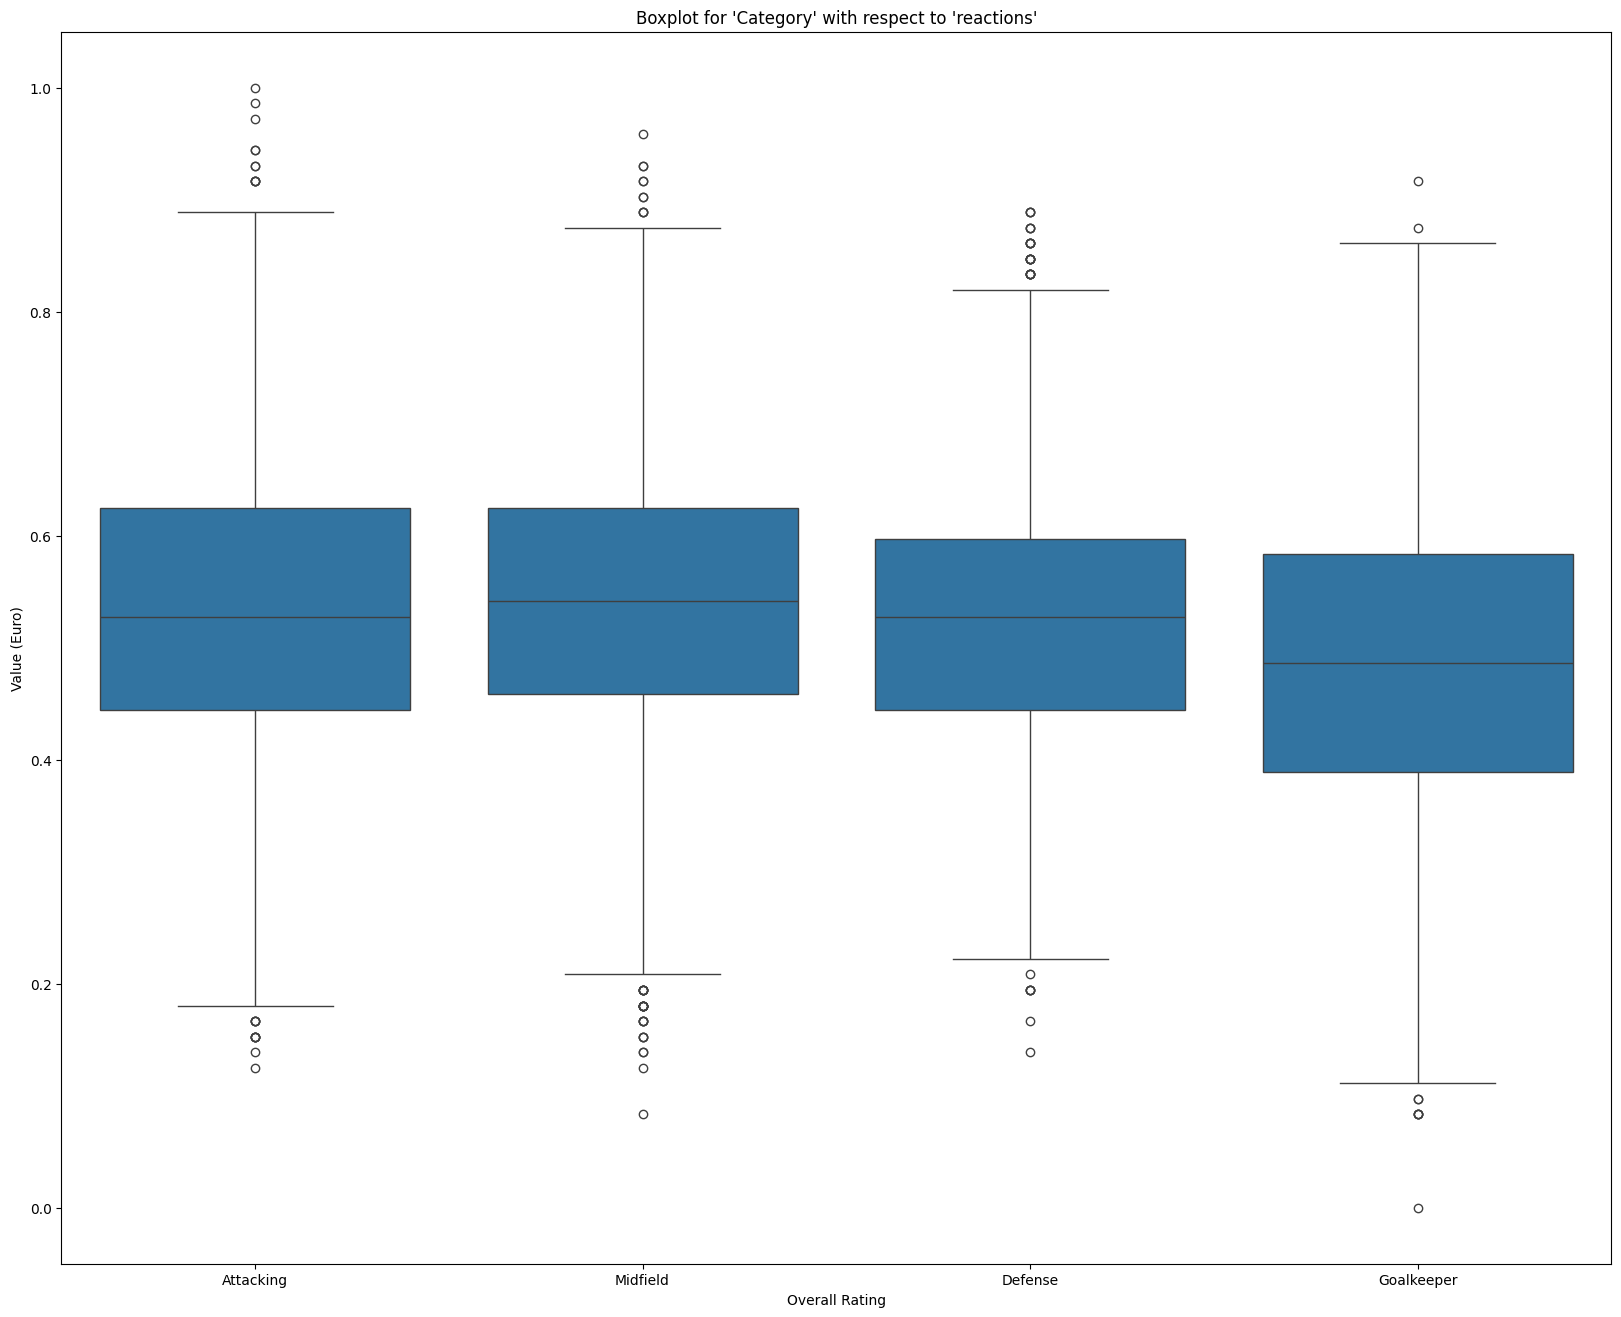

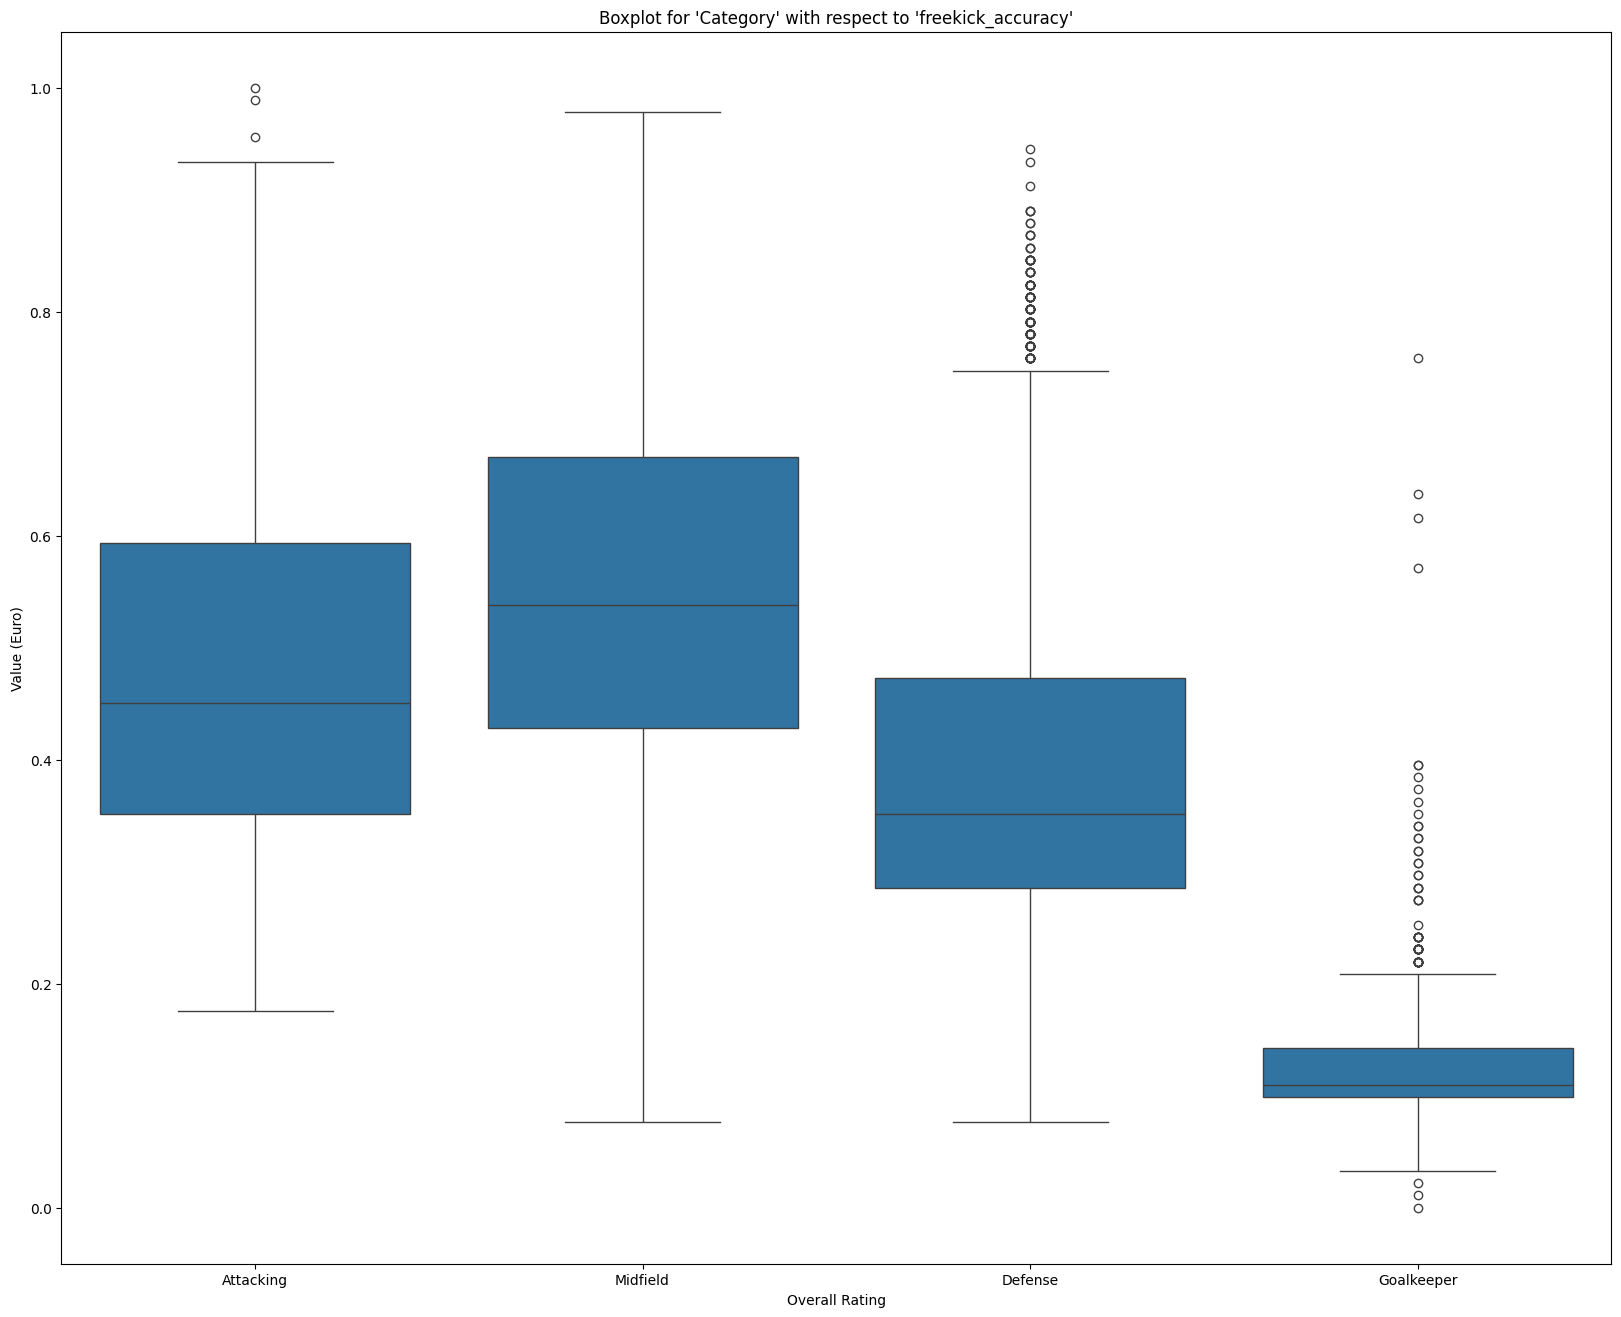

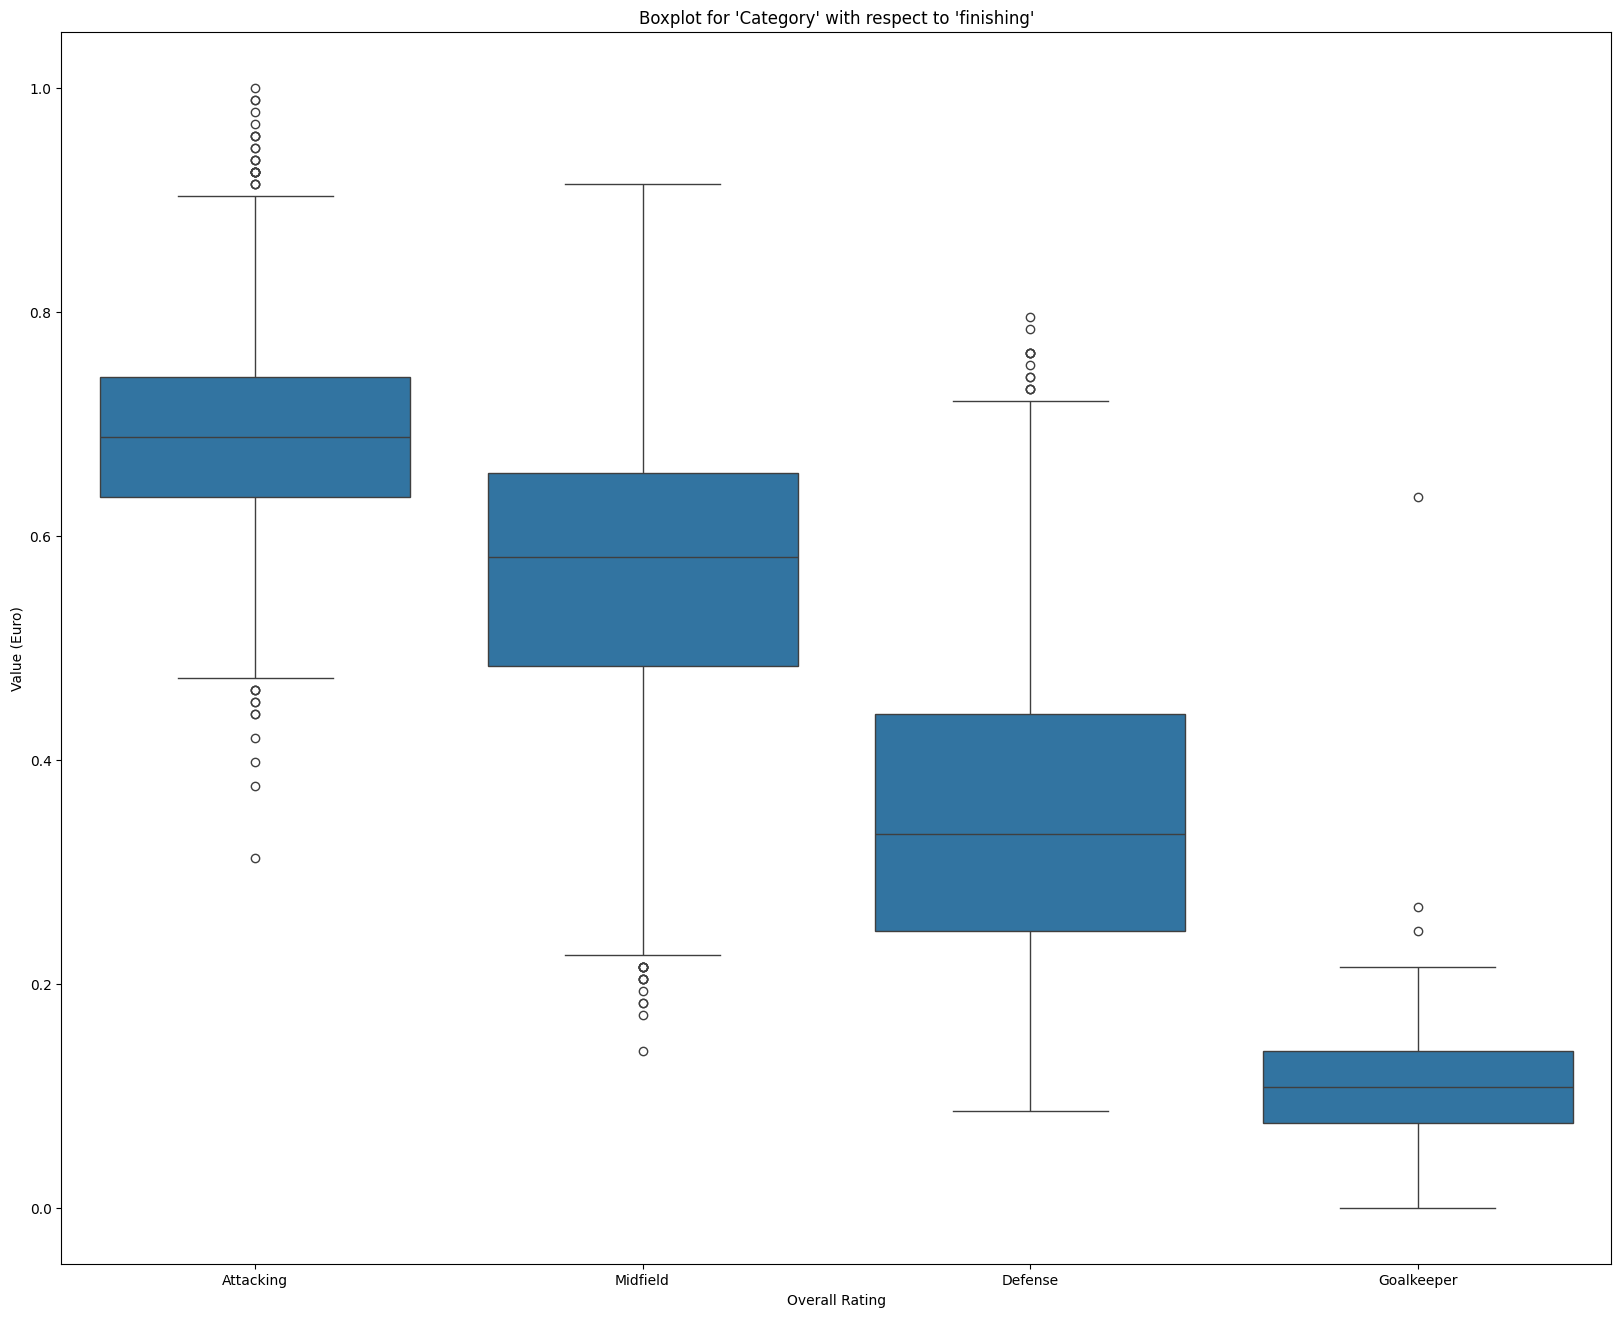

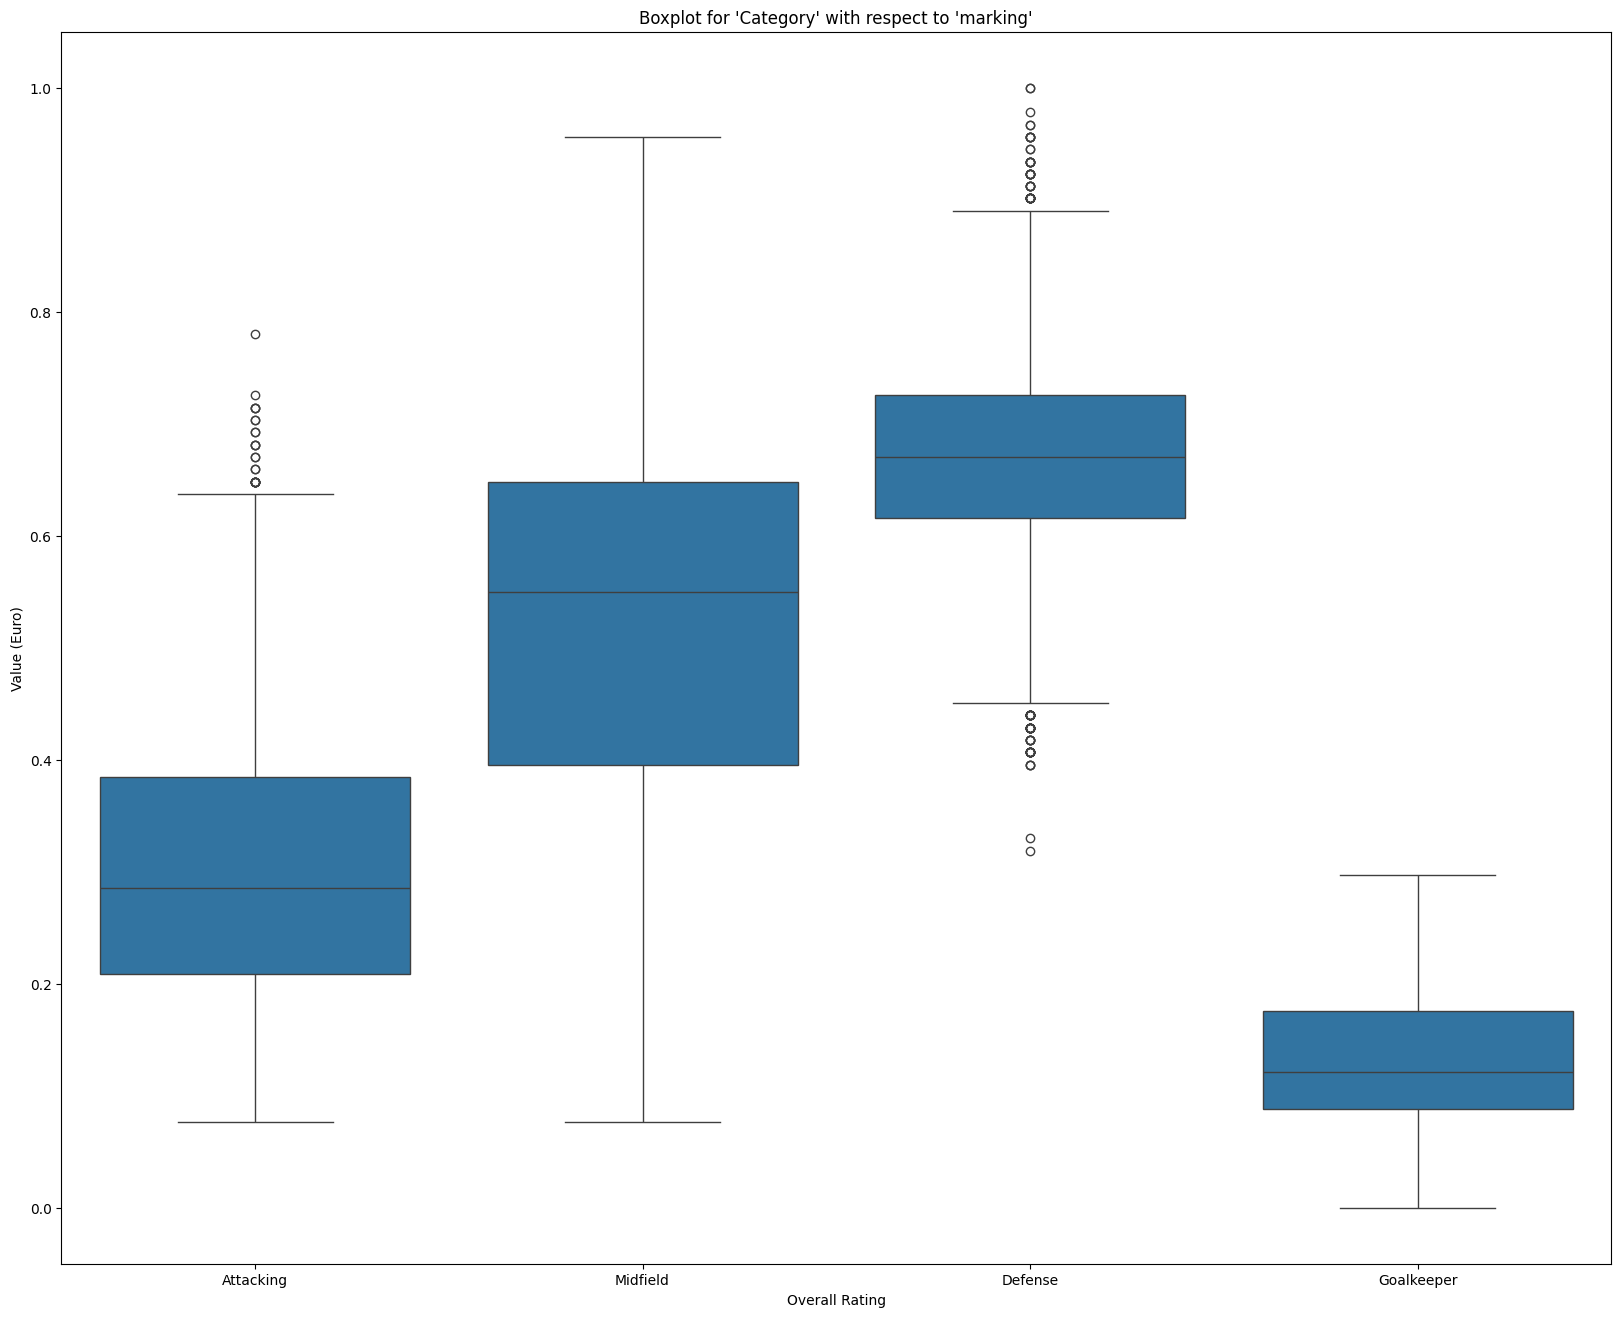

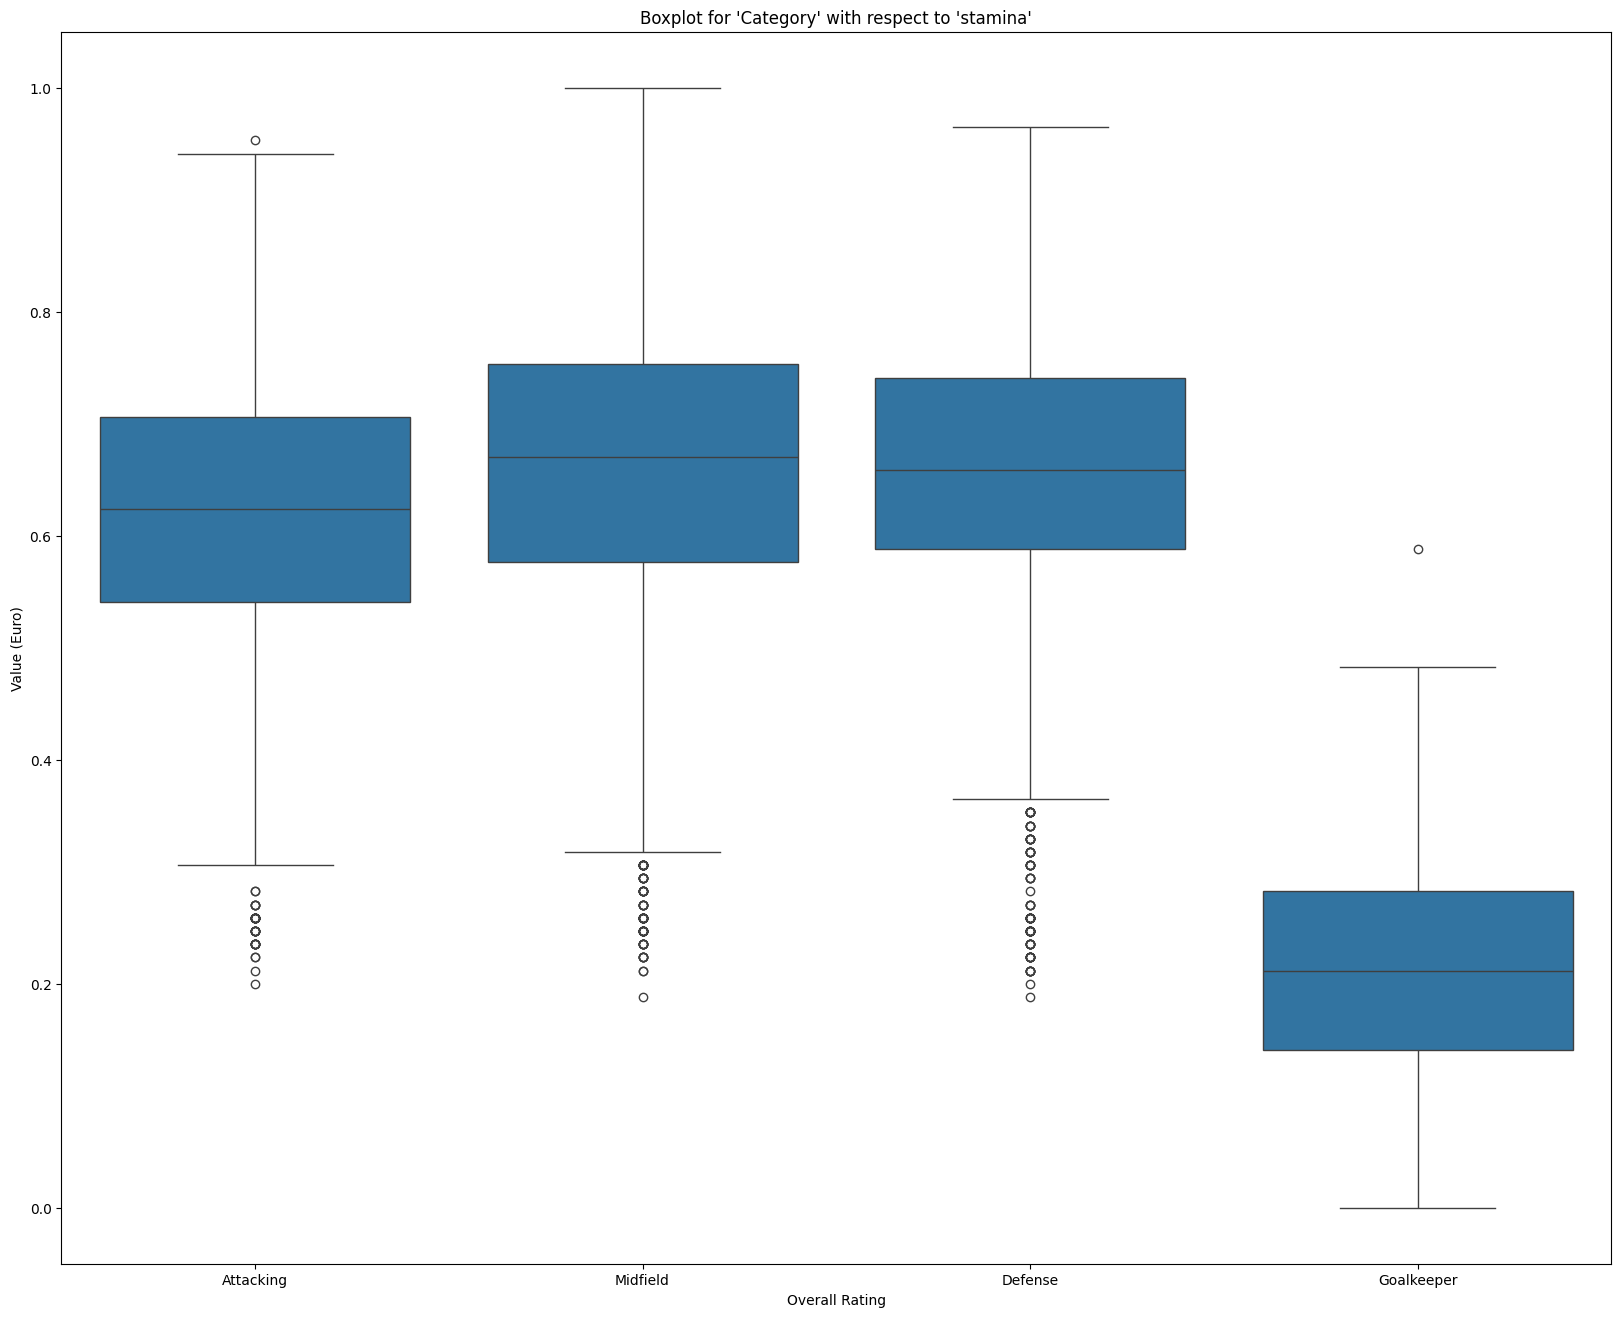

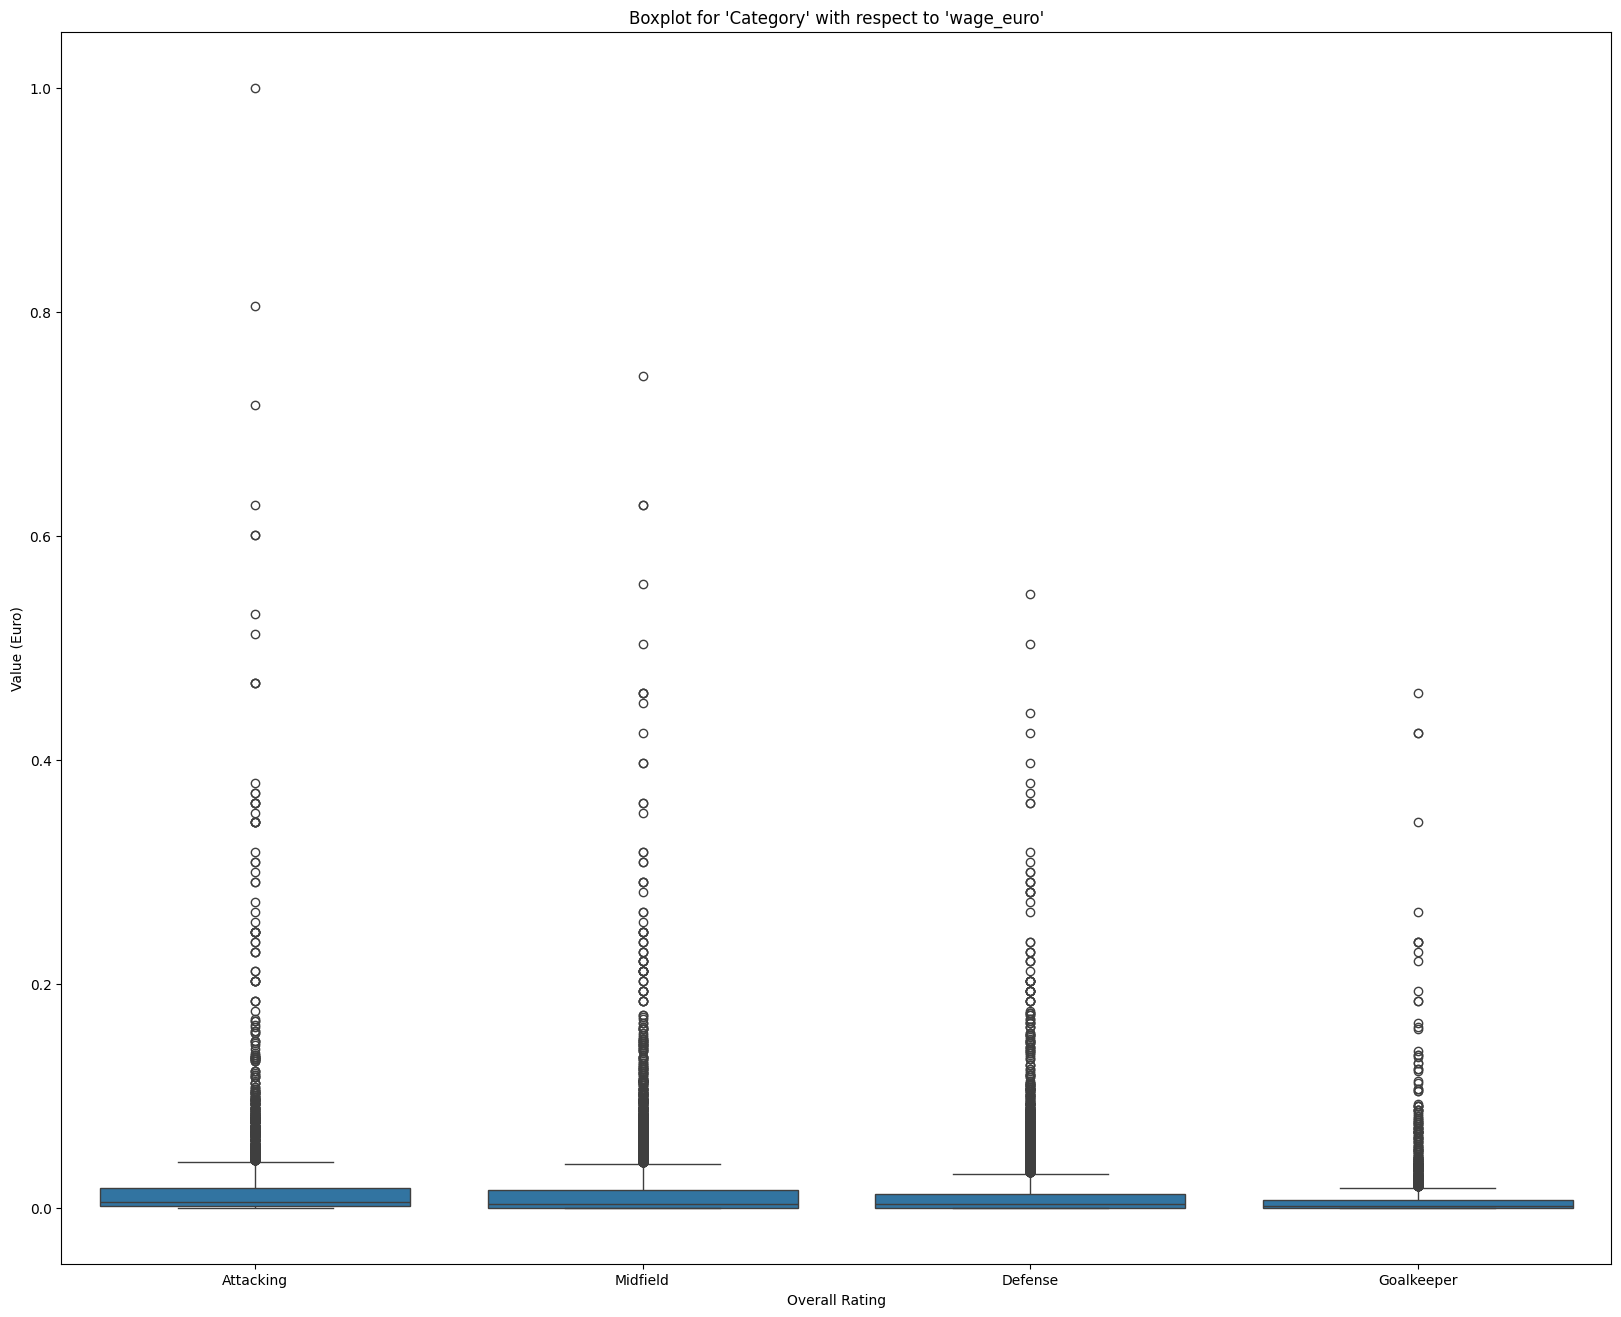

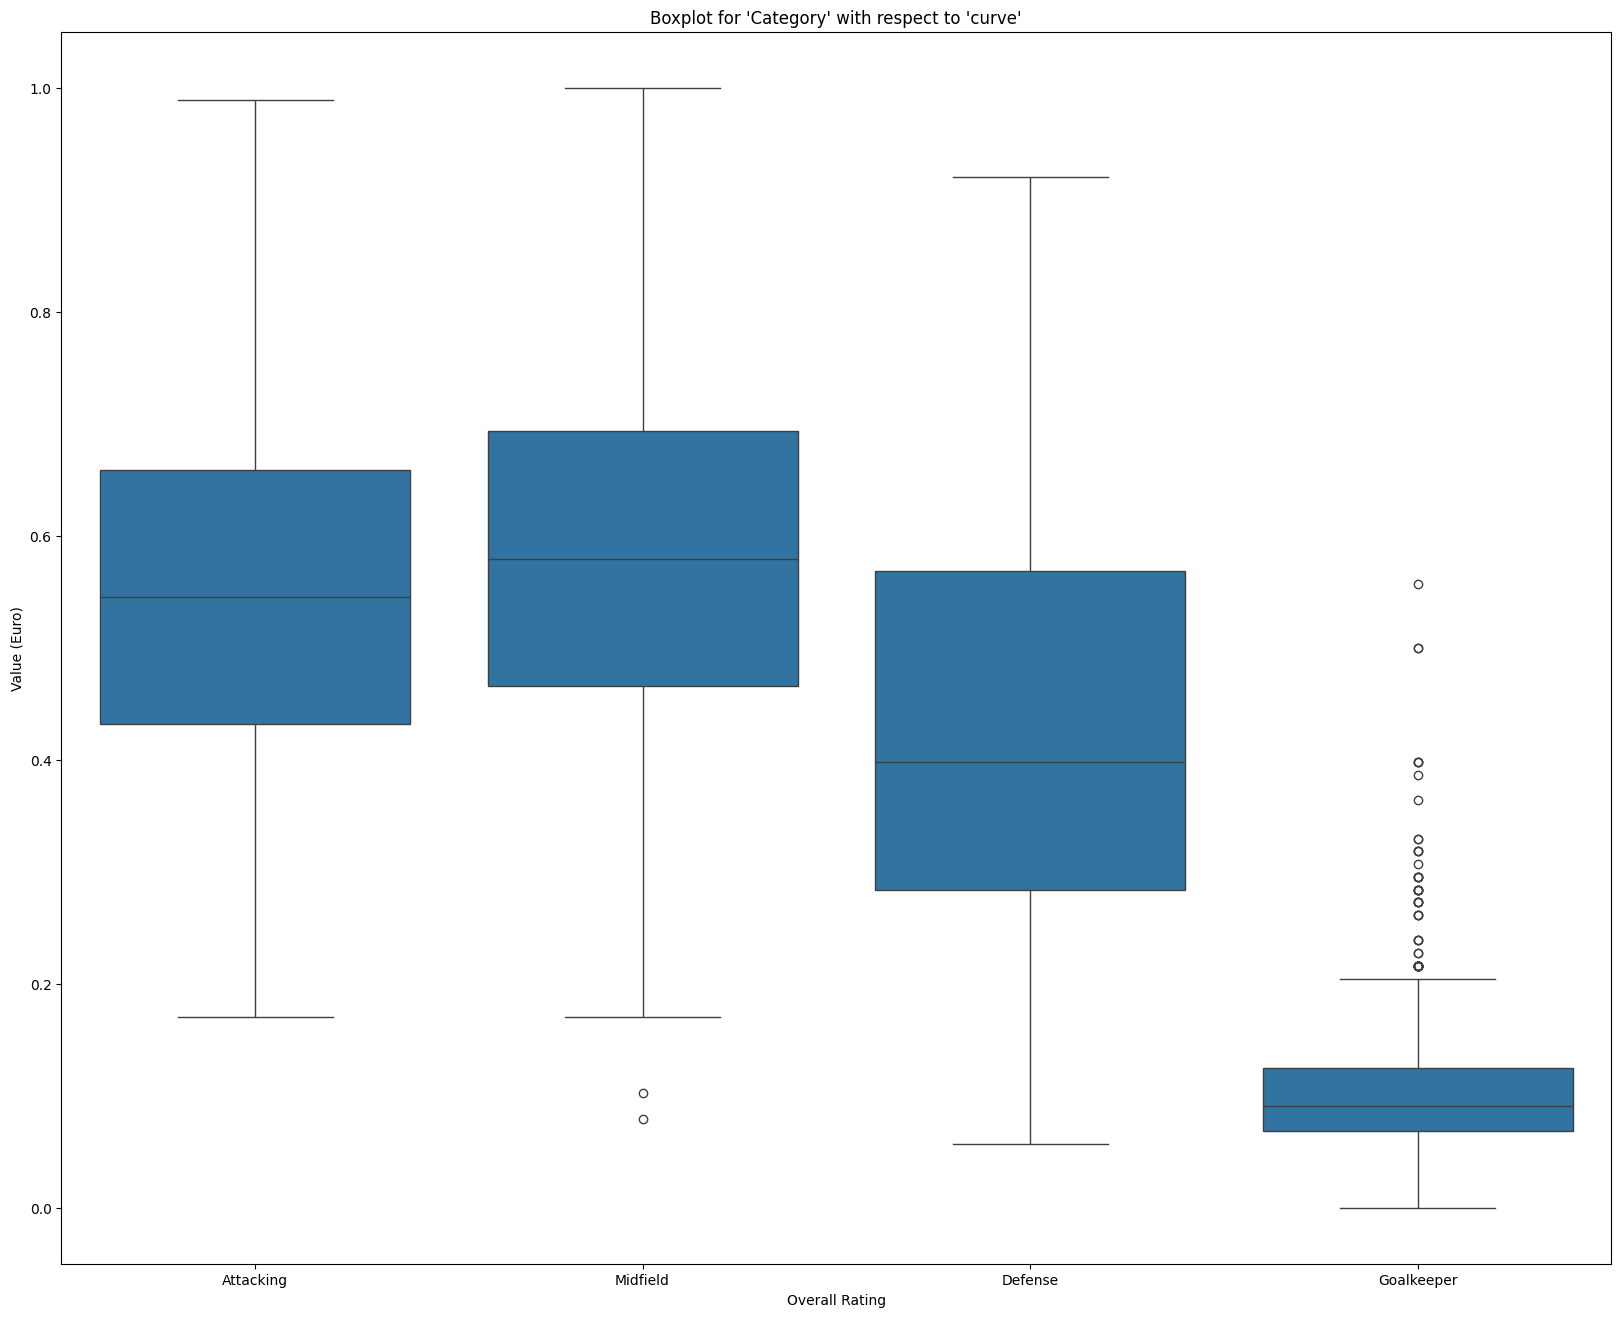

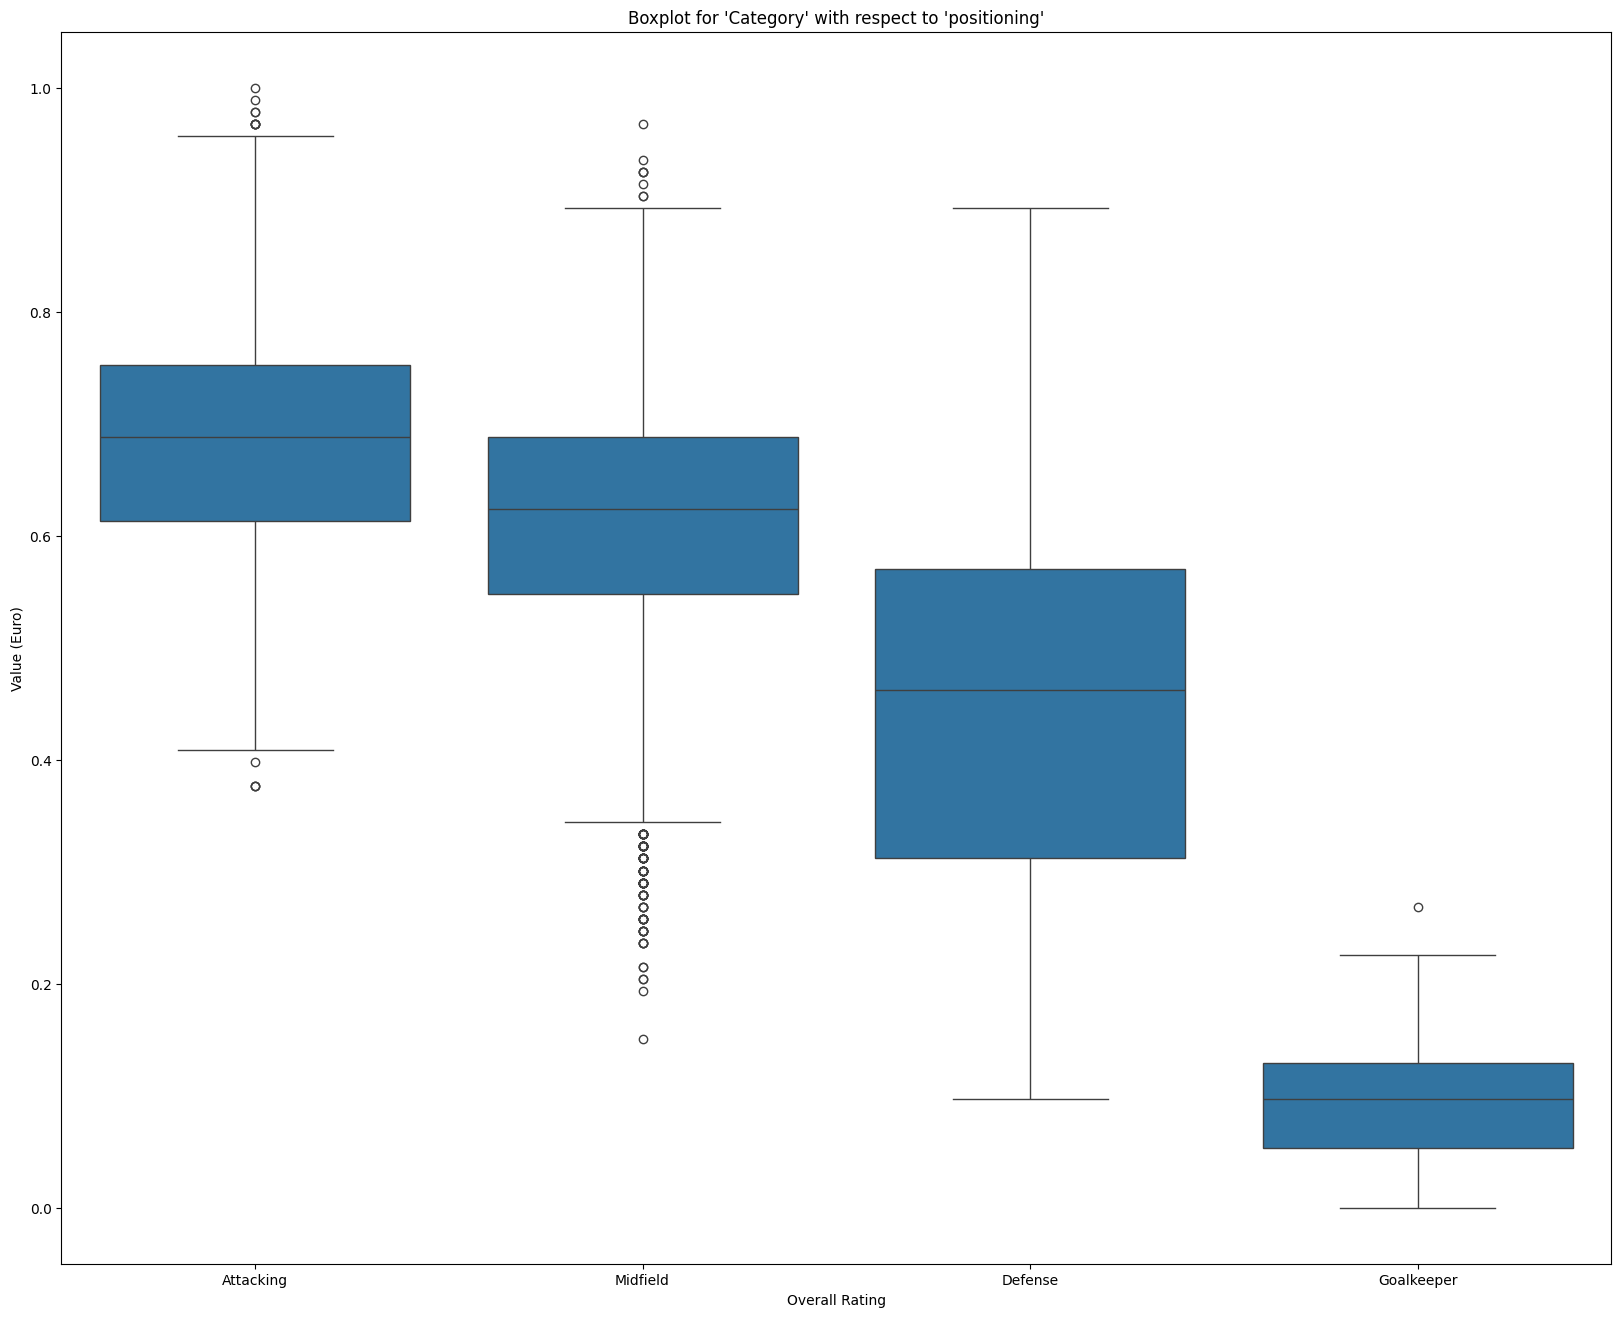

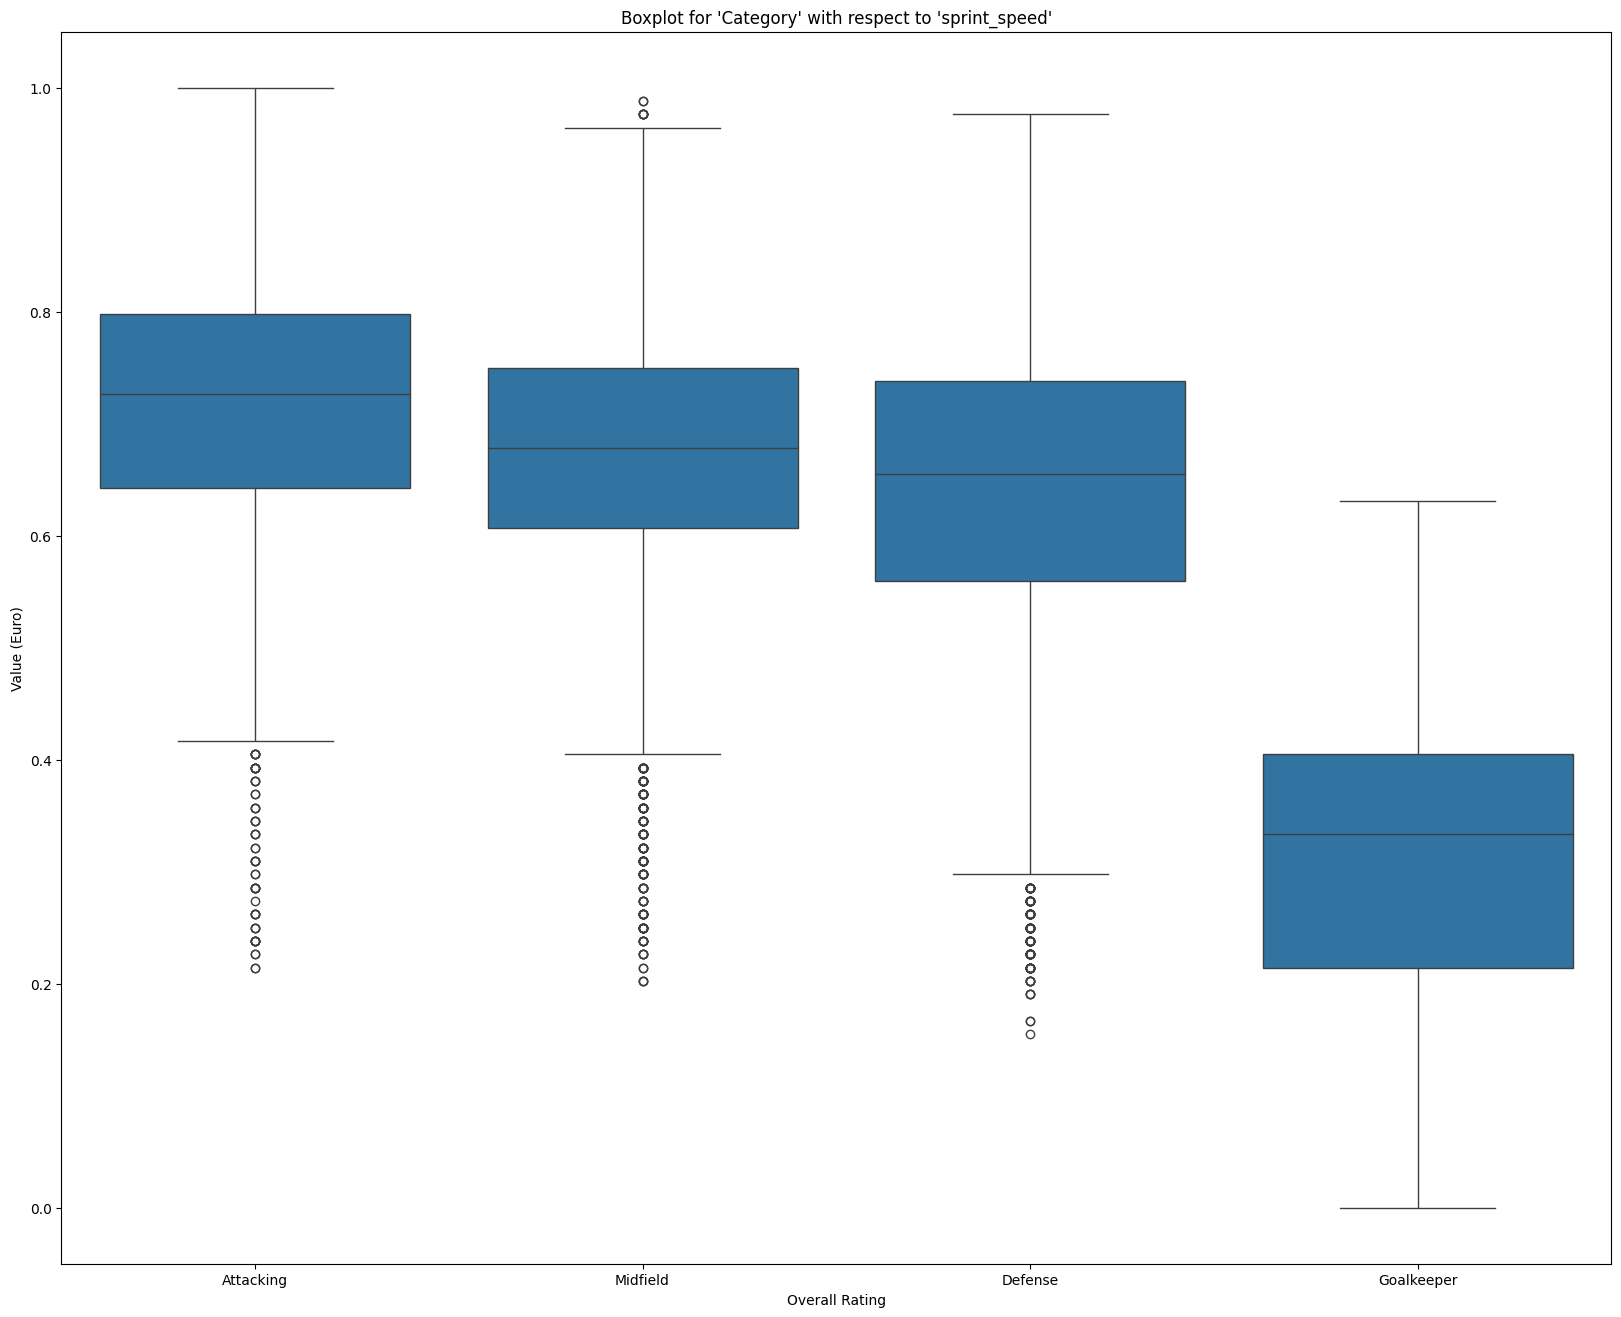

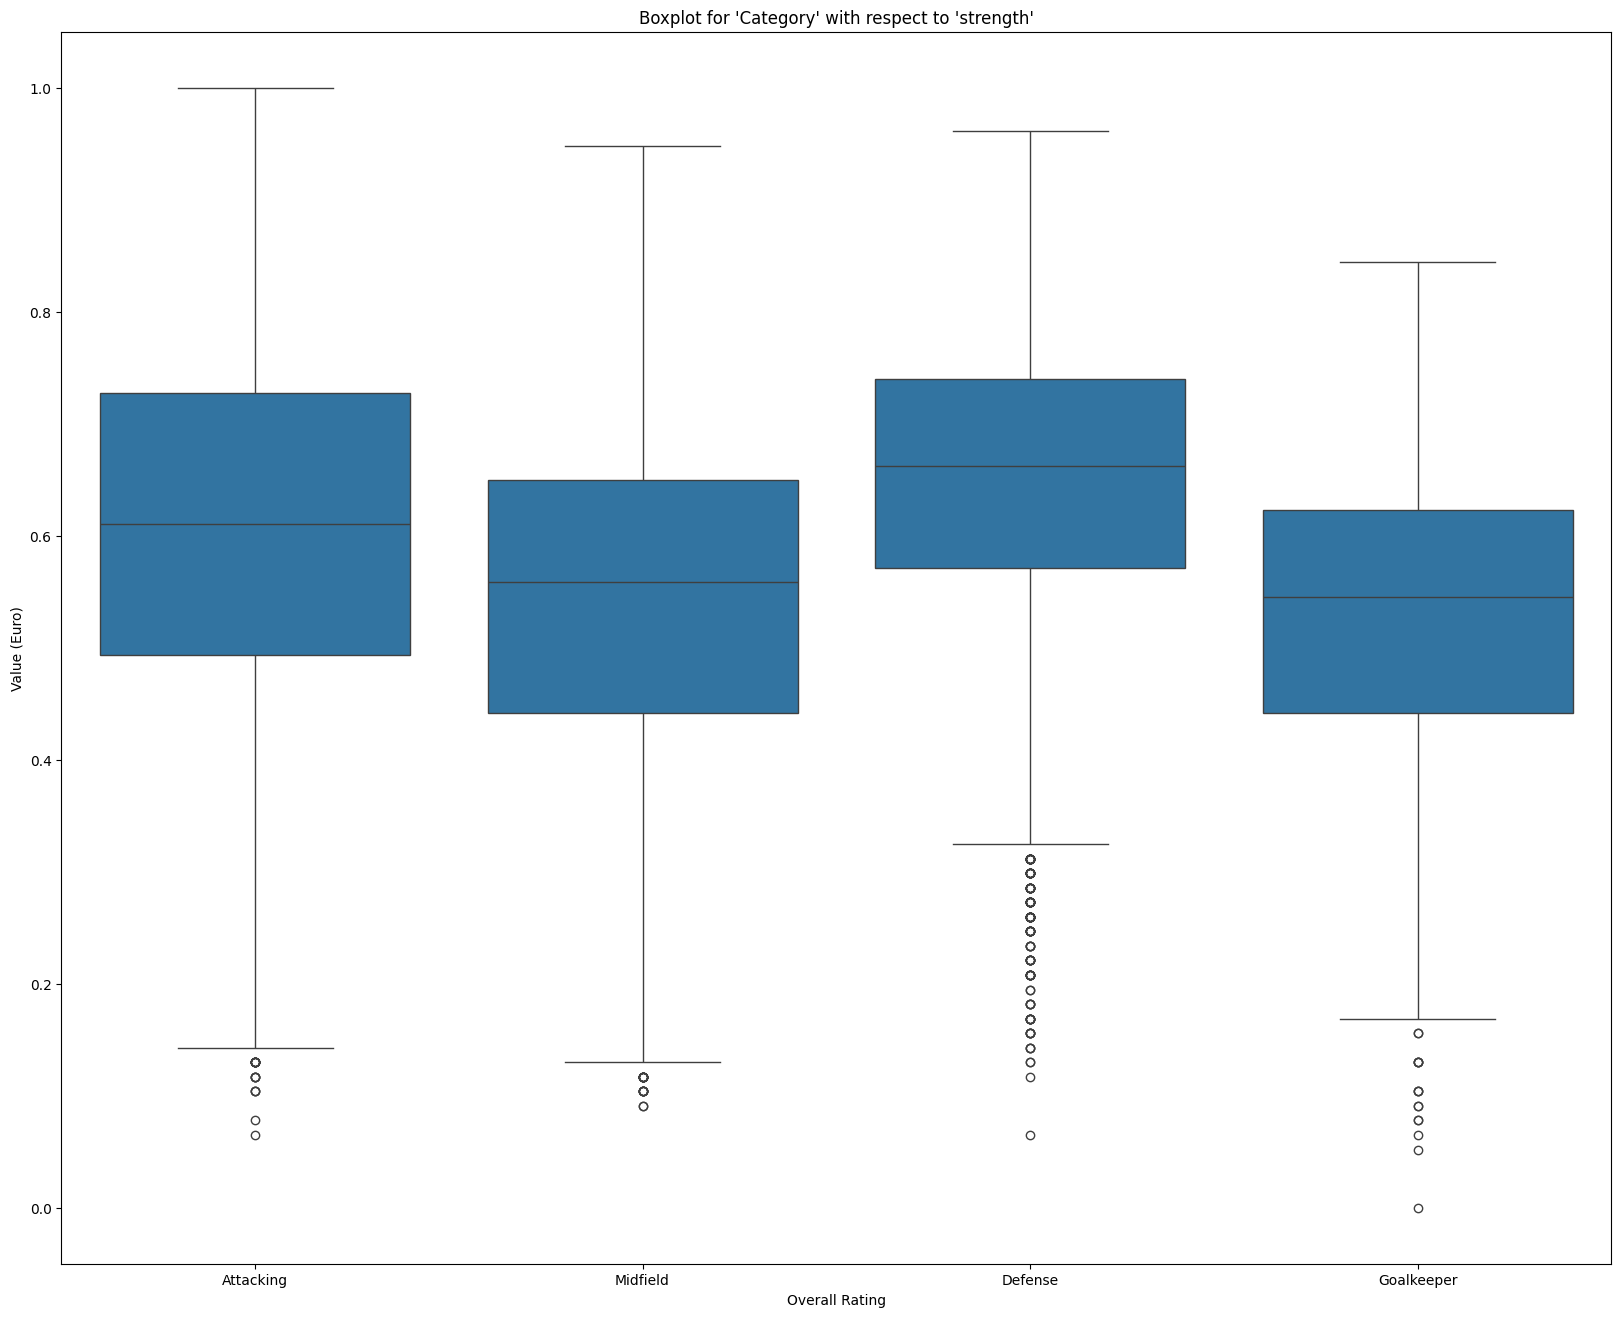

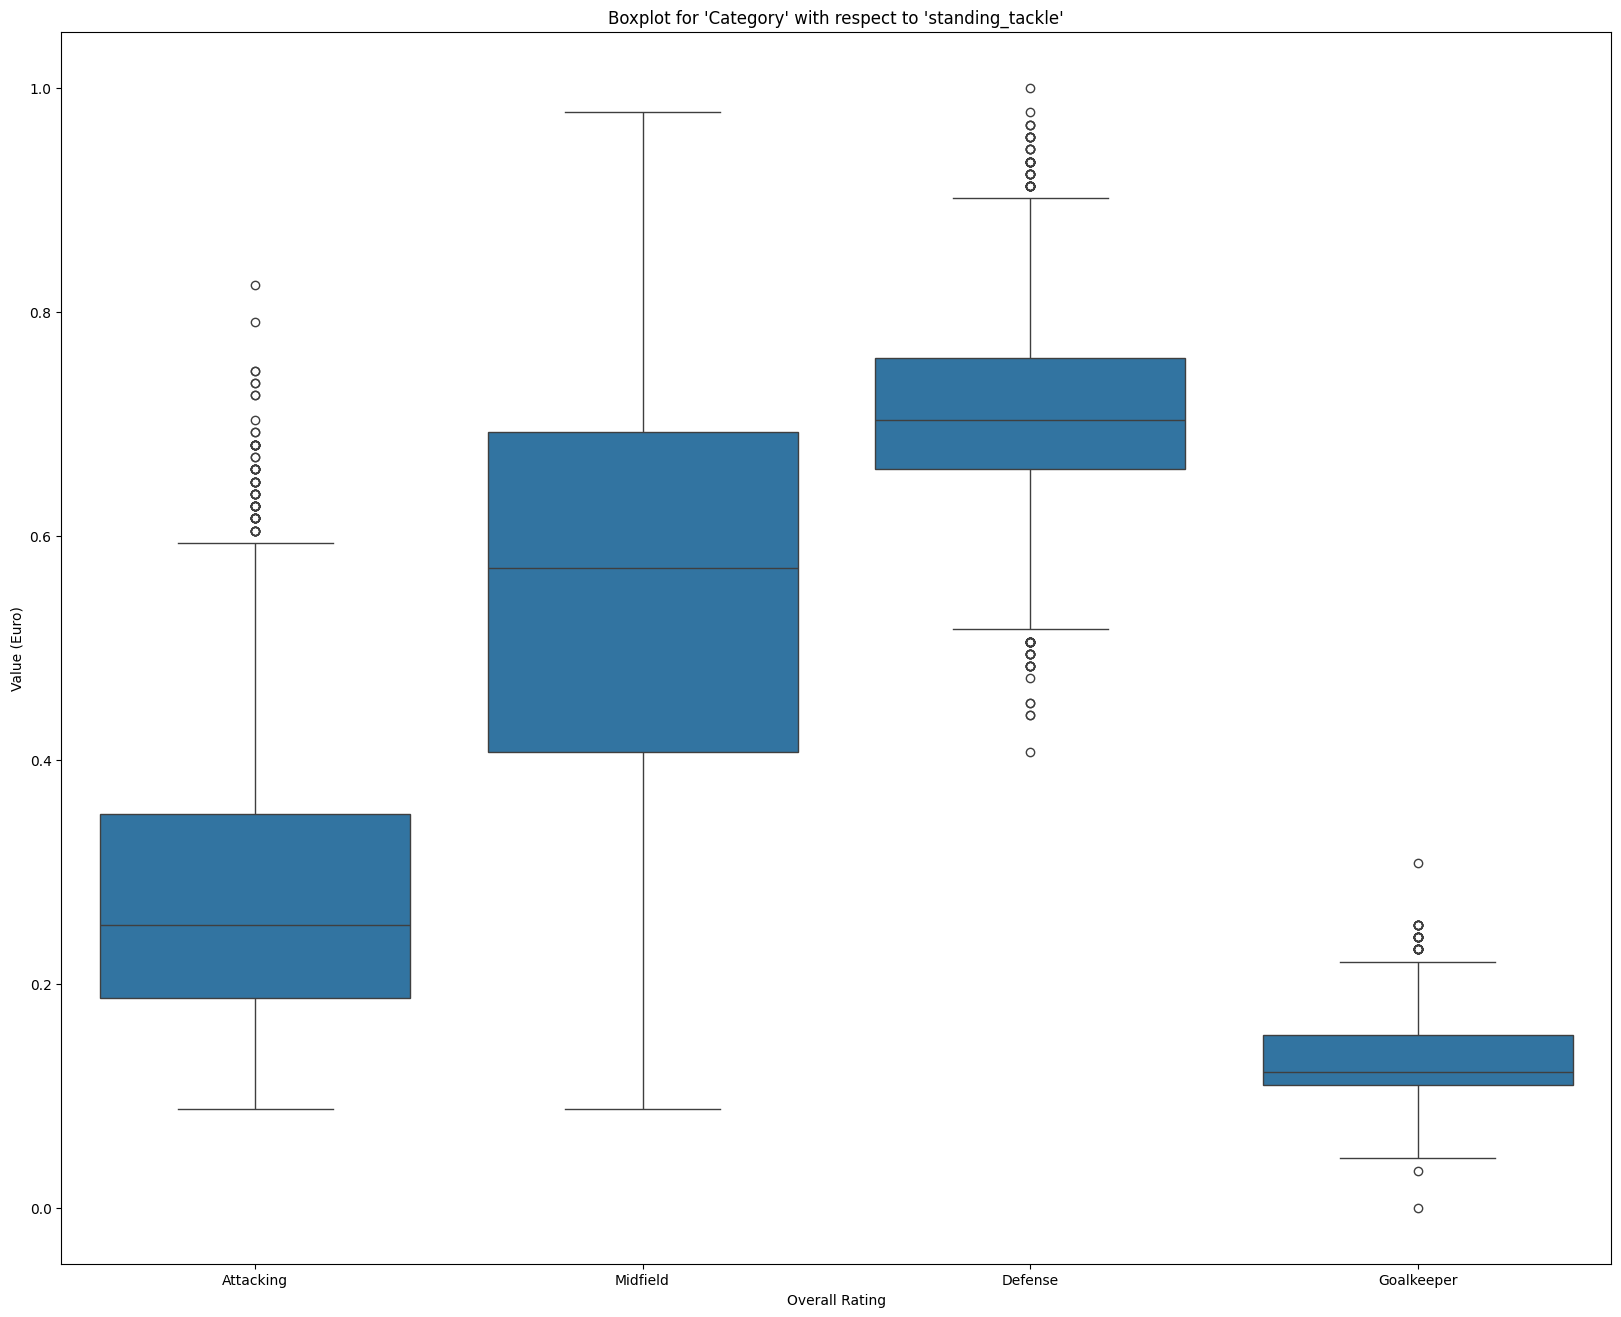

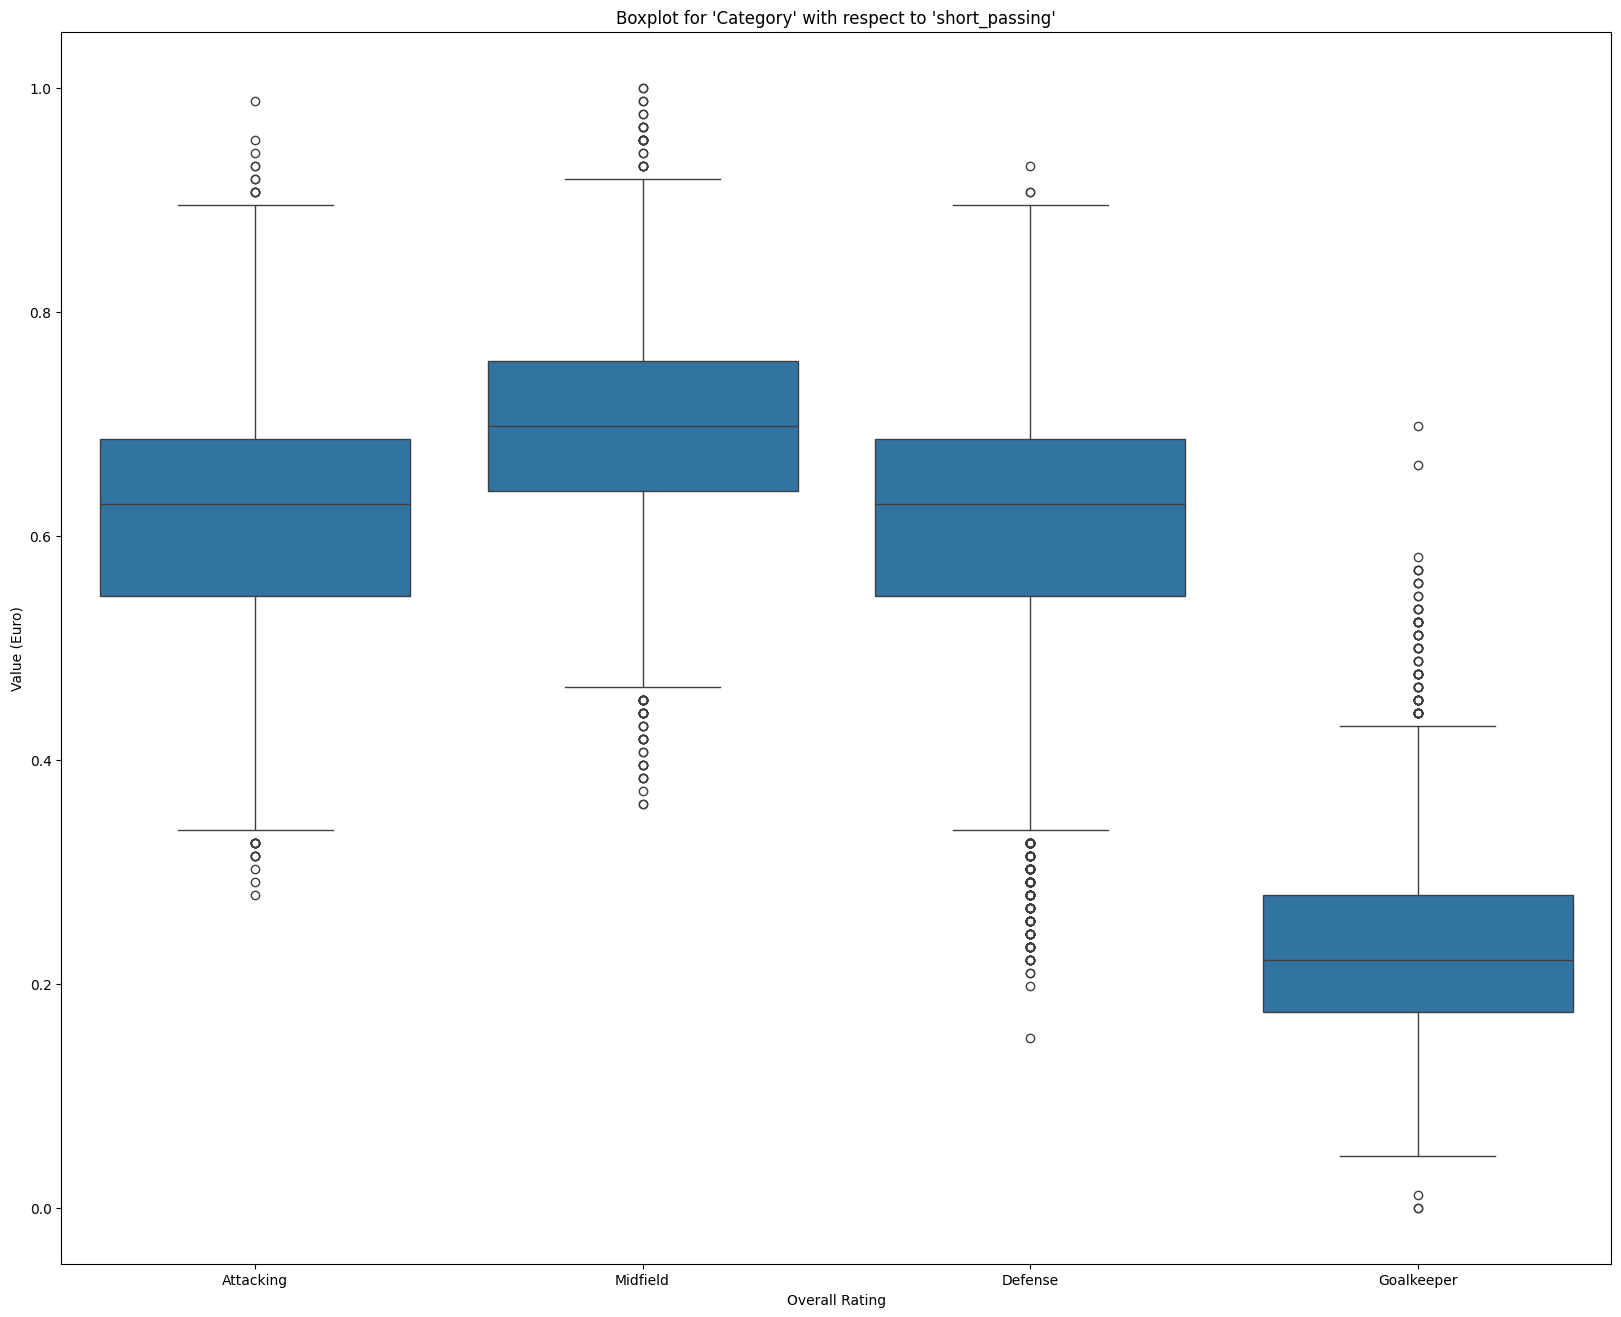

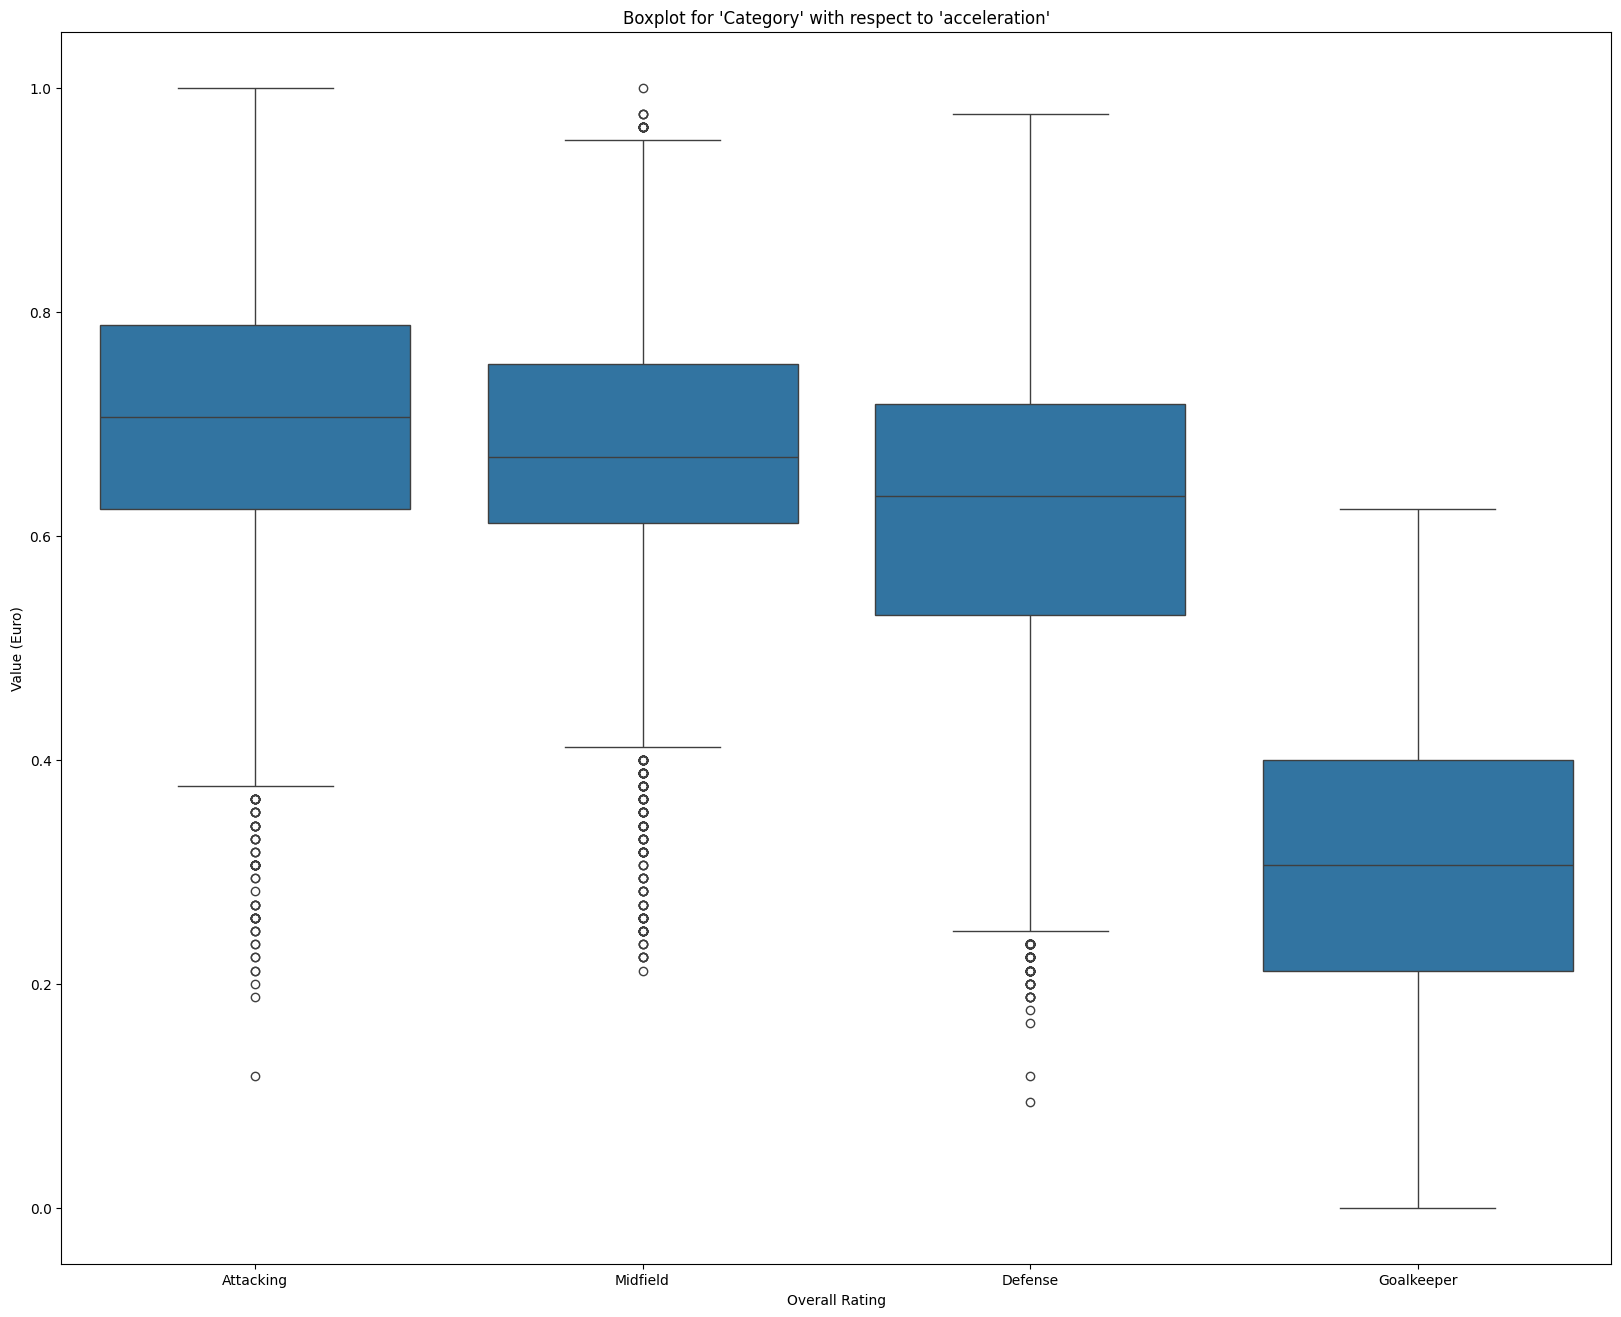

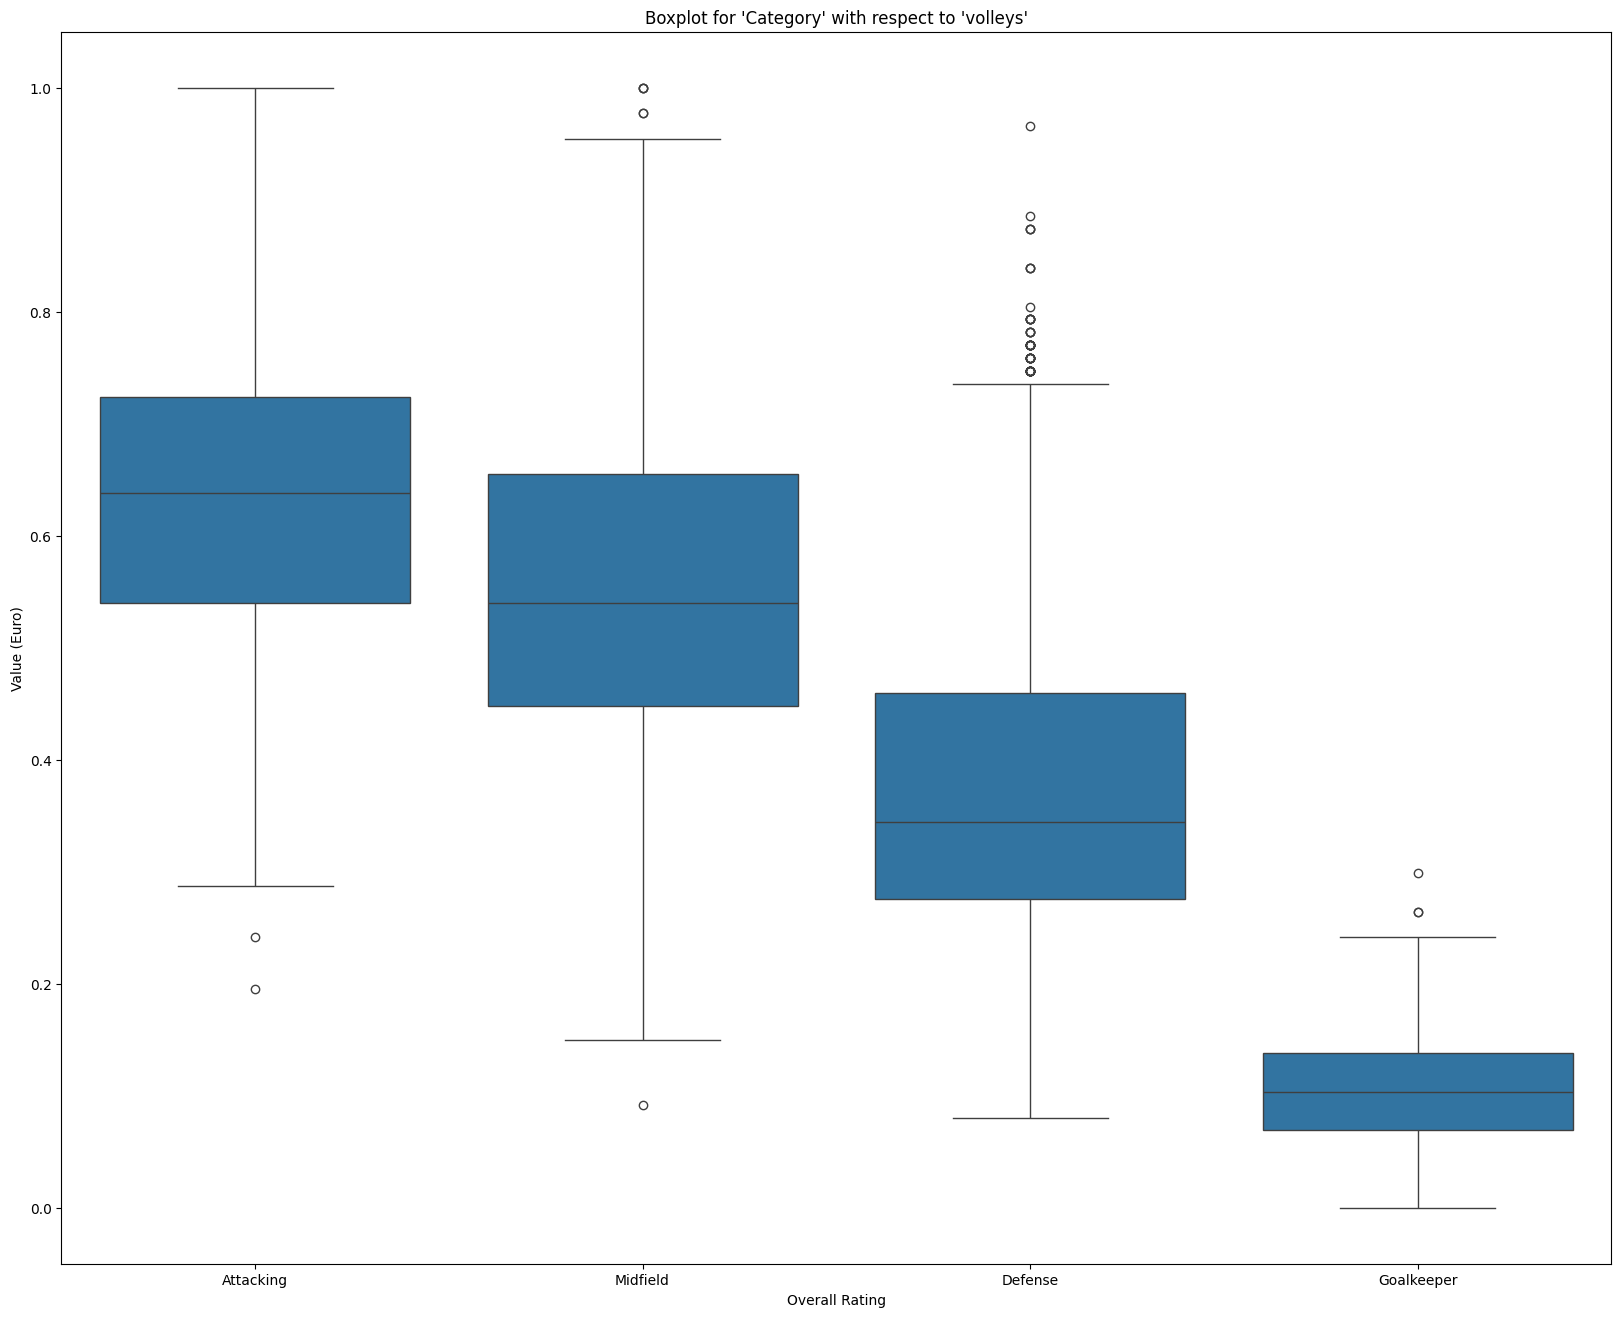

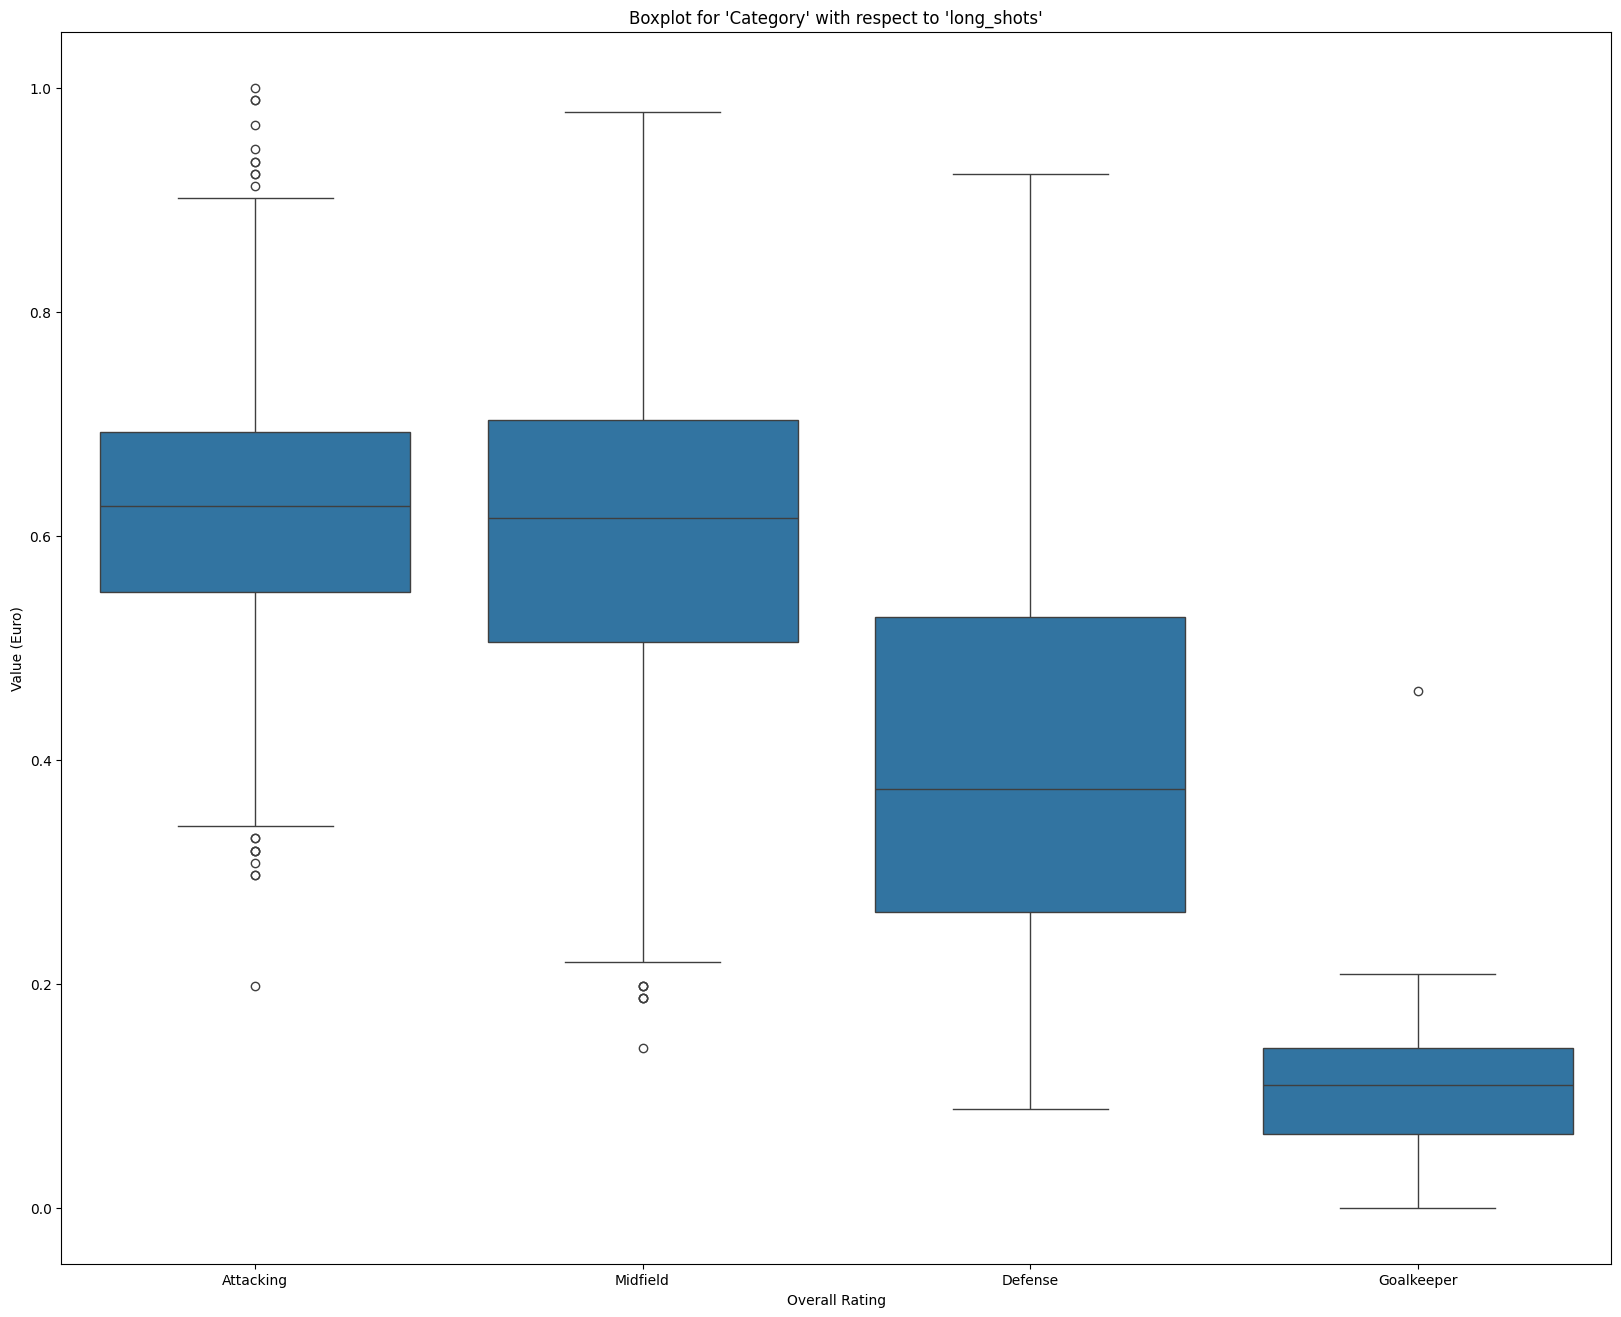

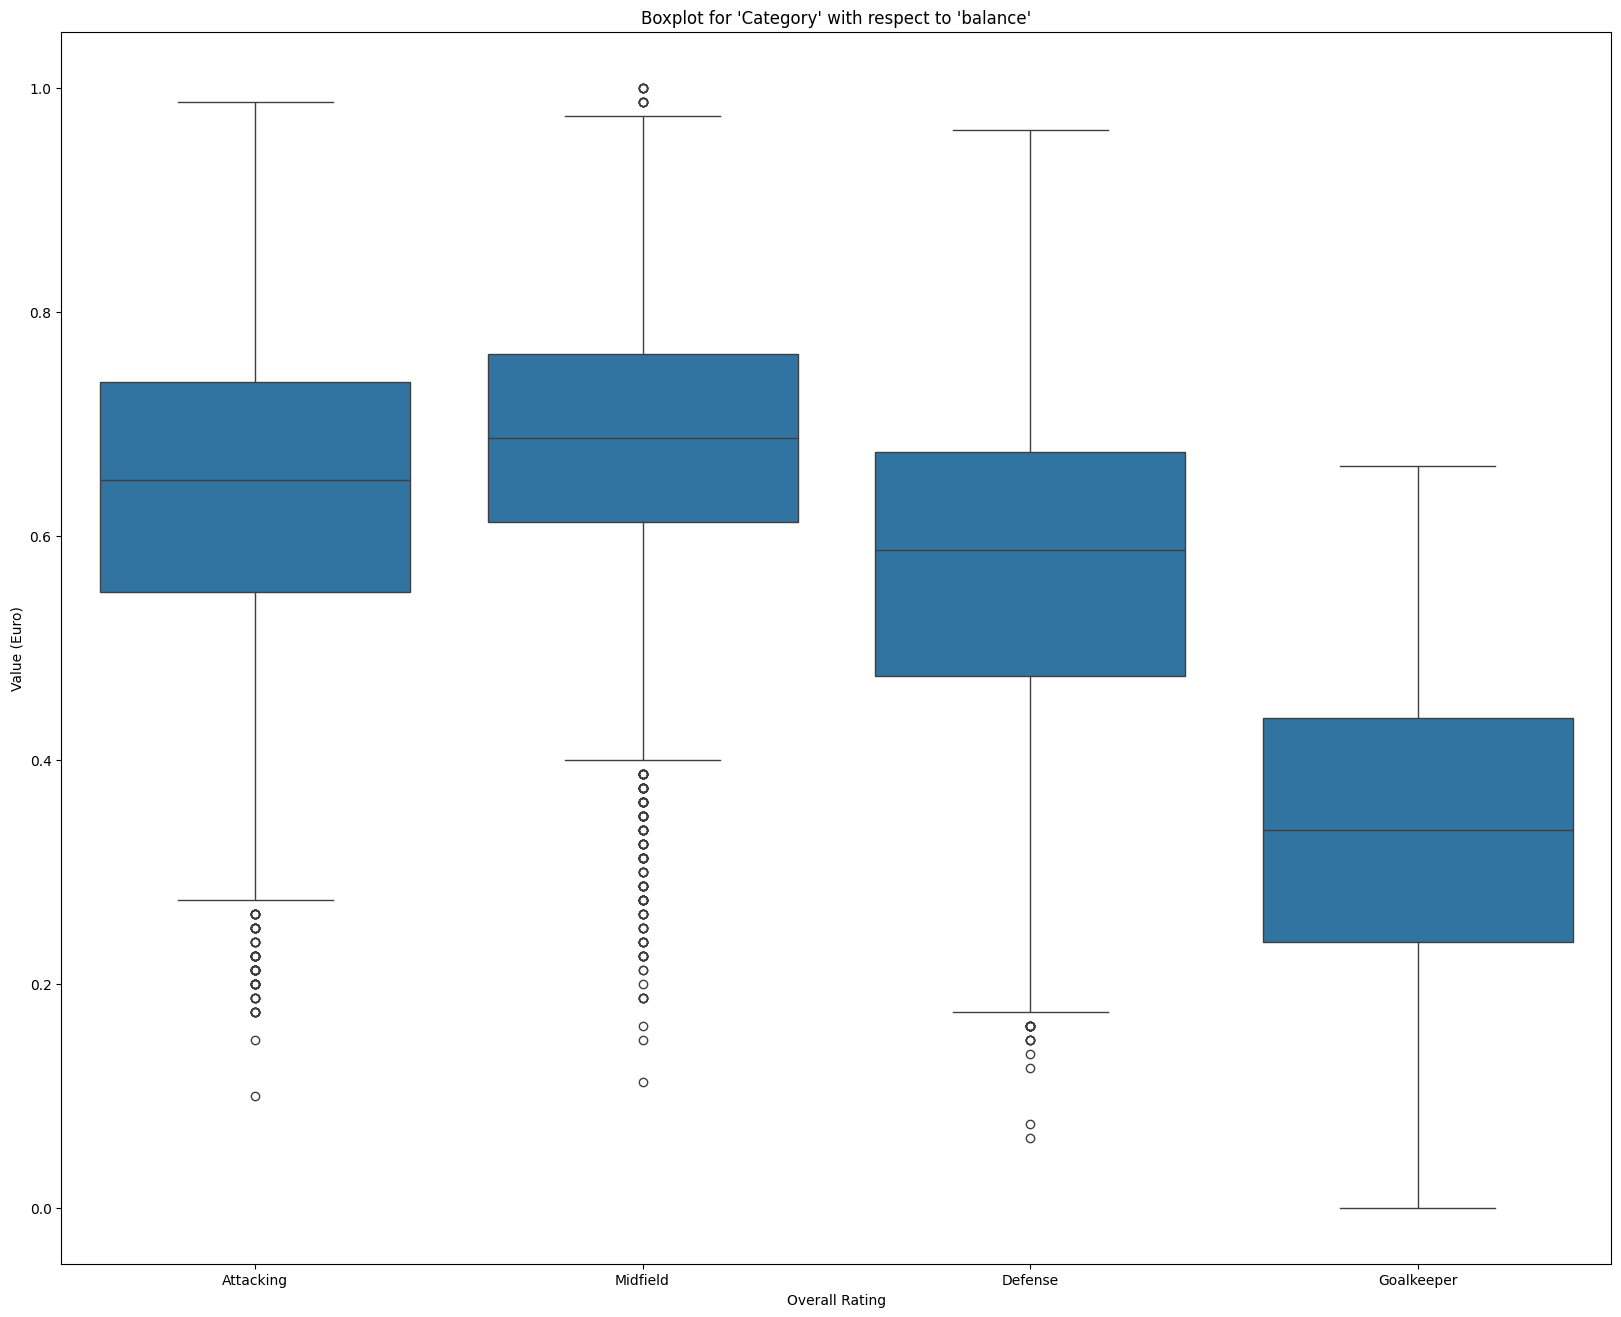

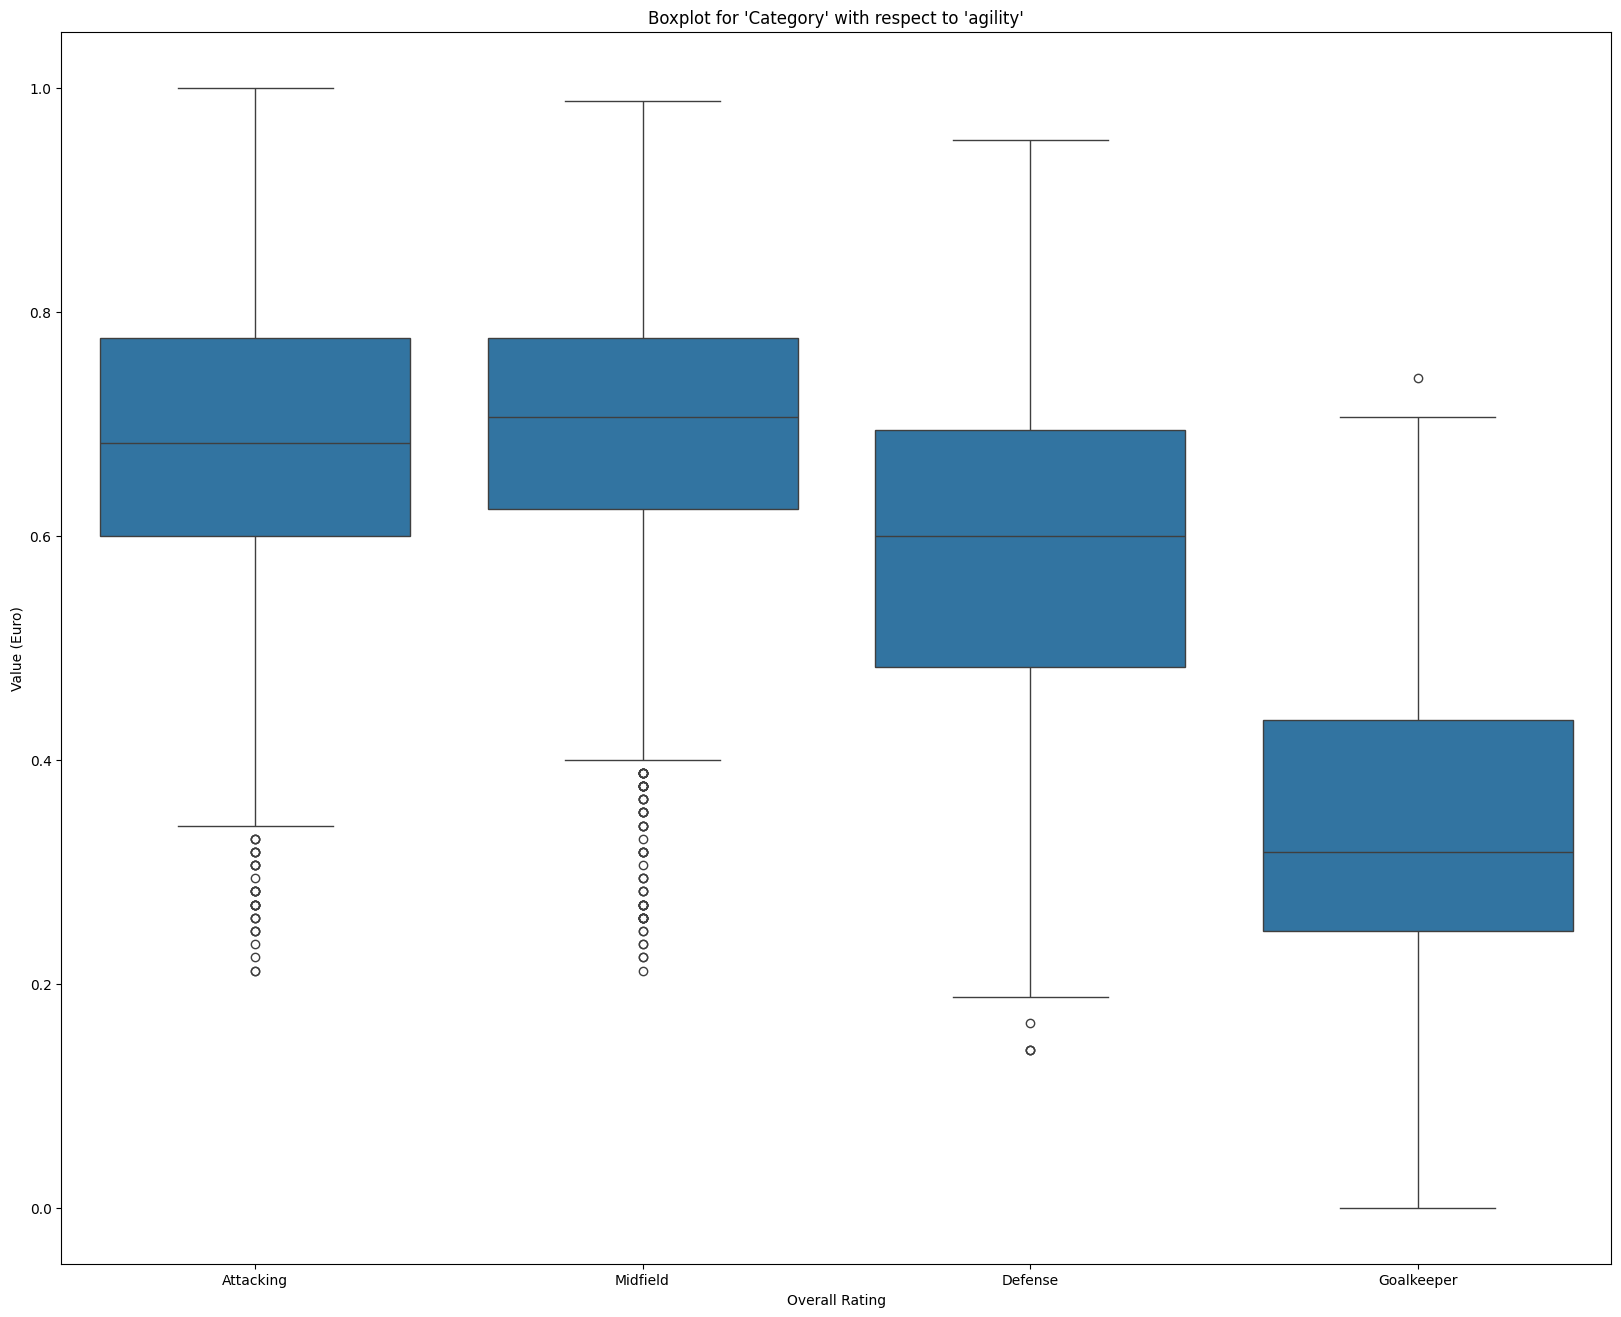

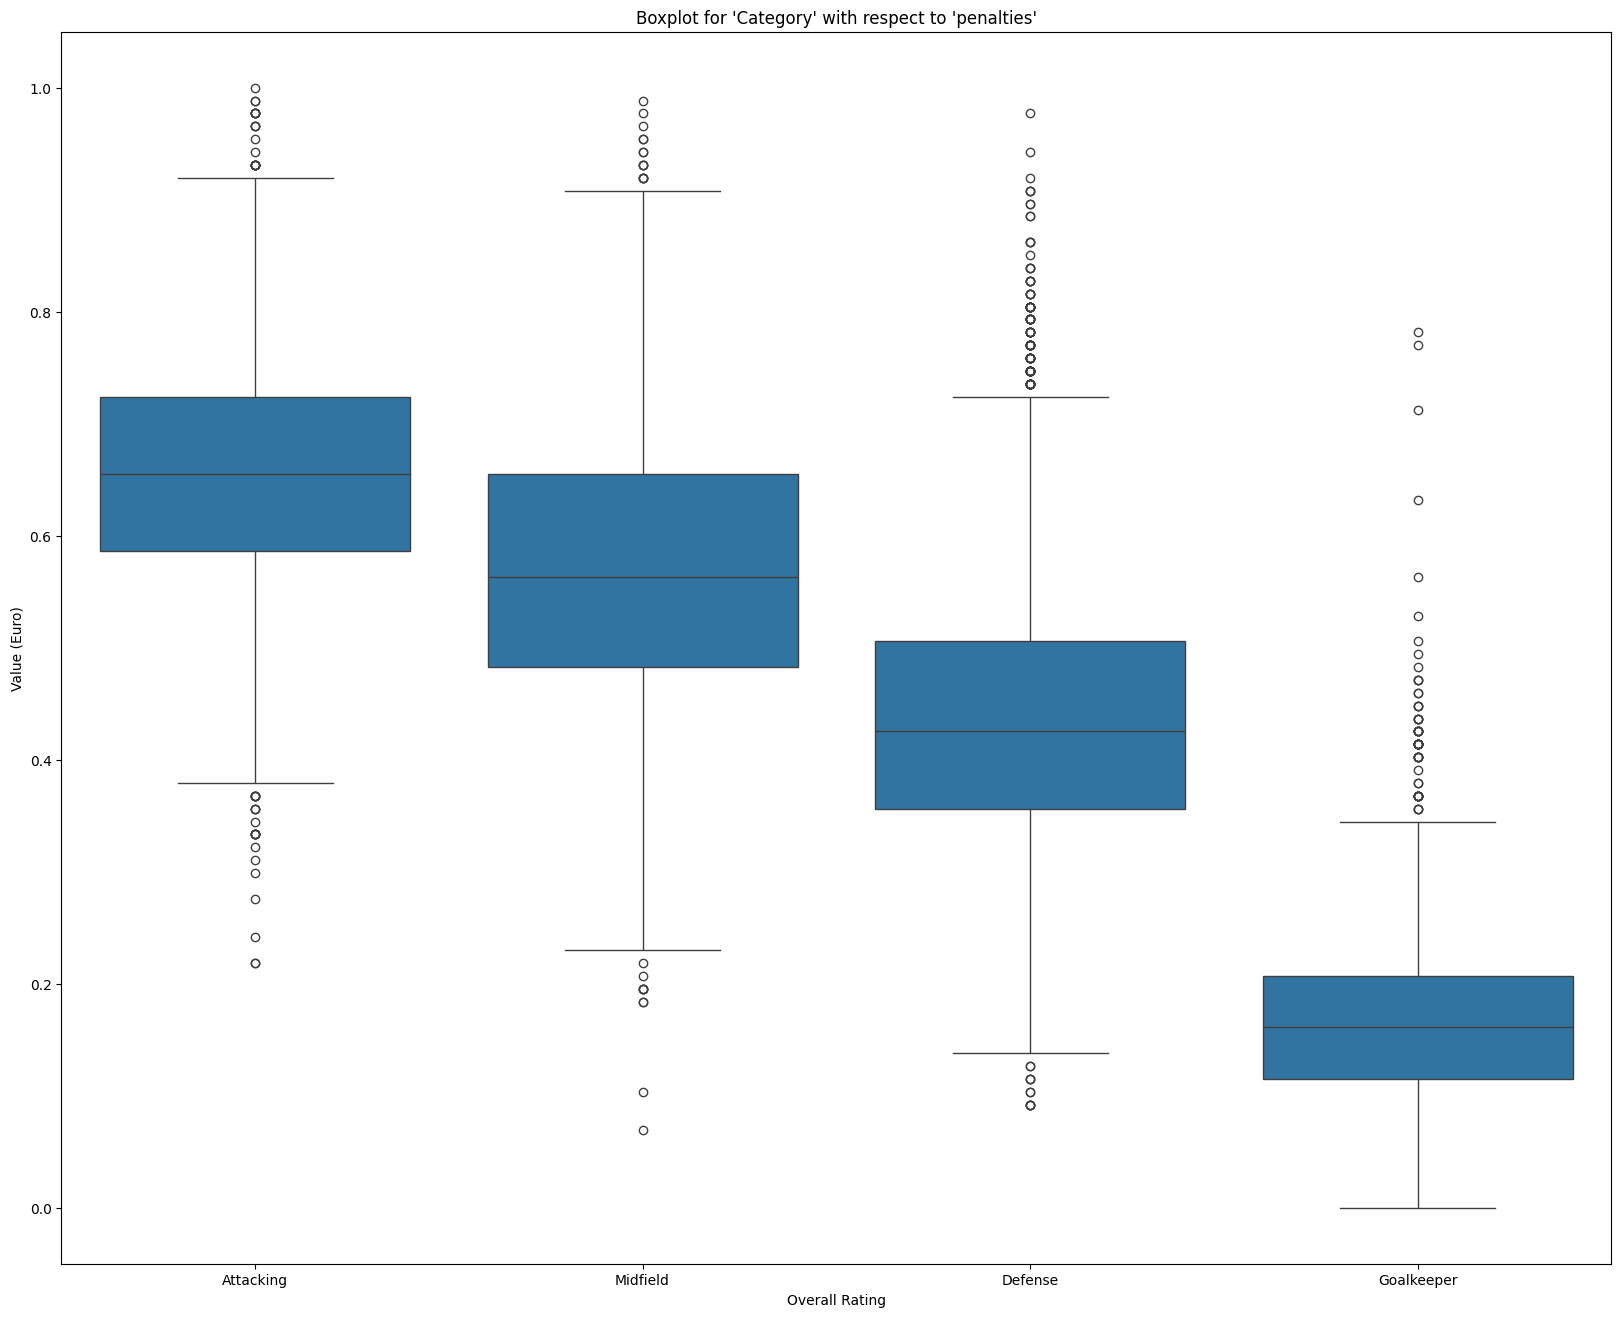

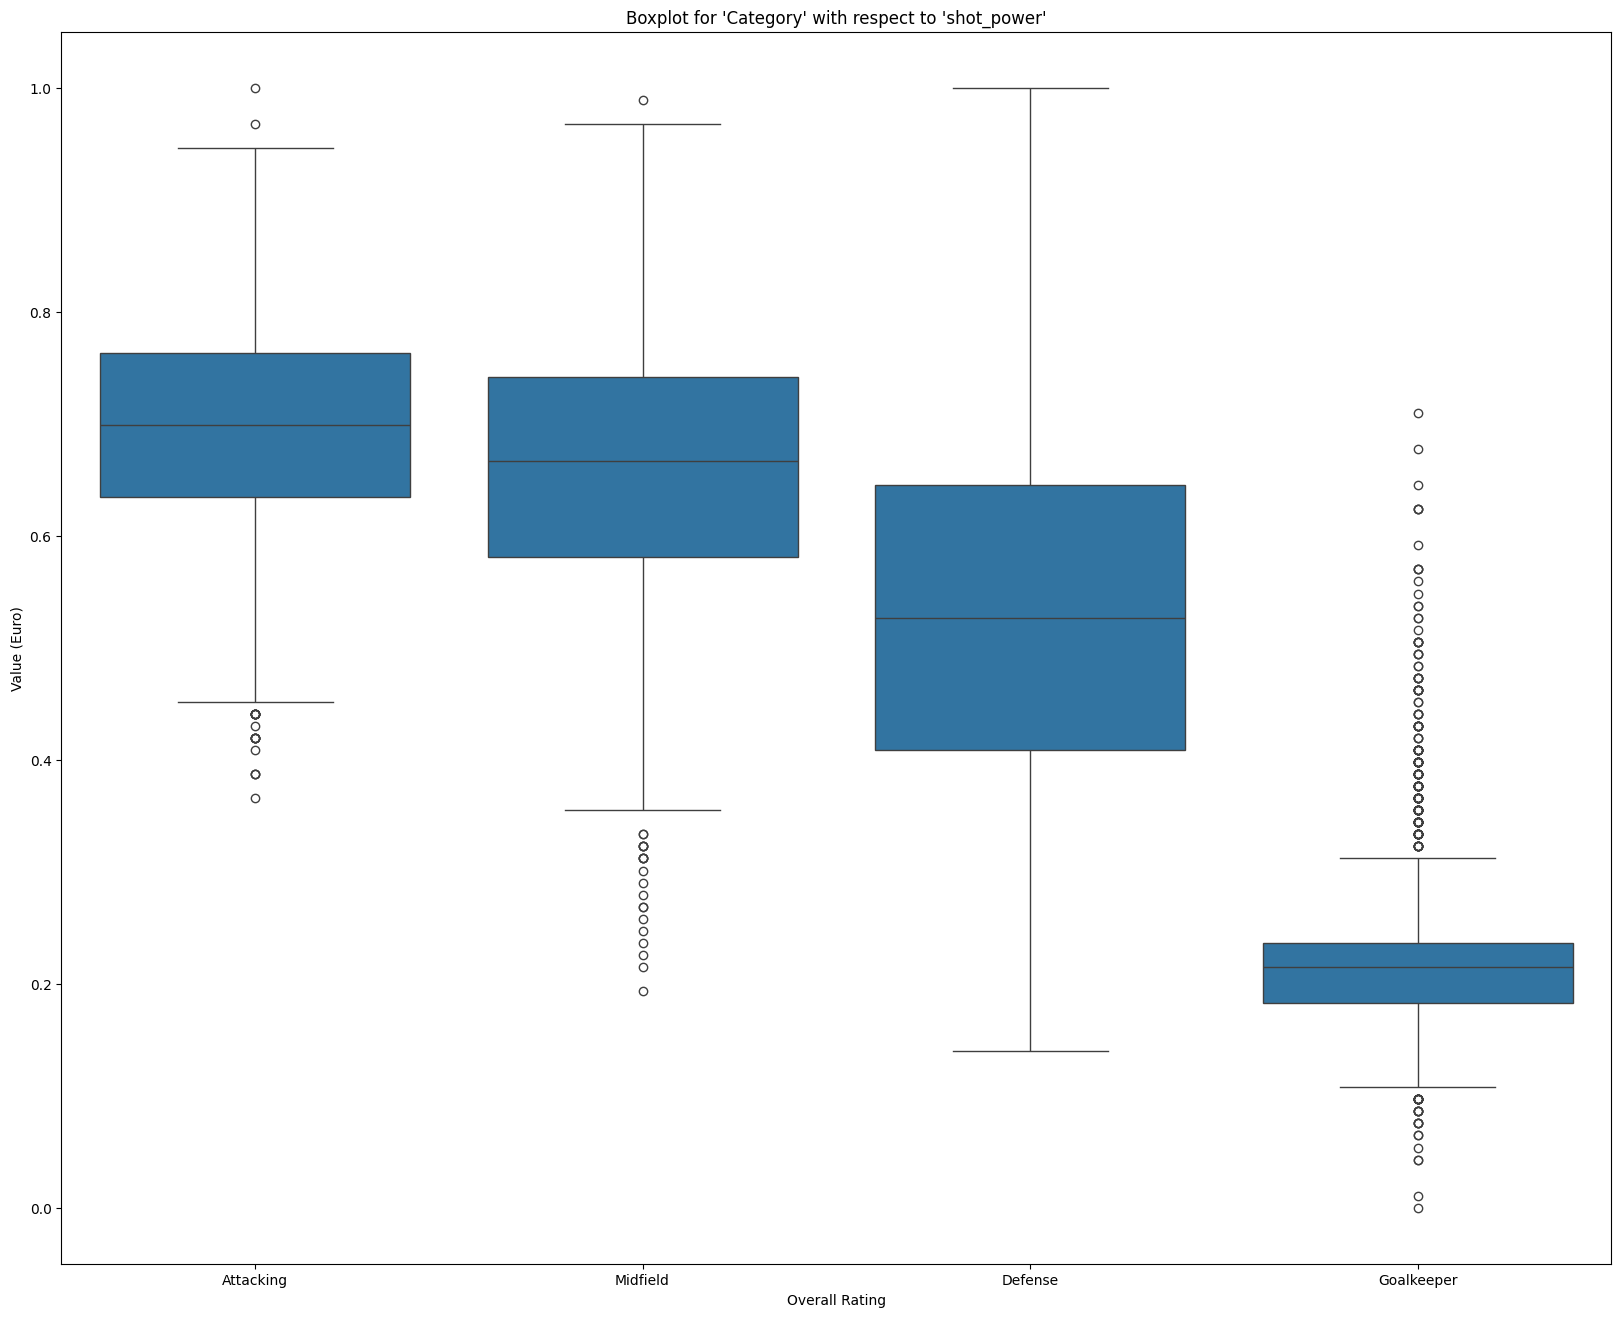

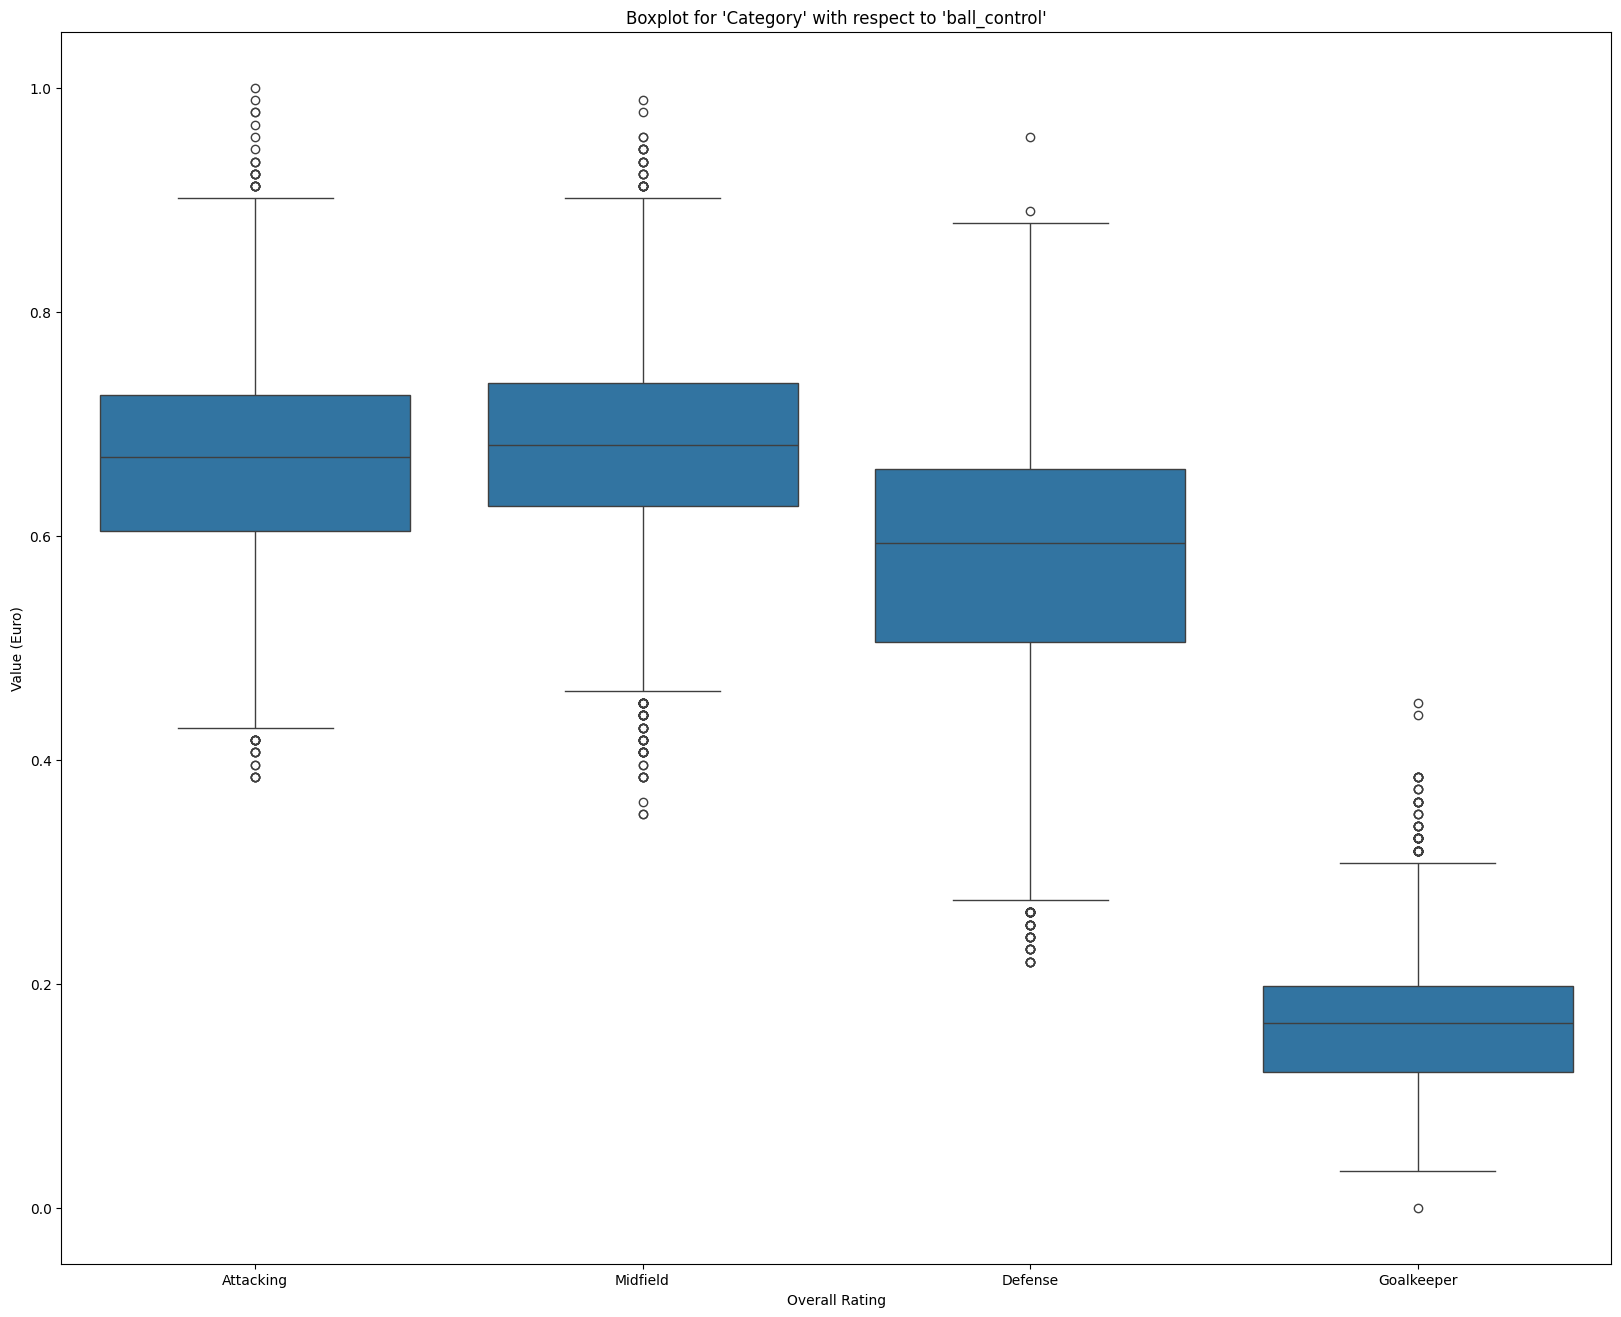

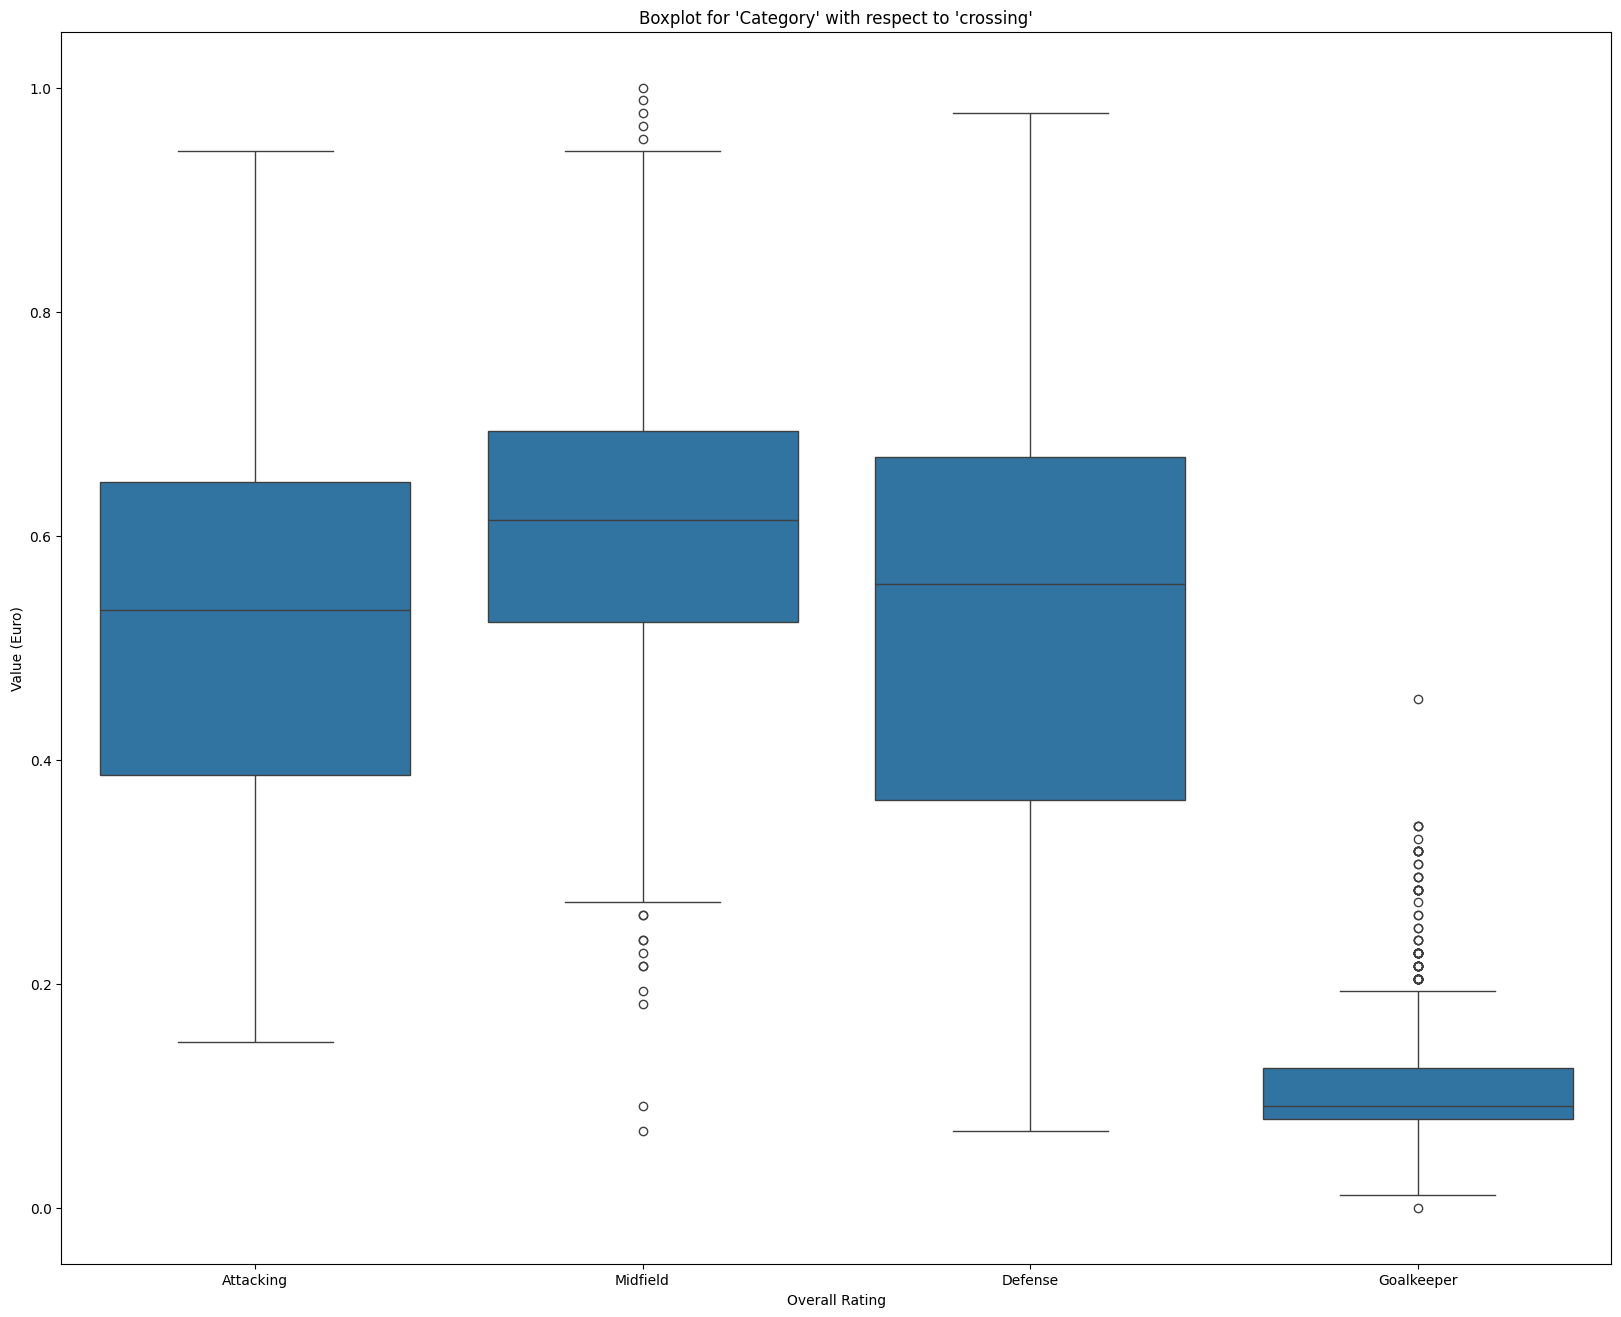

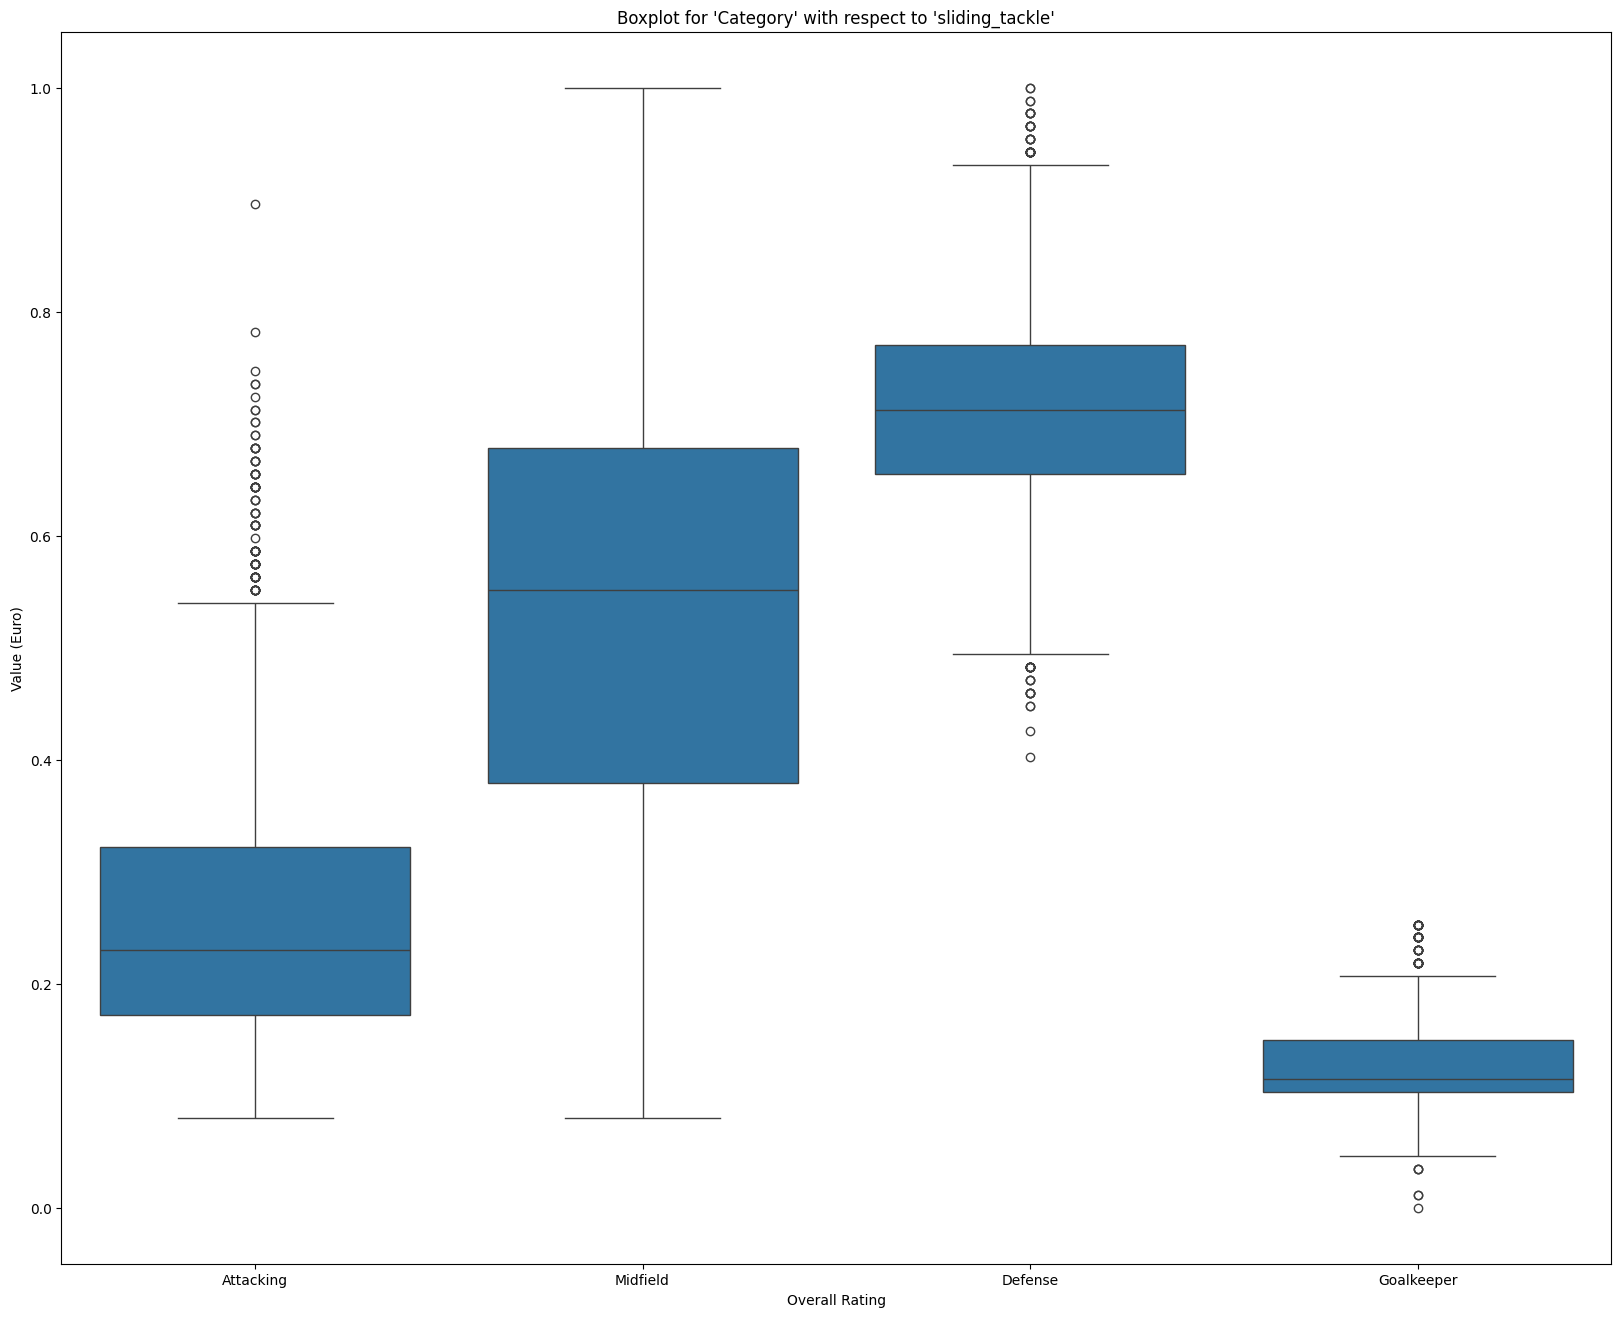

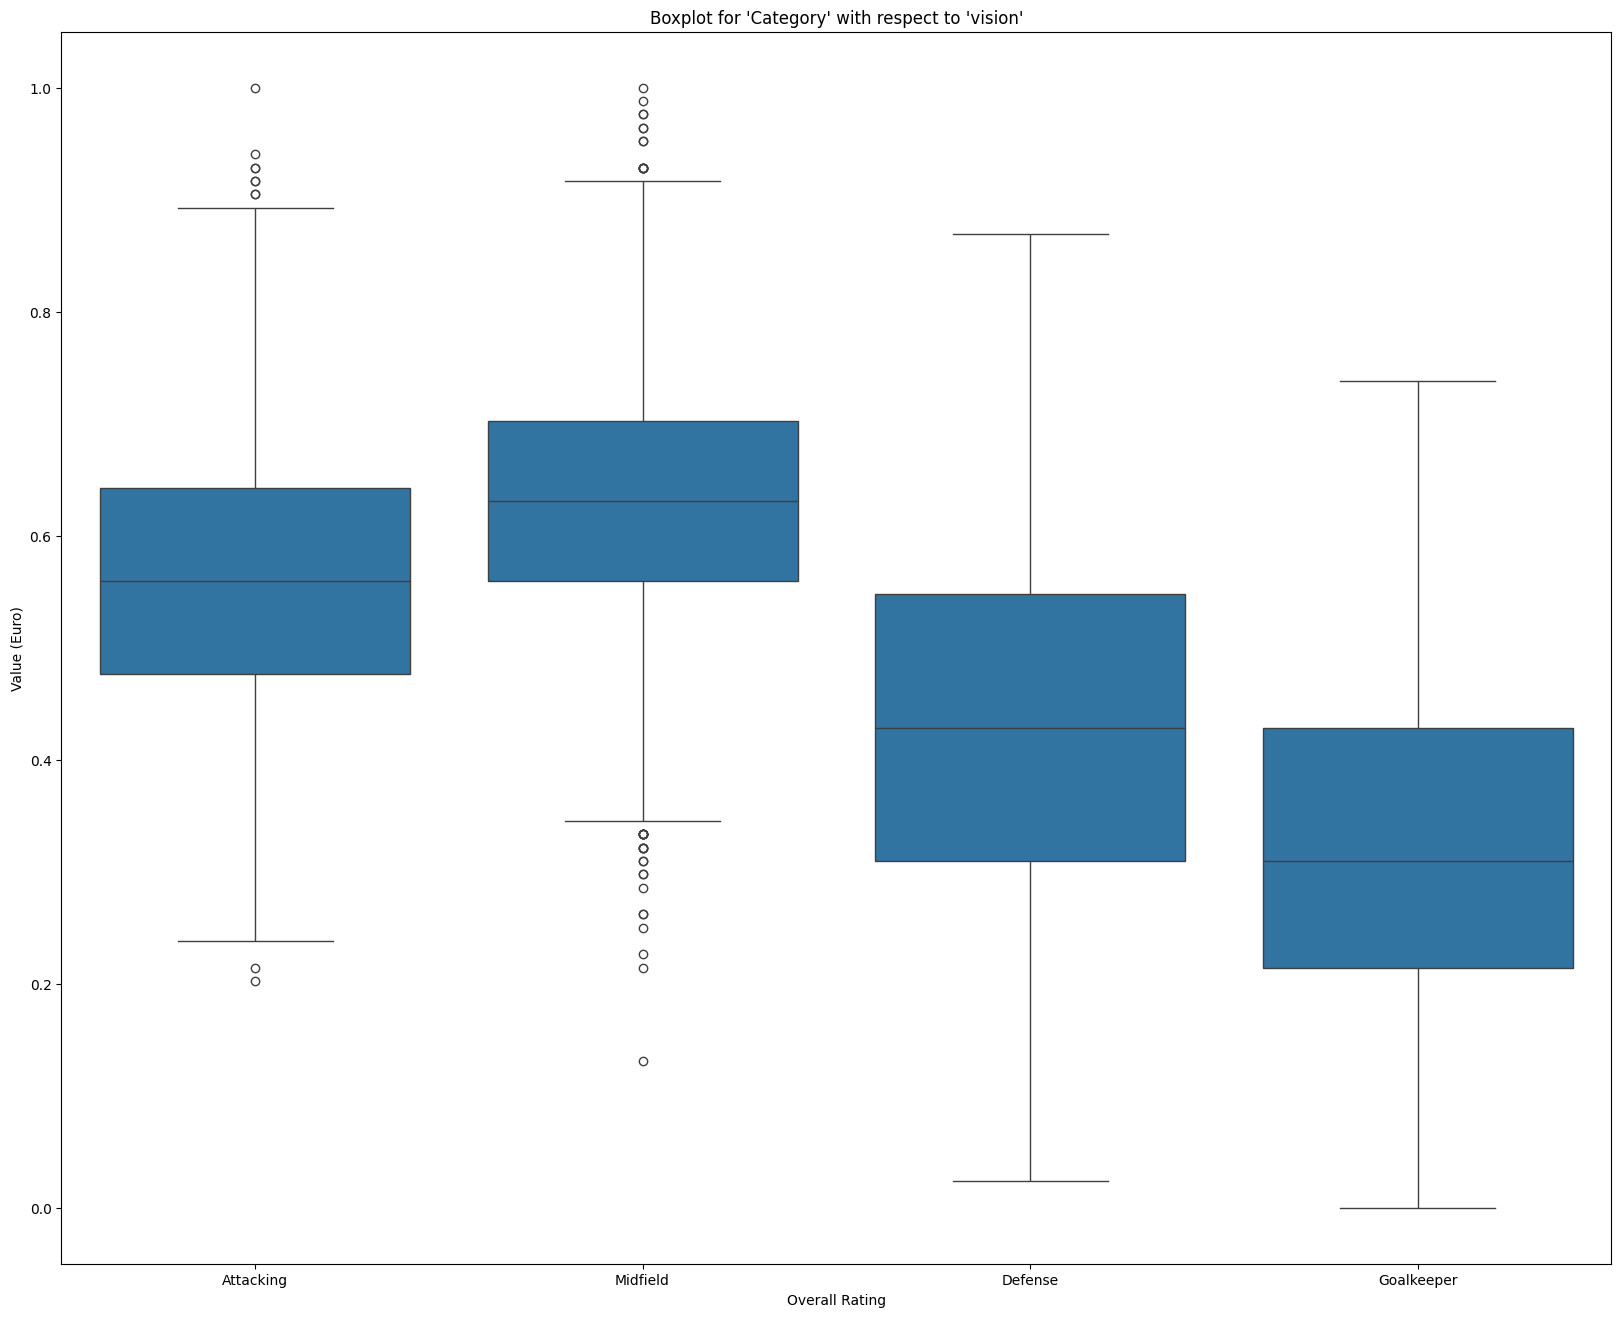

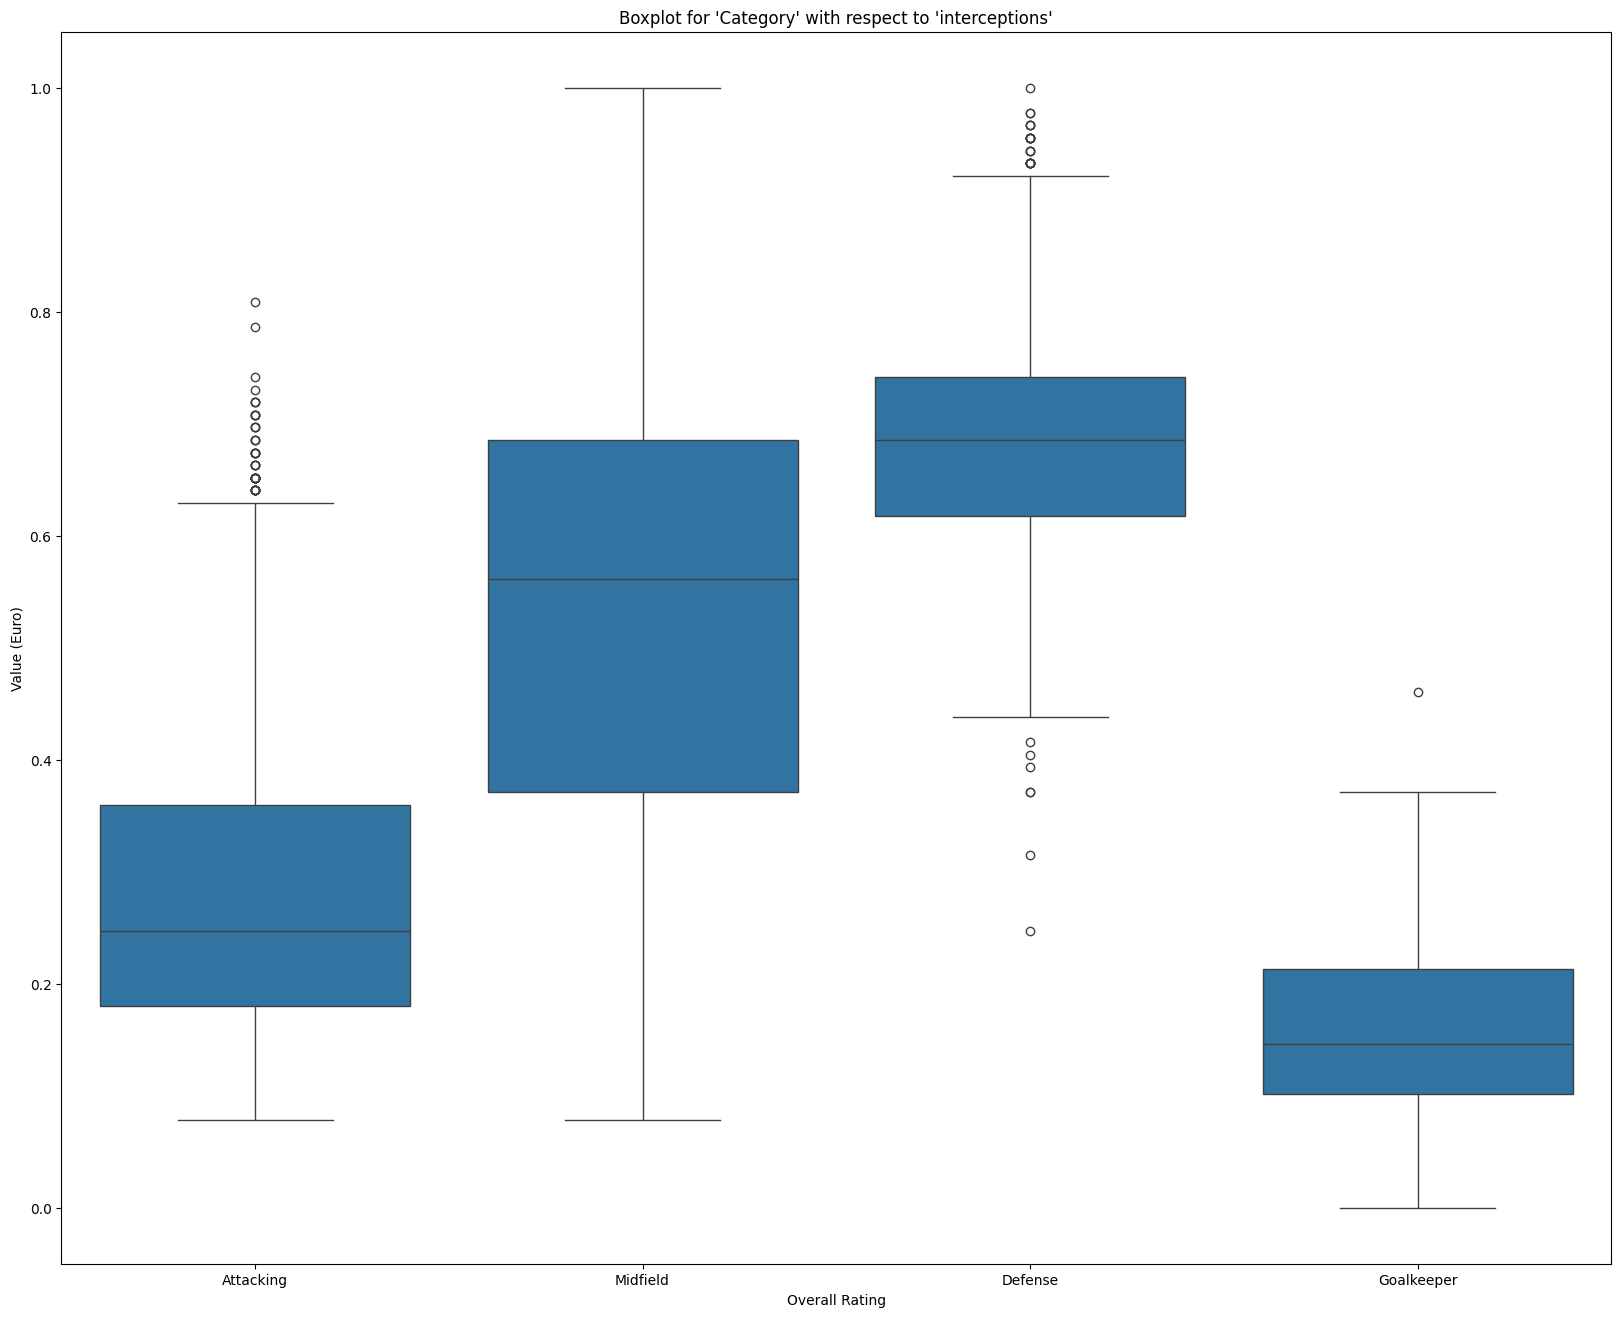

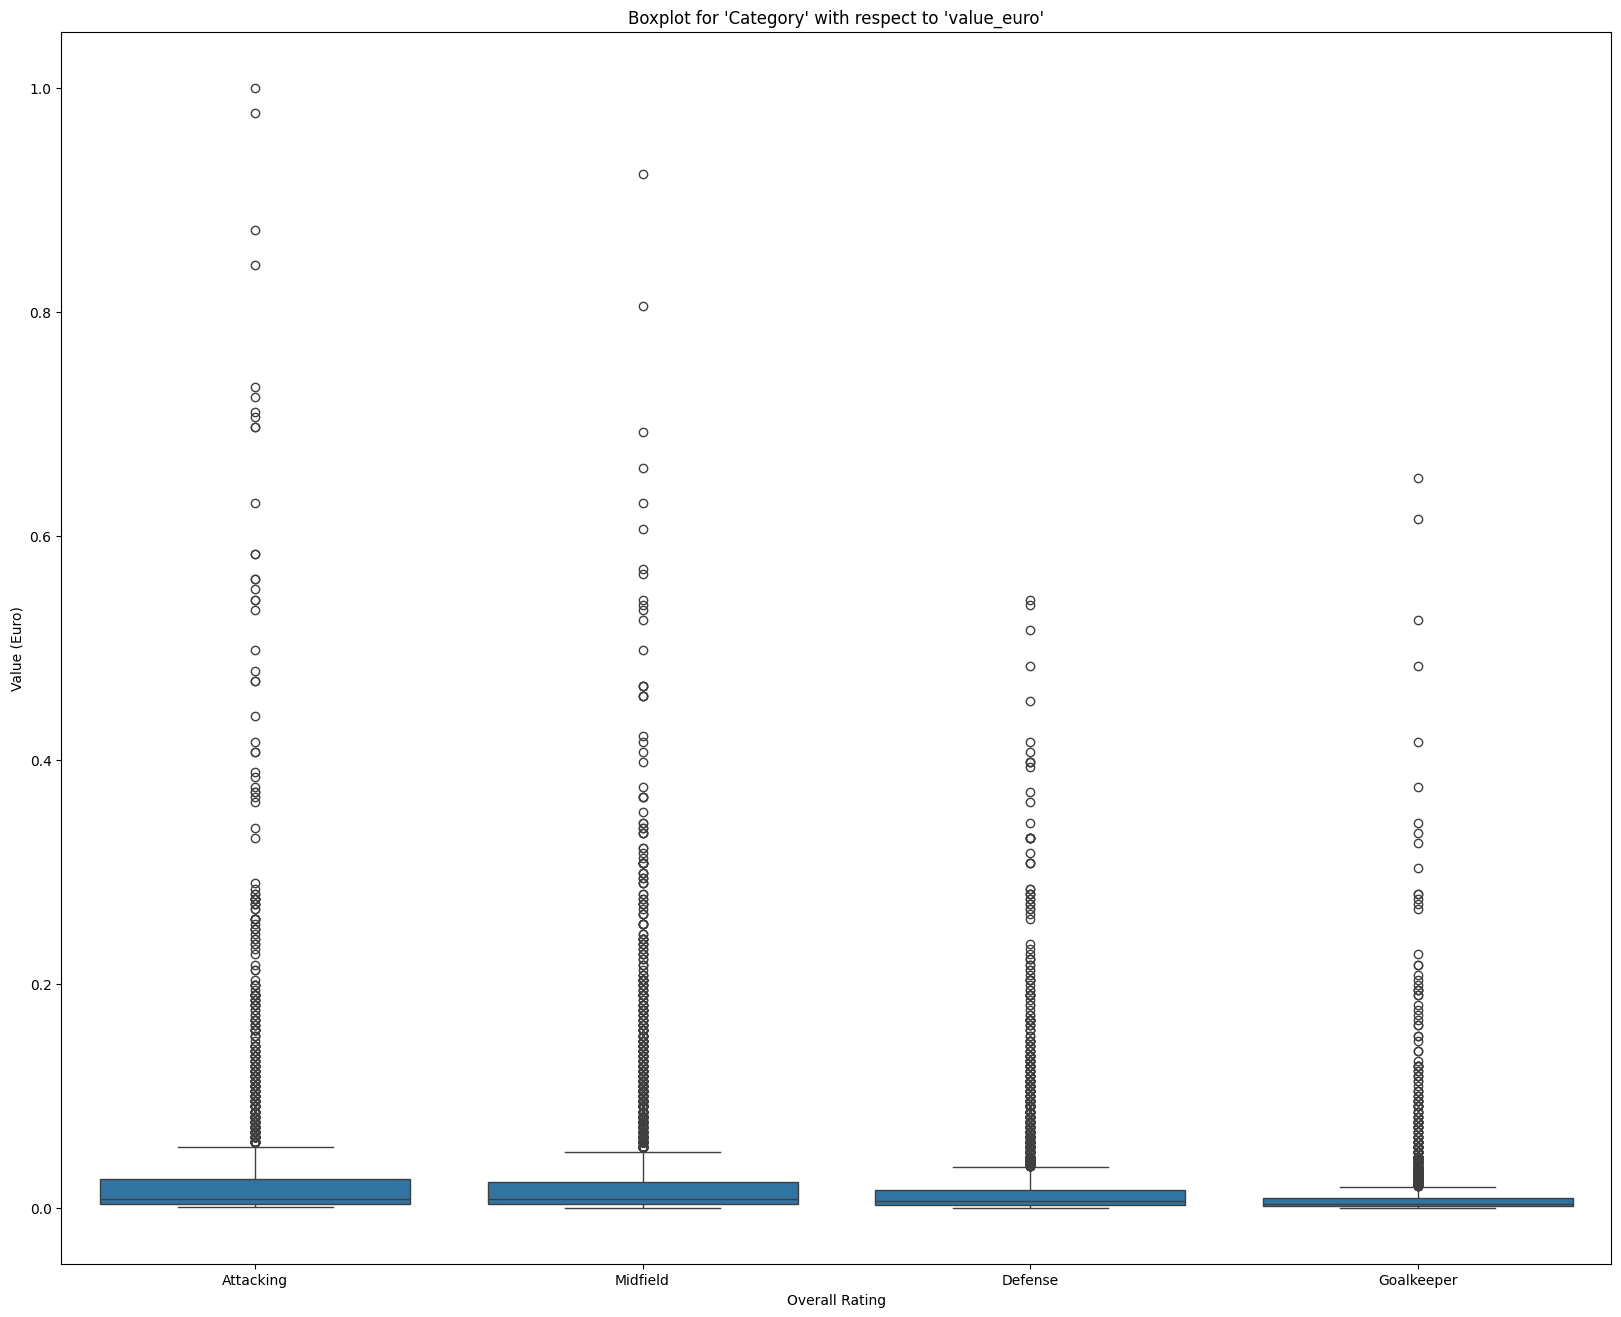

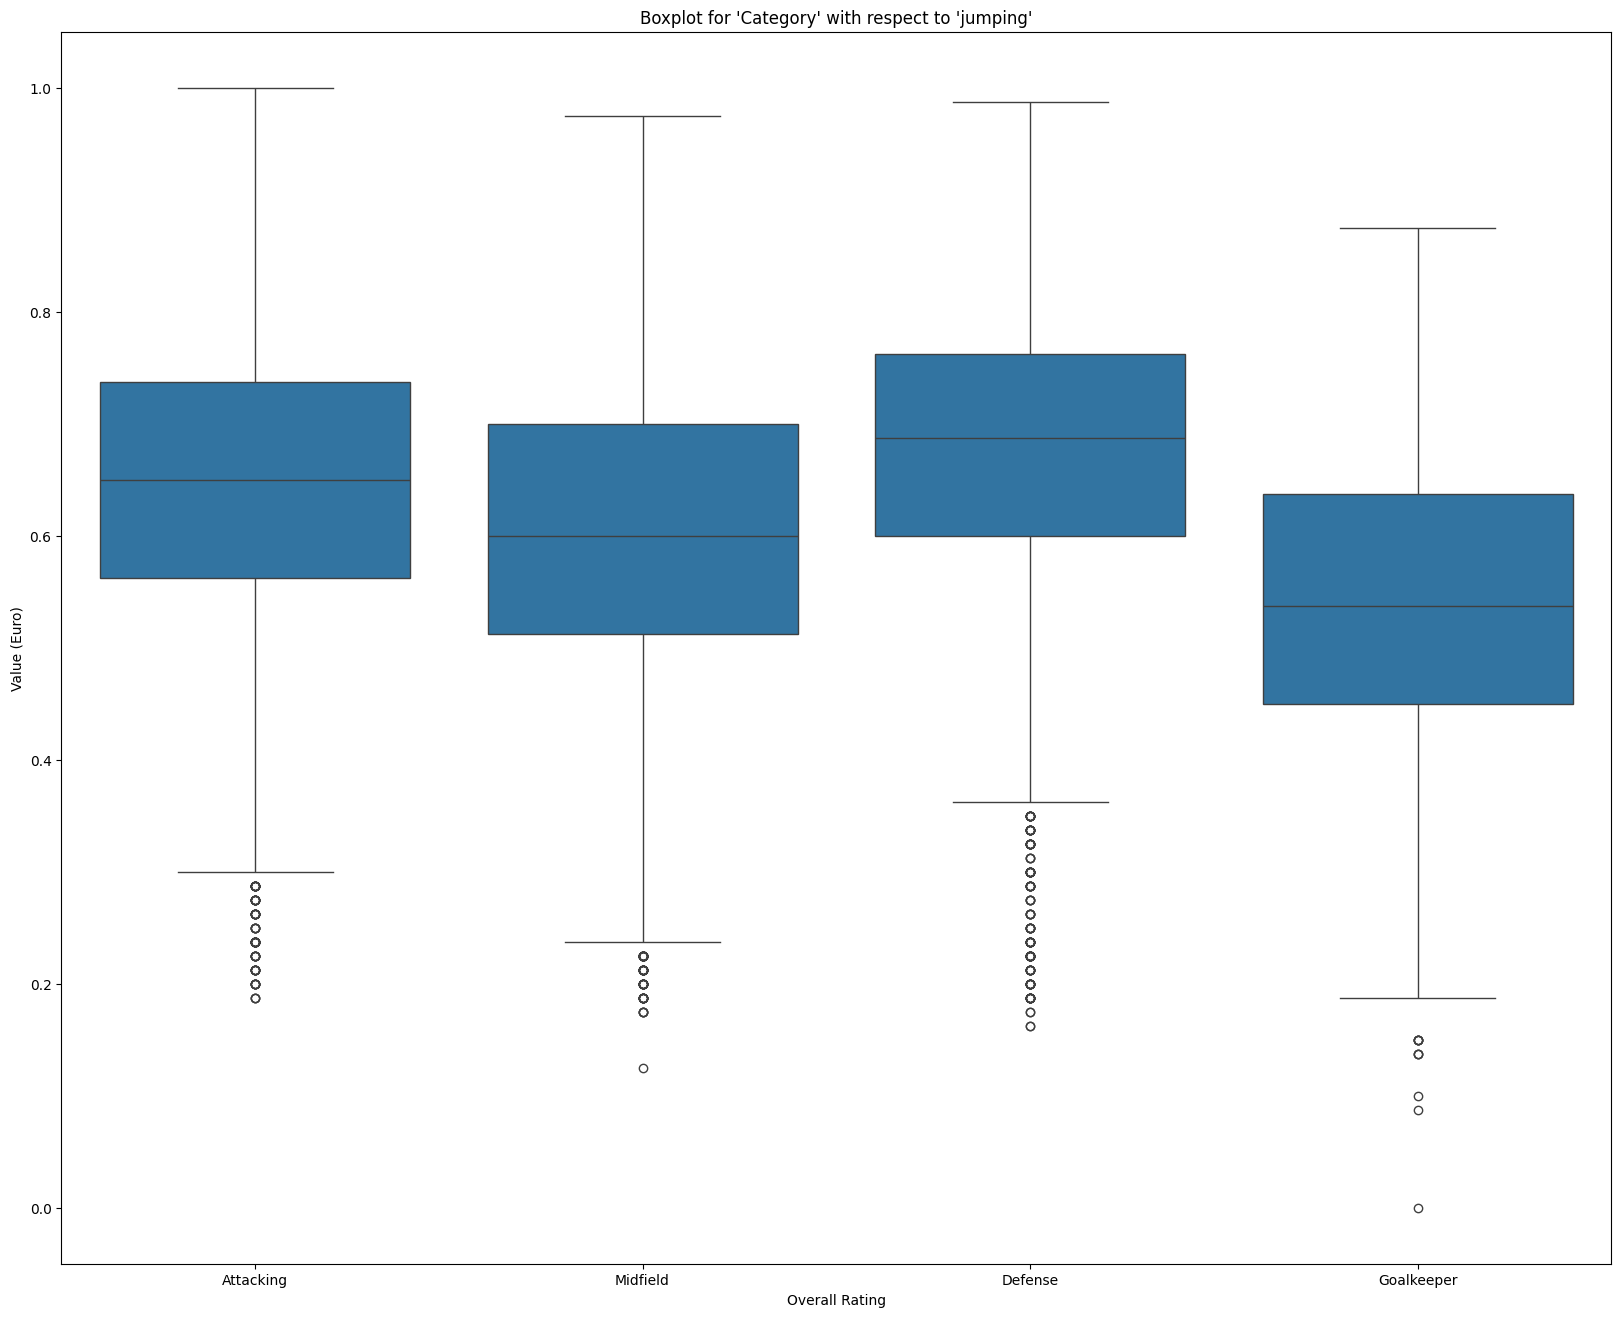

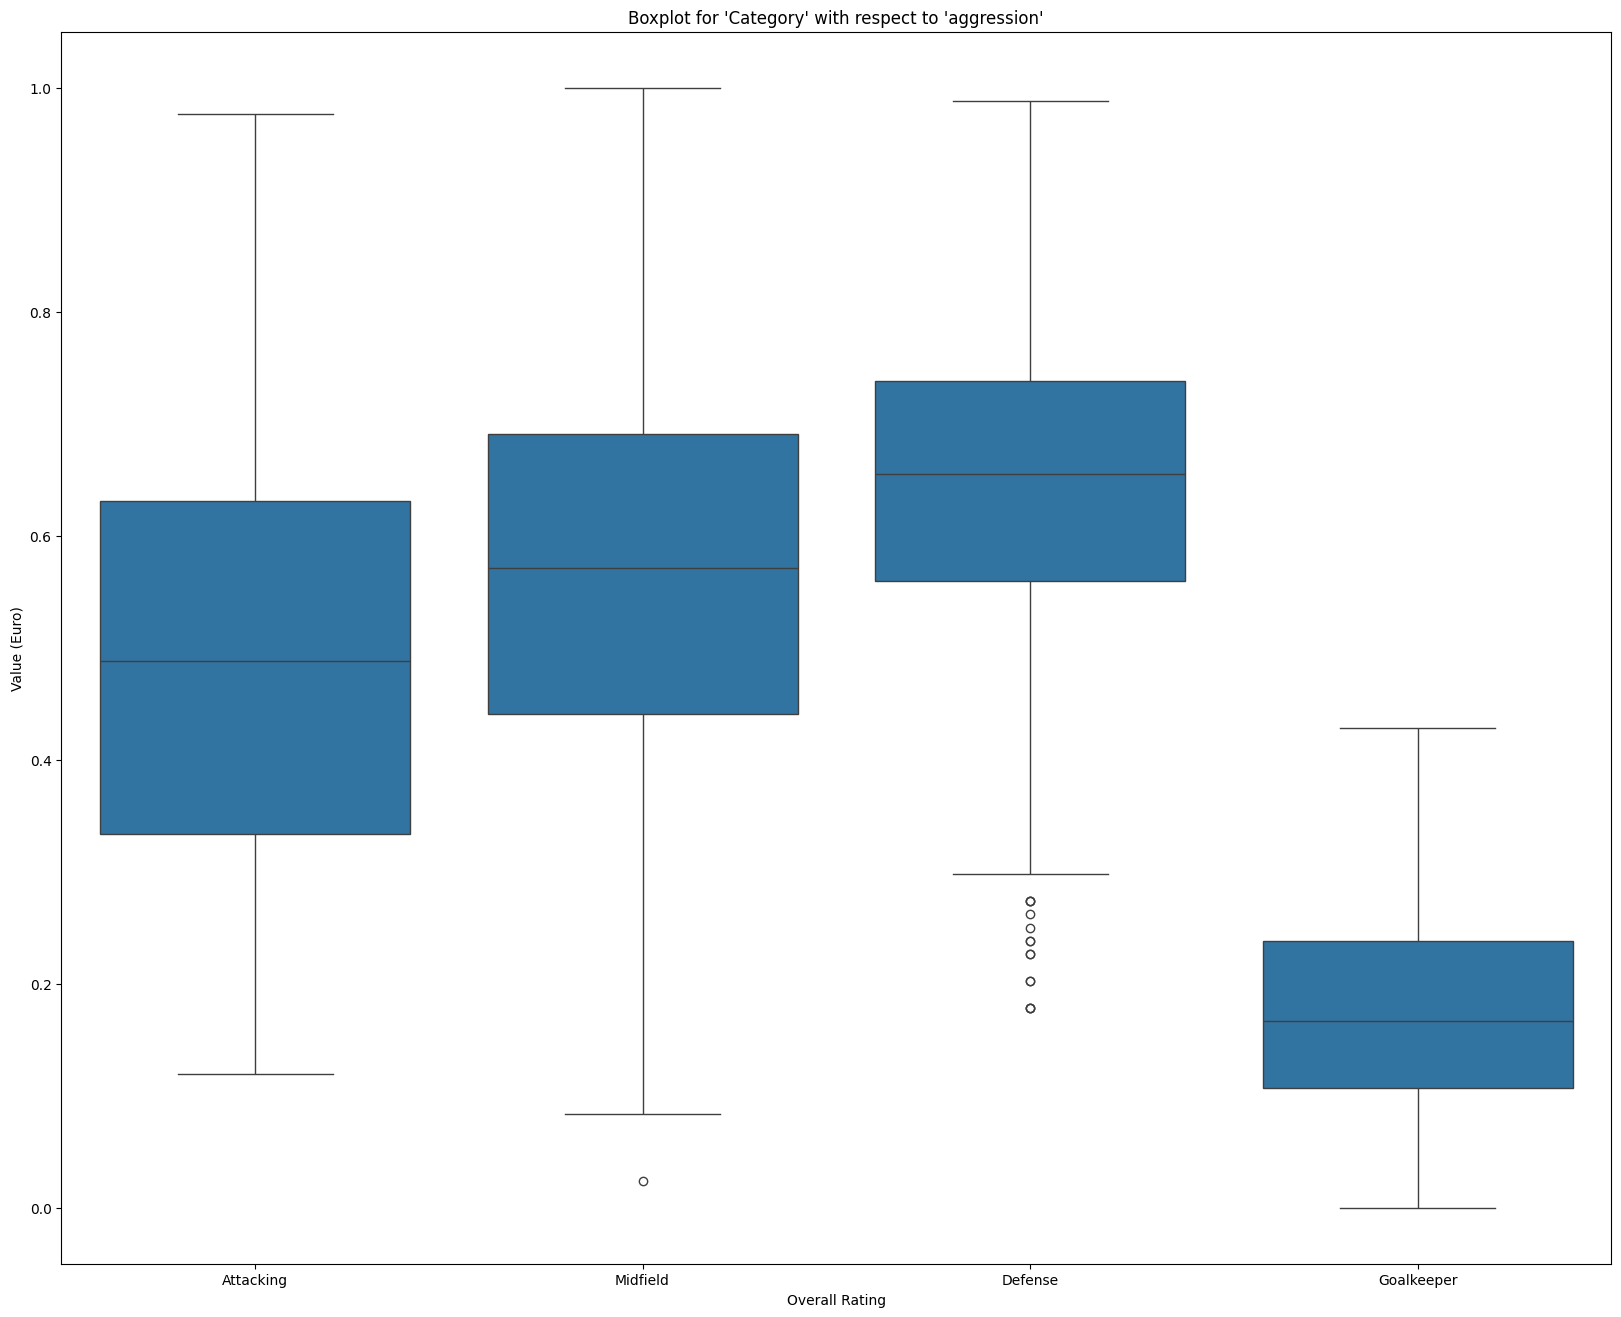

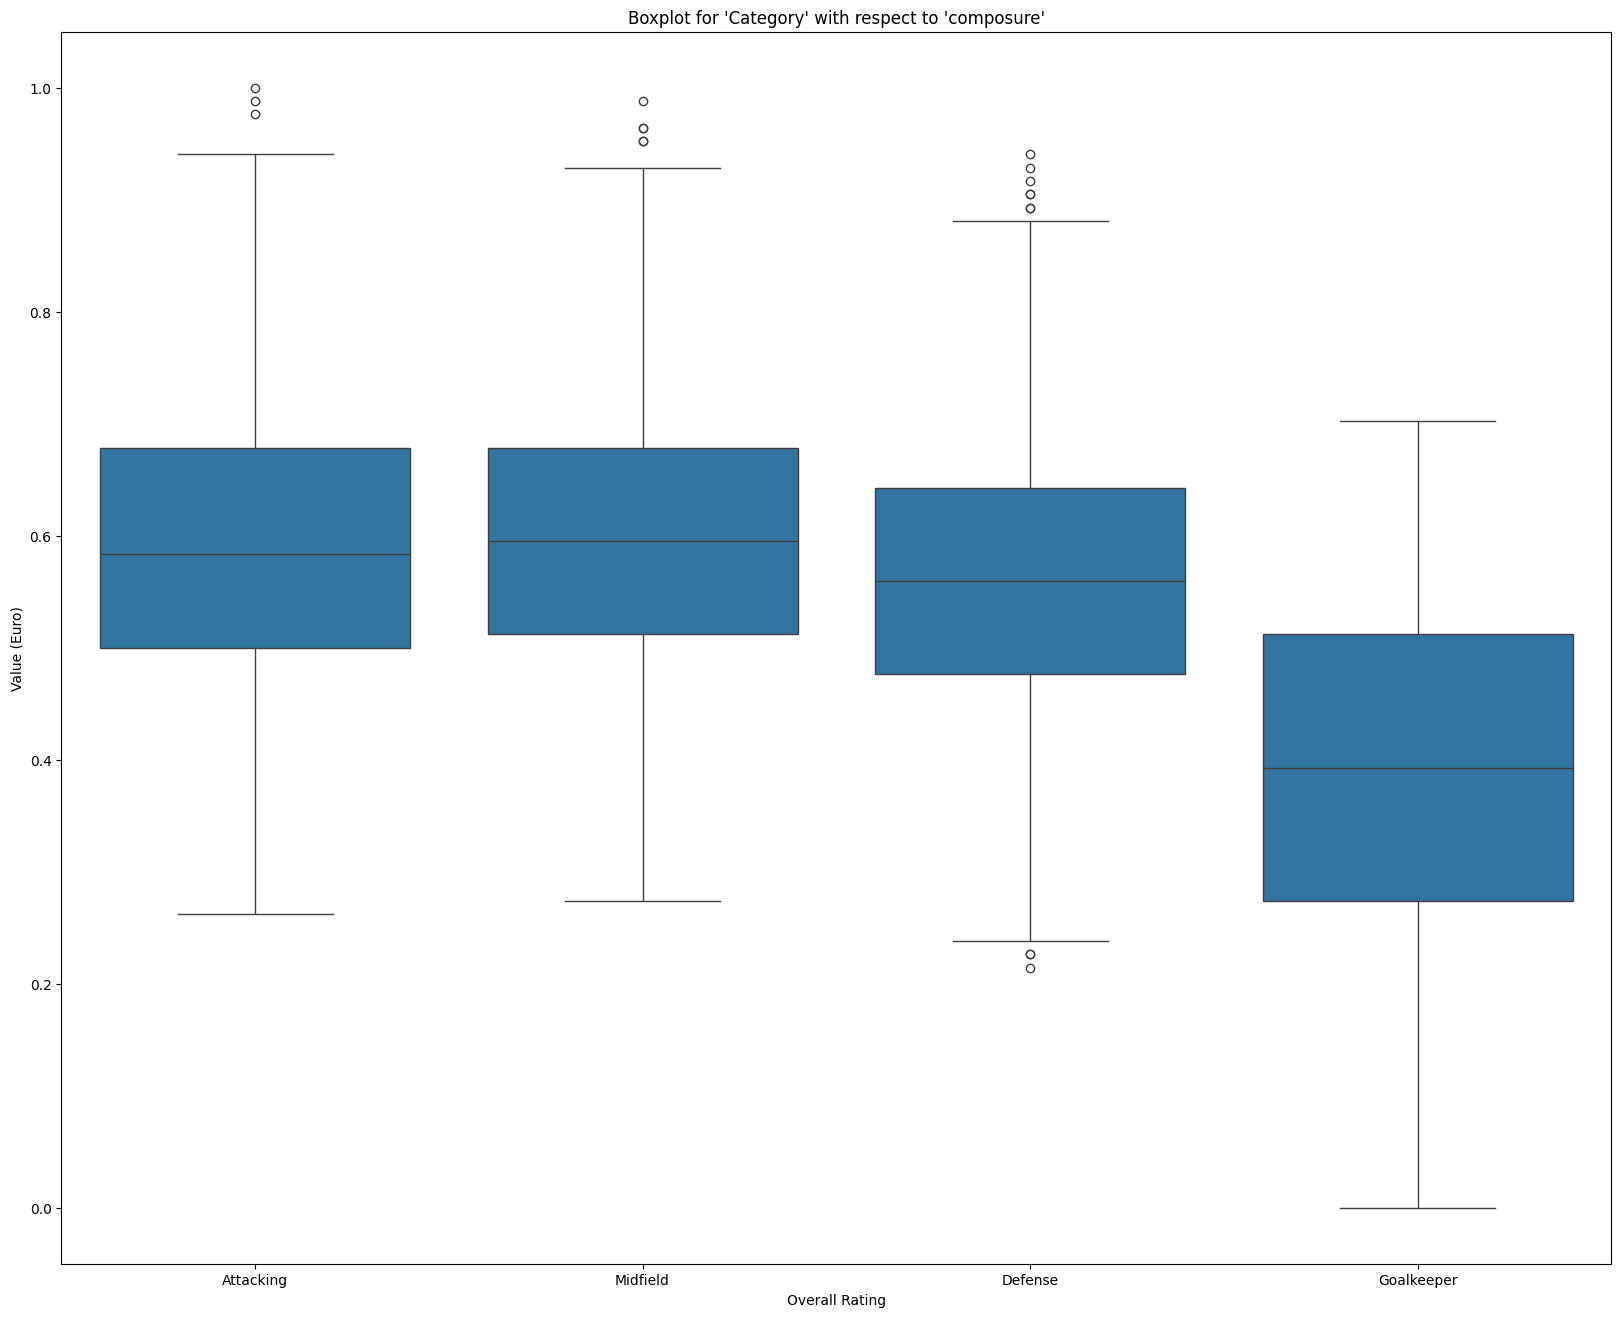

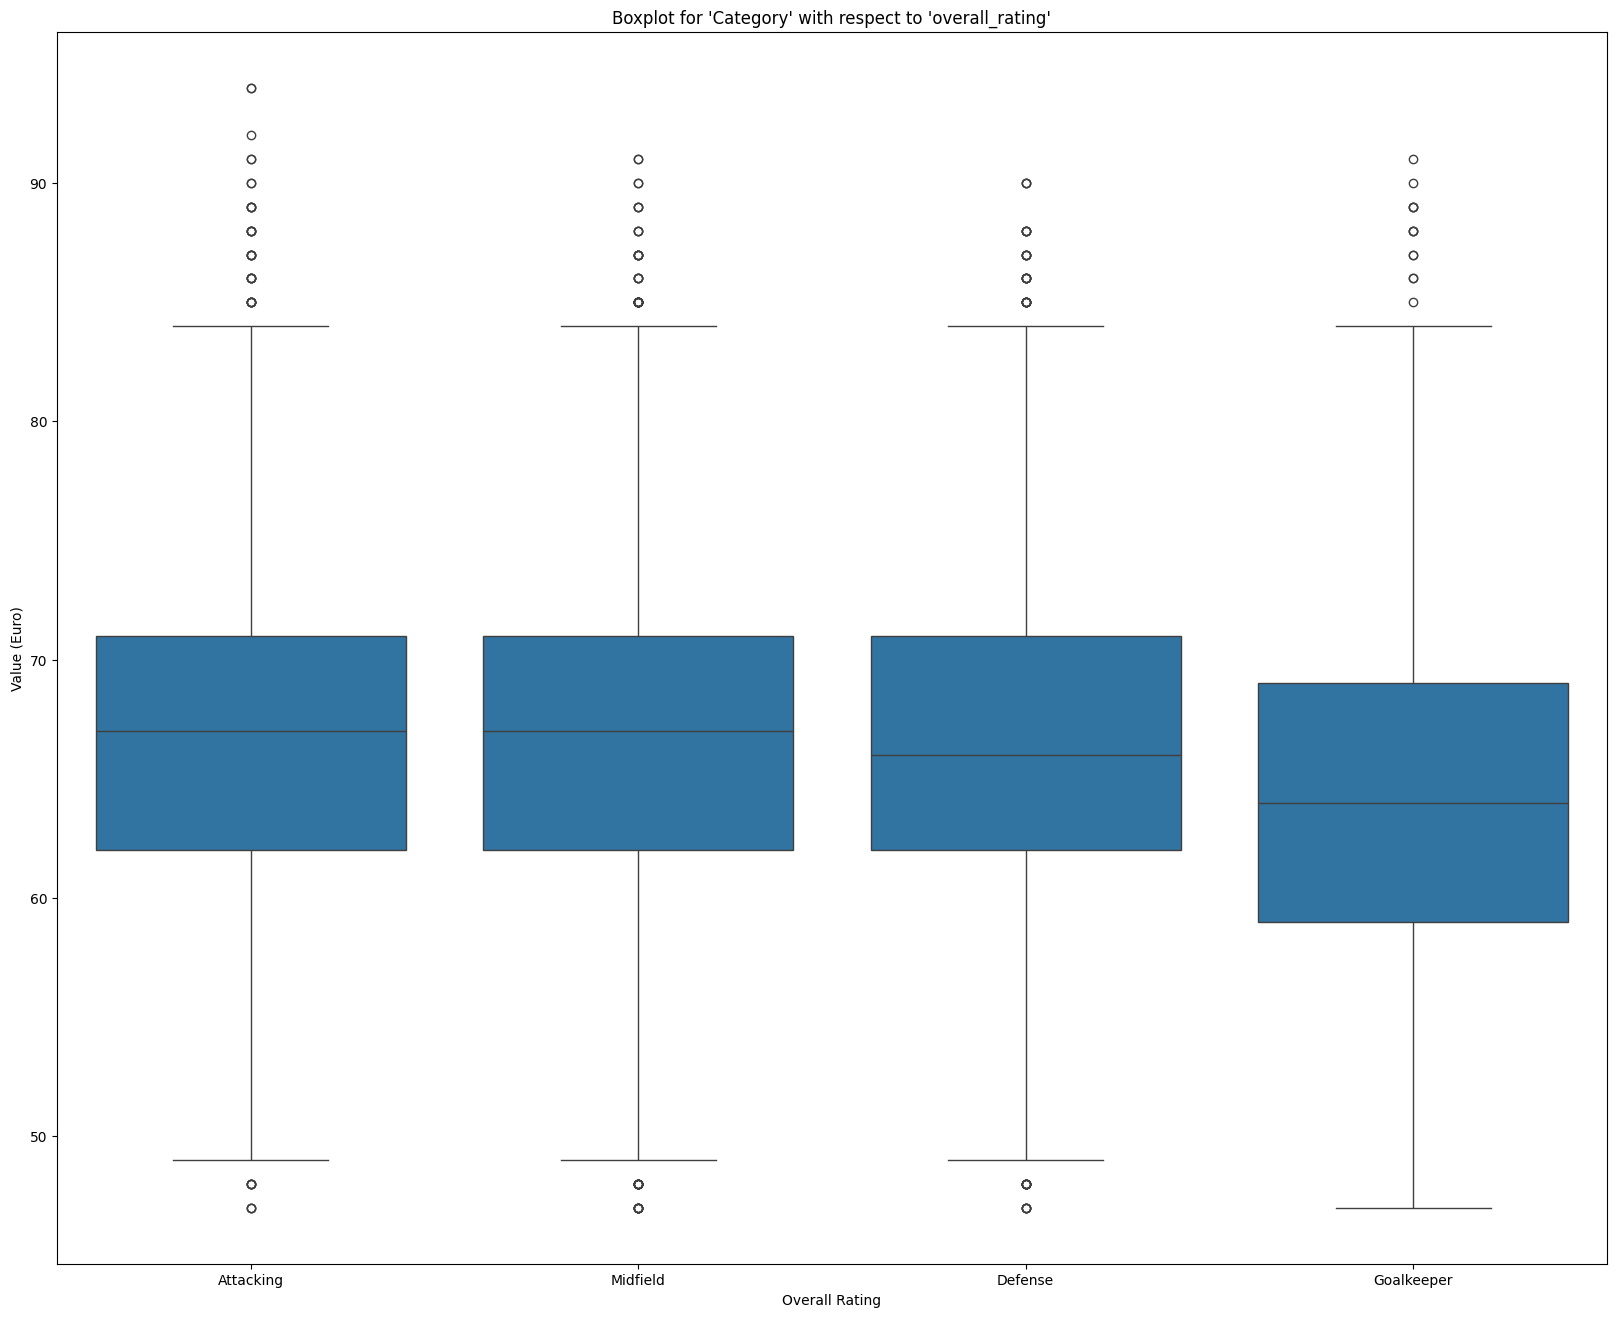

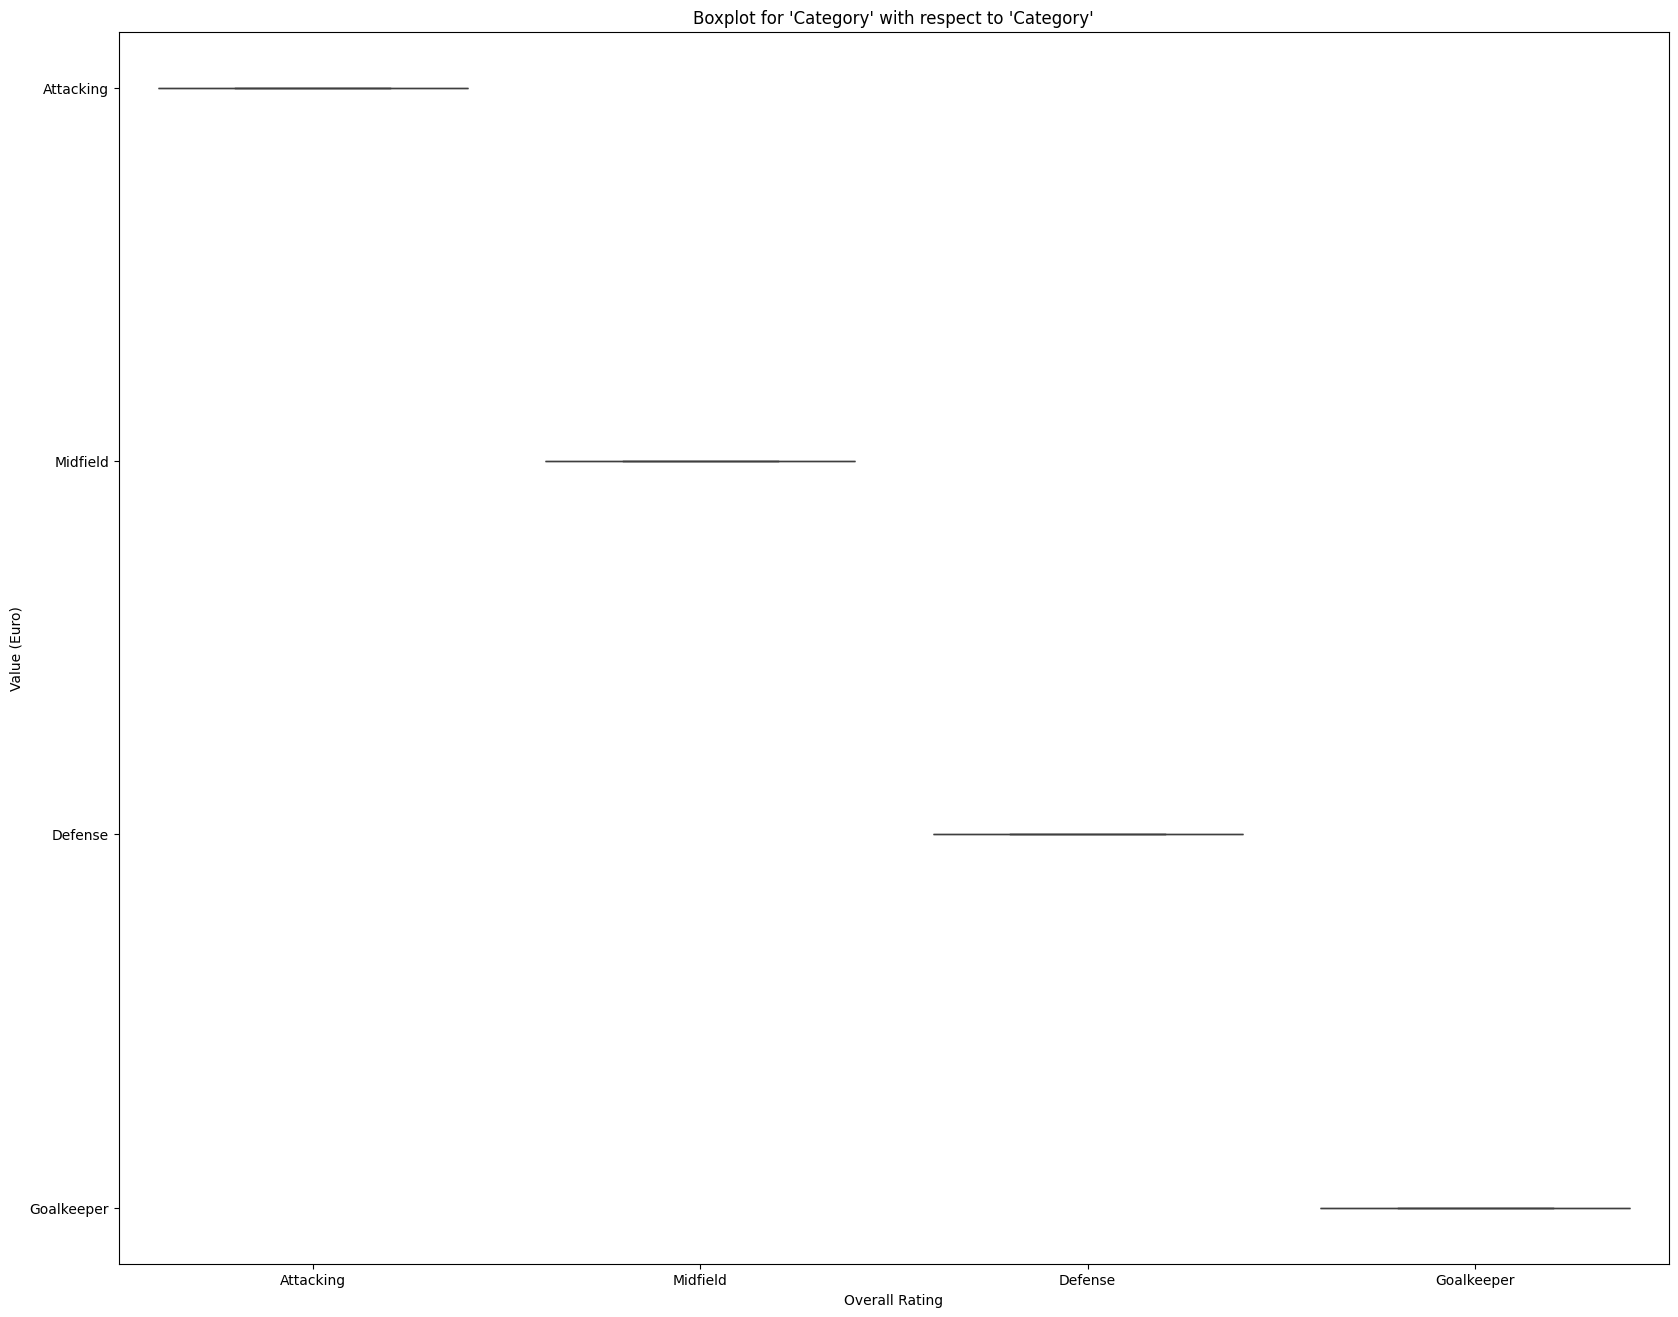

In [ ]:
for col in new_df.columns:
    plt.figure(figsize=(20, 16))

    # Boxplot for 'overall_rating'
    sns.boxplot(data=new_df, x='Category', y=col)
    plt.title(f"Boxplot for 'Category' with respect to '{col}'")
    plt.xlabel('Overall Rating')
    plt.ylabel('Value (Euro)')
    plt.show()

# Section 6. Initial model training

## K-Nearest Neighbors Model

TODO: *Insert reason why we use this model here*

Importing relevant libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Creating the train and test datasets using train_test_split. We set test_size to 0.3 as it is a pretty standard test size. We stratify based on y to ensure that the data is split evently between the classes. Shuffle is to help randomize the data for possibly better fitting. Random state set for reproducability.

In [ ]:
X_knn = normalized_df
y_knn = normalized_df.values[:, -2]

NameError: name 'normalized_df' is not defined

Standardize features using MinMaxScaler

In [ ]:
X_knn = MinMaxScaler().fit_transform(X_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, stratify=y_knn, random_state=42)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train[0])

See train and test split shape

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

Setup KNN Classifier and start fitting to the training data. For now, we will choose as arbitrary K value and distance metric that doesn't perform too badly

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)

Test model on training data 

In [ ]:
y_pred_train = knn.predict(X_train)
knn.score(X_train, y_train)

We got a "decent" accuracy on training data, let's check testing accuracy

Now, we test on the test data

In [ ]:
y_pred_test = knn.predict(X_test)
knn.score(X_test, y_test)

We got a similar accuracy on testing data, this means no overfitting or underfitting is occuring. Unfortunately, the accuracies aren't high in general, meaning the model isn't too useful.

Confusion matrix of results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print(classification_report(y_test, y_pred_test))

## Testing different hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [ ]:
neighbor_values = [1, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="distance")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="distance")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

In [ ]:
neighbor_values = [1, 5, 10, 20,40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="uniform")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="uniform")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_dt = box_df_clean.drop("Class",axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
hyperparameters = [
   {
      'criterion': ['gini', 'entropy'],           
      'max_depth': [5, 10, 20, 30],               
      'min_samples_split': [2, 4, 6, 10, 15, 20, 30, 50],  
      'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500]
   }
]

In [ ]:
rsc_df = RandomizedSearchCV(estimator=dtc, 
                         param_distributions=hyperparameters,
                         n_iter=50,
                         cv=5,
                         random_state=42)

In [ ]:
rsc_df.best_params_

In [ ]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_df.cv_results_)
rsc_results

In [ ]:
best_index = rsc_df.best_index_
best_index

In [ ]:
rsc_results.loc[best_index]

In [ ]:
best_acc = rsc_df.best_score_
best_acc

In [ ]:
predictions = dtc.predict(X_train)

In [ ]:
def compute_accuracy(predictions, actual):
   return sum(predictions == actual) / len(actual) * 100

In [ ]:
print("Training accuracy: ", compute_accuracy(predictions, y_train),"%")

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
print("Testing accuracy: ", compute_accuracy(predictions, y_test),"%")

In [ ]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [ ]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [ ]:
describe_tree(dtc)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Testing the model with respect to the `corr_df` df

In [ ]:
corr_df

reactions  composure  value_euro  overall_rating
0       0.986111   1.000000    1.000000              94
1       0.888889   0.904762    0.628926              88
2       0.805556   0.892857    0.660603              88
3       0.819444   0.845238    0.561046              88
4       0.805556   0.809524    0.542945              88
...          ...        ...         ...             ...
17694   0.541667   0.523810    0.008734              67
17695   0.361111   0.476190    0.001629              59
17696   0.333333   0.416667    0.001448              59
17697   0.402778   0.488095    0.002444              59
17698   0.416667   0.392857    0.002851              59

[17699 rows x 4 columns]

In [ ]:
X = corr_df.drop(["overall_rating"],axis=1)
y = corr_df["overall_rating"]

In [ ]:
X

reactions  composure  value_euro
0       0.986111   1.000000    1.000000
1       0.888889   0.904762    0.628926
2       0.805556   0.892857    0.660603
3       0.819444   0.845238    0.561046
4       0.805556   0.809524    0.542945
...          ...        ...         ...
17694   0.541667   0.523810    0.008734
17695   0.361111   0.476190    0.001629
17696   0.333333   0.416667    0.001448
17697   0.402778   0.488095    0.002444
17698   0.416667   0.392857    0.002851

[17699 rows x 3 columns]

In [ ]:
y

0        94
1        88
2        88
3        88
4        88
         ..
17694    67
17695    59
17696    59
17697    59
17698    59
Name: overall_rating, Length: 17699, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lin_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.717700612319183


In [ ]:
y_pred_test = lin_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 9.844629168656926


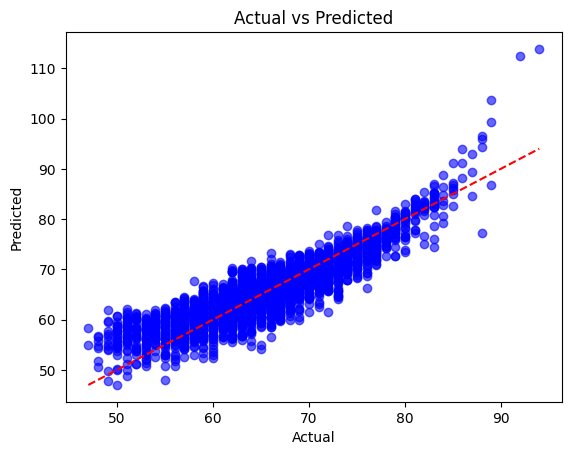

In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


### Testing the model with respect to the `pca_df` df

In [ ]:
pca_df

dribbling  crossing  long_shots  positioning     curve  overall_rating
0       1.000000  0.920455    1.000000     0.989247  0.988636              94
1       0.860215  0.943182    0.945055     0.881720  0.909091              88
2       0.892473  0.852273    0.868132     0.860215  0.897727              88
3       0.924731  0.920455    0.890110     0.870968  0.920455              88
4       0.698925  0.284091    0.131868     0.236559  0.250000              88
...          ...       ...         ...          ...       ...             ...
17694   0.645161  0.590909    0.560440     0.623656  0.534091              67
17695   0.516129  0.511364    0.208791     0.430108  0.227273              59
17696   0.086022  0.068182    0.065934     0.032258  0.079545              59
17697   0.569892  0.420455    0.604396     0.559140  0.465909              59
17698   0.580645  0.306818    0.549451     0.548387  0.329545              59

[17699 rows x 6 columns]

In [ ]:
X = pca_df.drop(["overall_rating"],axis=1)
y = pca_df["overall_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lin_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38.68278196758369


In [ ]:
y_pred_test = lin_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 37.36030736940159


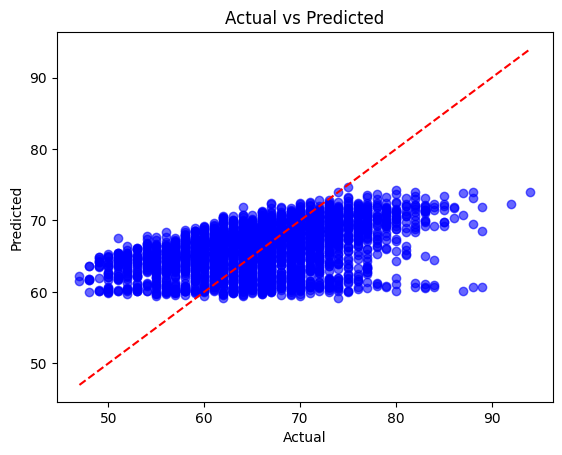

In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


#### Improving the model

Using regularization techniques to reduce impace from correlated features

`ridge` regression

Mean Squared Error (Training): 9.659361725184464
Mean Squared Error (Testing): 9.63164656903696
R² Score (Train): 0.8024180035937368
R² Score (Testing): 0.797605720904347


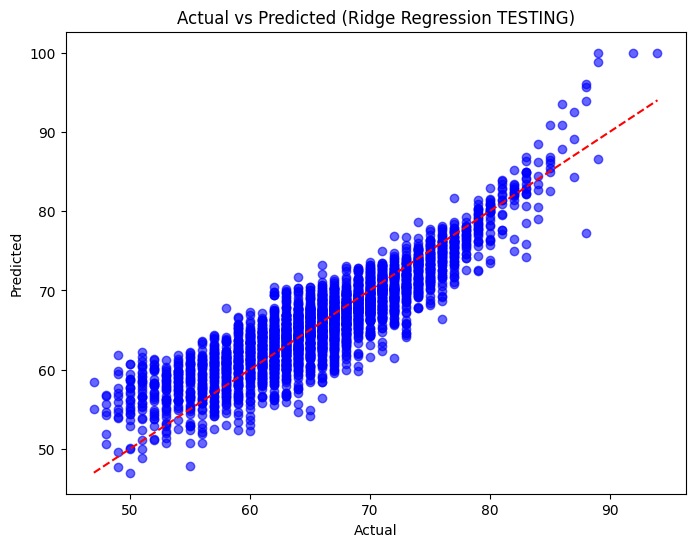

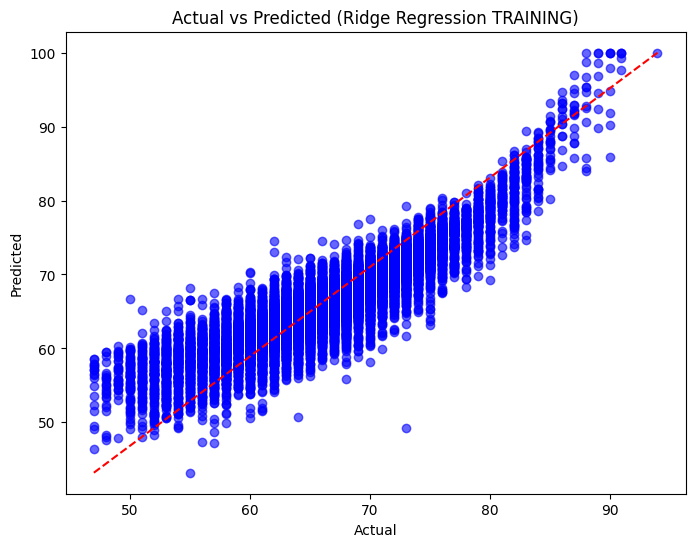

In [247]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming corr_df is your DataFrame
X = corr_df.drop(["overall_rating"], axis=1)
y = corr_df["overall_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred = np.clip(y_pred, 0, 100)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TESTING)')
plt.show()

# Visualize Actual vs Predicted for Training
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TRAINING)')
plt.show()


`lasso` regression

Mean Squared Error (Training): 9.652690863220135
Mean Squared Error (Testing): 9.62457084238139
R² Score (Train): 0.802554455904165
R² Score (Testing): 0.7977544064468726


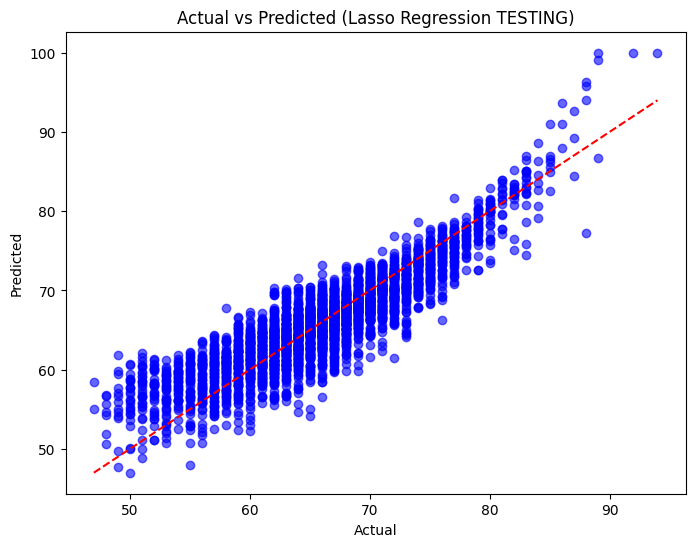

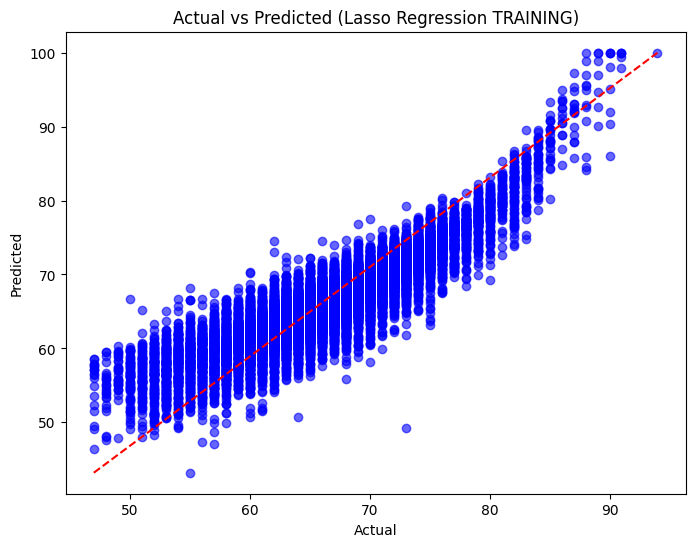

In [248]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for np.clip

# Assuming corr_df is your DataFrame
X = corr_df.drop(["overall_rating"], axis=1)
y = corr_df["overall_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso regression model
lasso_reg = Lasso(alpha=0.001)  # Adjust alpha for regularization strength
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred = np.clip(y_pred, 0, 100)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TESTING)')
plt.show()

# Visualize Actual vs Predicted for Training
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TRAINING)')
plt.show()


Using hyperparameter tuning to adjust the `alpha` of the regularization

`ridge` regression

Mean Squared Error (Training): 9.647541412451075
Mean Squared Error (Testing): 9.617874493078054
R² Score (Train): 0.8026597877876055
R² Score (Testing): 0.797895119956251
Grid Search Results:
   param_alpha  mean_test_score  mean_train_score
0        0.001         0.800687          0.801268
1        0.010         0.800687          0.801268
2        0.100         0.800691          0.801267
3        1.000         0.800684          0.801217
4       10.000         0.797882          0.798210
5      100.000         0.737660          0.737880


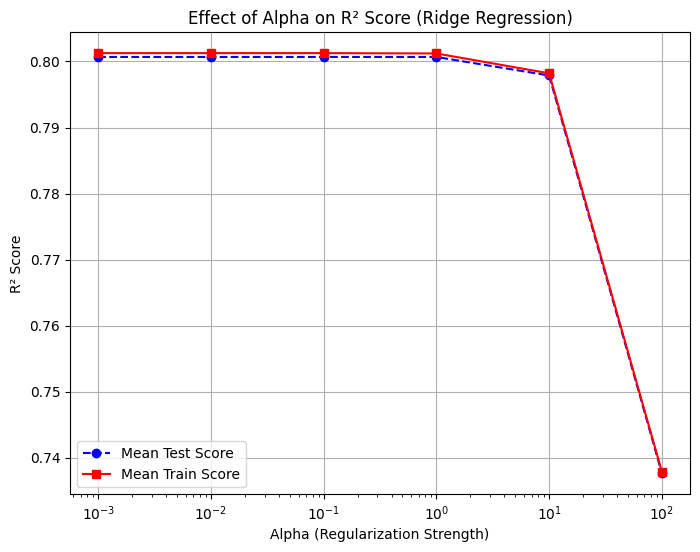


Best alpha: 0.1
Best cross-validated R² score: 0.8006913274972838


In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the Ridge model
ridge = Ridge()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_ridge_model = grid_search.best_estimator_

# Clip the predictions after fitting
y_pred_train = best_ridge_model.predict(X_train)
y_pred_test = best_ridge_model.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred_test = np.clip(y_pred_test, 0, 100)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2_test}')

# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Print the full grid search results
print("Grid Search Results:")
print(results[['param_alpha', 'mean_test_score', 'mean_train_score']])

# Extract values for plotting
alphas = param_grid['alpha']
mean_test_scores = results['mean_test_score']
mean_train_scores = results['mean_train_score']

# Plot alpha vs. R² score
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--', color='b', label='Mean Test Score')
plt.plot(alphas, mean_train_scores, marker='s', linestyle='-', color='r', label='Mean Train Score')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha and score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_
print(f'\nBest alpha: {best_alpha}')
print(f'Best cross-validated R² score: {best_r2}')


`lasso` regression

Grid Search Results:
   param_alpha  mean_test_score  mean_train_score
0        0.001         0.800691          0.801260
1        0.010         0.800000          0.800466
2        0.100         0.757659          0.757923
3        1.000        -0.000194          0.000000
4       10.000        -0.000194          0.000000
5      100.000        -0.000194          0.000000


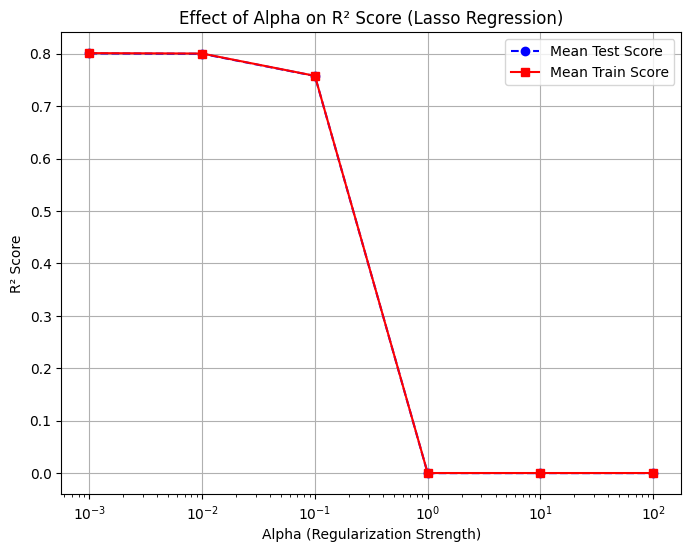


Best alpha: 0.001
Best cross-validated R² score: 0.80069127888886


In [250]:
# Define the Lasso model
lasso = Lasso()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Print the full grid search results
print("Grid Search Results:")
print(results[['param_alpha', 'mean_test_score', 'mean_train_score', ]])

# Extract values for plotting
alphas = param_grid['alpha']
mean_test_scores = results['mean_test_score']
mean_train_scores = results['mean_train_score']

# Plot alpha vs. R² score
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--', color='b', label='Mean Test Score')
plt.plot(alphas, mean_train_scores, marker='s', linestyle='-', color='r', label='Mean Train Score')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha and score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_
print(f'\nBest alpha: {best_alpha}')
print(f'Best cross-validated R² score: {best_r2}')
